##### Copyright 2020 The TensorFlow Authors.

In [20]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import os
import glob
import datetime

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow

# from tensorflow.compat.v1.keras.backend import get_session
# tensorflow.compat.v1.disable_v2_behavior()
# import shap

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
from sklearn import preprocessing

import tensorflow as tf

import numpy as np
import os
import pandas as pd
#import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
from os.path import isfile, join
from sys import getsizeof
import glob

from random import *

import matplotlib.pyplot as plt
#plt.ion()
%matplotlib notebook

#import mpld3
#mpld3.enable_notebook()
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

os.system('source /home/jackalak/heartbeat/cdf38_0-dist/bin/definitions.B')
os.environ["CDF_LIB"] = '/home/jackalak/heartbeat/cdf38_0-dist/lib'
from ovationpyme.ovation_prime import FluxEstimator,AverageEnergyEstimator,BinCorrector
from ovationpyme.ovation_utilities import calc_avg_solarwind
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux

import tensorflow.keras.backend as K

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [21]:
file_load_df_cumulative = '/media/jackalak/TOSHIBA EXT/heartbeat/ParticlePrecipitation/ML_DB_subsamp_ext_full_dfCumulative_complexHemisphereCombine.csv'
DMSP_DATA_DIR=''
df_cumulative = pd.read_csv(os.path.join(DMSP_DATA_DIR,file_load_df_cumulative))
df_cumulative = df_cumulative.sort_values(by=['ID_SC', 'Datetimes'])
df_cumulative = df_cumulative.set_index('Datetimes')
df_cumulative.index = pd.to_datetime(df_cumulative.index)
print(df_cumulative.columns.tolist())

['SC_AACGM_LAT', 'SC_AACGM_LTIME', 'ELE_TOTAL_ENERGY_FLUX', 'ELE_TOTAL_ENERGY_FLUX_STD', 'ELE_AVG_ENERGY', 'ELE_AVG_ENERGY_STD', 'ID_SC', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME', 'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr', 'vsw_6hr', 'vx_6hr', 'psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr', 'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'vsw_5hr', 'vx_5hr', 'psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'vsw_3hr', 'vx_3hr', 'psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'vsw_1hr', 'vx_1hr', 'psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'A

In [22]:
# subset = df_cumulative[(df_cumulative.index.year ==2010 )]
# subset = subset[(subset['ID_SC'] ==16) ] 
# subset = subset[(subset.index.day ==10) ] 
# subset = subset[(subset.index.month ==10) ] 

In [23]:
# import pickle
# pickle_file = open("../Downloads/all_sc_df.pkl", "rb") 
# test =pickle.load(pickle_file) 

In [24]:
# test

In [25]:
# subset = test[(test.index.year ==2010 )]
# subset = subset[(subset['ID_SC'] ==16) ] 
# subset = subset[(subset.index.day ==10) ] 
# subset = subset[(subset.index.month ==10) ]
# del test

In [26]:
# import numpy as np
# fig= plt.figure(figsize=(8,8))

# ax4 = plt.subplot(polar=True,)

# ax4.scatter(( subset['SC_AACGM_LTIME'] ),test
#            (90.-(abs(subset['SC_AACGM_LAT']))))

# polar2dial(ax4)
# ax4.set_rlim([0.,90])
# r_label_values = 90.-np.array([80.,60.,40.,20.])
# r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
# ax4.set_rgrids(r_label_values,labels=r_labels,fontsize='x-large')
# ax4.set_rlim([0.,90.])
# ax4.set_title('Satellite Position in Northern Hemisphere (top down Earth view)',fontweight="bold")
# fig.savefig('/home/jackalak/Pictures/combinedNS_polar',dpi=200)


# fig= plt.figure(figsize=(8,8))

# ax4 = plt.subplot(polar=True,)

# ax4.scatter(( subset['SC_AACGM_LTIME'] ),
#            (90.-(abs(subset['SC_AACGM_LAT']))))

# polar2dial(ax4)
# ax4.set_rlim([0,45])
# r_label_values = 90.-np.array([80.,70.,60.,50.])
# r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
# ax4.set_rgrids(r_label_values,labels=r_labels,fontsize='x-large')
# ax4.set_title('Satellite Position in Northern Hemisphere (top down Earth view)',fontweight="bold")
# fig.savefig('/home/jackalak/Pictures/combinedNS_polar2',dpi=200)

In [27]:
# plt.figure()
# plt.hist(df_cumulative['SC_AACGM_LAT'].values,bins=200)
# plt.title('MLat histogram')
# plt.show()

# plt.figure()
# plt.hist(df_cumulative['SC_AACGM_LTIME'].values,bins=200)
# plt.title('MLong histogram')
# plt.show()

# plt.figure()
# plt.scatter(df_cumulative['SC_AACGM_LAT'].values,df_cumulative['SC_AACGM_LTIME'].values)
# plt.title('MLat vs MLong')
# plt.show()

# subset = df_cumulative[(df_cumulative.index.year ==2010 )]
# subset = subset[(subset['ID_SC'] ==16) ] 
# subset = subset[(subset.index.day ==10) ] 
# subset = subset[(subset.index.month ==10) ] 

# plt.figure()
# plt.hist(subset['SC_AACGM_LAT'].values,bins=200)
# plt.title('MLat histogram')
# plt.show()

# plt.figure()
# plt.hist(subset['SC_AACGM_LTIME'].values,bins=200)
# plt.title('MLong histogram')
# plt.show()

# plt.figure()
# plt.scatter(subset['SC_AACGM_LAT'].values,subset['SC_AACGM_LTIME'].values)
# plt.title('MLat vs MLong')
plt.show()

In [28]:
# import scipy
# def create_kerneldensity_fxn(y_val_plot,
#                             y_val_pred_plot,):
#     '''
#         all y_val variables must be in units of log10[eV/cm2/s]
#         file_save_base = desired location to save the plot
#         Produces two plots: one for the full time series and one for a subset to see the dynamics more clearly
#     '''
#     # Handle NaNs and Infs - ADDED RMM 8.3.2020 to handle NaNs and Infs

#     fig = plt.figure(figsize=(12,12))
#     ax2 = fig.add_subplot()
#     xy = np.vstack([y_val_plot.values,y_val_pred_plot])
#     z = scipy.stats.gaussian_kde(xy)(xy)
#     # Sort the points by density, so that the densest points are plotted last
#     idx = z.argsort()
#     x, y, z2 = y_val_plot.values[idx], y_val_pred_plot[idx], z[idx]
#     ax2.scatter(x,
#                 y,
#                 c = z2,
#                 alpha = 0.5,
#                 s=20,
# #                 edgecolor=''
#                )
#     ax2.set_aspect('equal', 'box')
#     ax2.grid(True)
#     plt.title('Validation vs. NN prediction')

# create_kerneldensity_fxn(df_cumulative['SC_AACGM_LAT'],df_cumulative['SC_AACGM_LTIME'])

In [29]:
cols_to_drop_validation = [c for c in df_cumulative.columns if ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]
# cols_to_drop_validation = [c for c in df.columns if ('1min' in c) | ('3min' in c) | ('4min' in c) | ('5min' in c) | ('15min' in c) | ('newell' in c) | ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]

df_cumulative = df_cumulative.drop(columns=cols_to_drop_validation)

# high_mask = np.log10(df_cumulative['ELE_TOTAL_ENERGY_FLUX']) >= 7.4
# df_cumulative = df_cumulative[high_mask]

In [30]:
print(df_cumulative.columns.to_list() )

['SC_AACGM_LAT', 'ELE_TOTAL_ENERGY_FLUX', 'ID_SC', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME', 'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr', 'vsw_6hr', 'vx_6hr', 'psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr', 'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'vsw_5hr', 'vx_5hr', 'psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'vsw_3hr', 'vx_3hr', 'psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'vsw_1hr', 'vx_1hr', 'psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'AE_45min', 'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'vsw_45min', 'vx_45min', 'p

In [31]:

# Separate training and testing data
mask_val = [(df_cumulative.index.year == 2010) & (df_cumulative['ID_SC'].values==16)]
df_val = df_cumulative[mask_val[0]].copy(deep=True)
df_train = df_cumulative.copy(deep=True).drop( df_cumulative.index[mask_val[0]])

# mask_for_2010_to_2014 = [(df_train.index.year == 2010) | (df_train.index.year == 2011)
#                          | (df_train.index.year == 2012) |(df_train.index.year == 2013)
#                          | (df_train.index.year == 2014)]
# df_train = df_train[mask_for_2010_to_2014[0]]
df_train = df_train.sort_values(by=['ID_SC', 'Datetimes'])
df_val = df_val.sort_values(by=['ID_SC', 'Datetimes'])


In [32]:
print(df_cumulative.columns.tolist())

['SC_AACGM_LAT', 'ELE_TOTAL_ENERGY_FLUX', 'ID_SC', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME', 'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr', 'vsw_6hr', 'vx_6hr', 'psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr', 'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'vsw_5hr', 'vx_5hr', 'psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'vsw_3hr', 'vx_3hr', 'psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'vsw_1hr', 'vx_1hr', 'psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'AE_45min', 'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'vsw_45min', 'vx_45min', 'p

In [33]:

# Construct X and y
feature_cols = [c for c in df_train.columns if not 'ELE' in c]
#print( (feature_cols))
#print(df_cumulative.columns)
X_val = df_val[feature_cols].copy(deep=True)
y_val = df_val['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train[feature_cols].copy(deep=True)
y_train = df_train['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))
X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

In [35]:
import pickle

filename = 'scale_x_148_pipeline1'
with open(filename, 'wb') as f:
    pickle.dump(scaler_X, f)

In [11]:
i=0
y_val_log_precentile=[]
X_val_precentile = []
percentile = []
for percent in [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]:
    temp= pd.DataFrame(data=y_val_log.values, index = y_val_log.index, columns = ['energy'])
    percentile.append(str(percent))
    y_val_log_precentile.append(temp.nlargest(int((1.-percent)*temp.shape[0]),columns=['energy']))
    temp2 = pd.DataFrame(data=X_test, index = y_val_log.index)
    X_val_precentile.append( temp2.loc[y_val_log_precentile[i].index,:])
    print((percentile[i]+' percentile'), np.min(y_val_log_precentile[i].values),np.max(y_val_log_precentile[i].values))
    i = i+ 1
    
i=0
y_val_log_precentile_left=[]
X_val_precentile_left = []
percentile_left = []
for percent in [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]:
    temp= pd.DataFrame(data=y_val_log.values, index = y_val_log.index, columns = ['energy'])
    percentile_left.append(str(percent))
    y_val_log_precentile_left.append((1./temp).nlargest
                                     (int((percent)*temp.shape[0]),columns=['energy']))
    temp2 = pd.DataFrame(data=X_test, index = y_val_log.index)
    X_val_precentile_left.append( temp2.loc[y_val_log_precentile_left[i].index,:])
    y_val_log_precentile_left[i] = 1./y_val_log_precentile_left[i]
    print((percentile_left[i]+' percentile from left'), np.min(y_val_log_precentile_left[i].values),np.max(y_val_log_precentile_left[i].values))
    i = i+ 1

y_val_log_90= pd.DataFrame(data=y_val_log.values, index = y_val_log.index, columns = ['energy'])
y_val_log_90 = y_val_log_90.nlargest(int(0.1*y_val_log_90.shape[0]),columns=['energy'])
X_val_90 = pd.DataFrame(data=X_test, index = y_val_log.index)
X_val_90 = X_val_90.loc[y_val_log_90.index,:]
print('90% percentile', np.min(y_val_log_90.values),np.max(y_val_log_90.values))

y_val_log_95= pd.DataFrame(data=y_val_log.values, index = y_val_log.index, columns = ['energy'])
y_val_log_95 = y_val_log_95.nlargest(int(0.05*y_val_log_95.shape[0]),columns=['energy'])
X_val_95 = pd.DataFrame(data=X_test, index = y_val_log.index)
X_val_95 = X_val_95.loc[y_val_log_95.index,:]
print('95% percentile', np.min(y_val_log_95.values),np.max(y_val_log_95.values))

y_val_log_99= pd.DataFrame(data=y_val_log.values, index = y_val_log.index, columns = ['energy'])
y_val_log_99 = y_val_log_99.nlargest(int(0.01*y_val_log_99.shape[0]),columns=['energy'])
X_val_99 = pd.DataFrame(data=X_test, index = y_val_log.index)
X_val_99 = X_val_99.loc[y_val_log_99.index,:]
print('99% percentile', np.min(y_val_log_99.values),np.max(y_val_log_99.values))


0.05 percentile 7.00039893334706 13.201022212839035
0.1 percentile 7.164534864368128 13.201022212839035
0.15 percentile 7.290397040306319 13.201022212839035
0.2 percentile 7.376963635410883 13.201022212839035
0.25 percentile 7.465564860032109 13.201022212839035
0.3 percentile 7.549491629968991 13.201022212839035
0.35 percentile 7.642971033556274 13.201022212839035
0.4 percentile 7.751471182907377 13.201022212839035
0.45 percentile 7.914464118528352 13.201022212839035
0.5 percentile 8.318267906289773 13.201022212839035
0.55 percentile 8.846842813967578 13.201022212839035
0.6 percentile 9.290206290781745 13.201022212839035
0.65 percentile 9.654347914752897 13.201022212839035
0.7 percentile 9.97239332131116 13.201022212839035
0.75 percentile 10.25692834937135 13.201022212839035
0.8 percentile 10.51516701066242 13.201022212839035
0.85 percentile 10.764910672002928 13.201022212839035
0.9 percentile 11.024546004990425 13.201022212839035
0.95 percentile 11.350574198319405 13.201022212839035
0

In [16]:
import matplotlib as matplotlib

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
matplotlib.rc('font', **font)

def plot_model(df_results):
    
    plt.figure(figsize=(12,8))
    plt.plot(y_val_log[:],alpha = 0.5)
    plt.plot(df_results[:],alpha = 0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.title('Electron Flux log10 [eV/cm^2/ster/s]')

    plt.show()
    plt.savefig('1.png',dpi=200)


    plt.figure(figsize=(12,8))
    plt.plot(10**y_val_log[:]*1.6e-6,alpha = 0.5)
    plt.plot(10**df_results[:]*1.6e-6,alpha = 0.5)
    plt.title('Electron Flux [eV/cm^2/ster/s]')
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()
    plt.savefig('2.png',dpi=200)

    plt.figure(figsize=(12,8))
    plt.hist(10**y_val_log.values*1.6e-6,bins=100, log=True,alpha = 0.5)
    plt.hist(10**df_results.values*1.6e-6,bins=100, log=True,alpha = 0.5)
    plt.title('Histogram of Electron Flux [eV/cm^2/ster/s]')

    plt.legend(['val', 'result'], loc='upper left')
    plt.show()
    plt.savefig('3.png',dpi=200)


    plt.figure(figsize=(12,8))
    plt.hist(df_results.values,bins=200,range=(6,14),alpha = 0.5)
    plt.hist(y_val_log.values,bins=200,range=(6,14),alpha = 0.5)
    plt.legend(['result','val'], loc='upper left')
    plt.title('Histogram of Electron Flux log10 [eV/cm^2/ster/s]')
    plt.show()
    plt.savefig('4.png',dpi=200)

    plt.figure(figsize=(12,8))
    plt.hist(y_val_log.values,bins=200,range=(6,14),alpha = 0.5)
    plt.hist(df_results.values,bins=200,range=(6,14),alpha = 0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.title('Histogram of Electron Flux log10 [eV/cm^2/ster/s]')
    plt.show()
    plt.savefig('5.png',dpi=200)

    plt.figure(figsize=(12,8))
    plt.hist(df_results.values,bins=200,range=(6,14),alpha = 0.5)
    plt.hist(y_val_log.values,bins=200,range=(6,14),alpha = 0.5)
    plt.legend(['result','val'], loc='upper left')
    plt.title('Histogram of Electron Flux log10 [eV/cm^2/ster/s]')

    plt.ylim([0,2000])
    plt.show()
    plt.savefig('6.png',dpi=200)

    plt.figure()
    plt.hist(y_val_log.values,bins=200,range=(6,14),alpha = 0.5)
    plt.hist(df_results.values,bins=200,range=(6,14),alpha = 0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.title('Histogram of Electron Flux log10 [eV/cm^2/ster/s]')

    plt.ylim([0,2000])

    plt.show()
    plt.savefig('7.png',dpi=200)


    errors= y_val_log.values-df_results.values[:,0]
    plt.figure(figsize=(12,8));
    plt.scatter(df_val['SC_AACGM_LAT'].values,errors,s=1)
    plt.title('Errors over SC_AACGM_LAT Bins')
    plt.savefig('8.png',dpi=200)


    bin_total = np.zeros((200))
    bin_error_total = np.zeros((200))
    for j in range(0,y_val_log.values.shape[0]):
        i = int((df_val['SC_AACGM_LAT'].values[j]-45)/((90-45)/200))
        if i < 200:
            bin_total[i] = bin_total[i]+1
            bin_error_total[i] = bin_error_total[i] + np.abs(errors[j])

    avg_error_over_hist = bin_error_total/bin_total
    plt.figure(figsize=(12,8))
    plt.scatter(np.linspace(45,90,num=200),avg_error_over_hist)
    plt.title('Average Validation Error over SC_AACGM_LAT Bins')
    plt.ylim([0,1.2])
    plt.show()
    
    errors= y_val_log.values-df_results.values[:,0]
    plt.figure(figsize=(12,8));
    plt.scatter(y_val_log.values,errors,s=1)
    plt.title('Errors over target Bins')

    bin_total = np.zeros((200))
    bin_error_total = np.zeros((200))
    for j in range(0,y_val_log.values.shape[0]):
        i = int((y_val_log[j]-6)/((14-6)/200))
        if i < 200:
            bin_total[i] = bin_total[i]+1
            bin_error_total[i] = bin_error_total[i] + np.abs(errors[j])

    avg_error_over_hist = bin_error_total/(bin_total+.00001)
    plt.figure(figsize=(12,8))
    plt.scatter(np.linspace(6,14,num=200),avg_error_over_hist)
    plt.title('Average Validation Error over target Bins ')    
    plt.ylim([0,2.6])
    plt.show()


In [17]:

def plot_model2(df_results):
    
    plt.figure()
    plt.plot(y_val_log[:])
    plt.plot(df_results[:])
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()


    plt.figure()
    plt.plot(10**y_val_log[:]*1.6e-6)
    plt.plot(10**df_results[:]*1.6e-6)
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()

    plt.figure()
    plt.hist(10**y_val_log.values*1.6e-6,bins=100, log=True)
    plt.hist(10**df_results.values*1.6e-6,bins=100, log=True)
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()


    plt.figure()
    plt.hist(df_results.values,bins=200,range=(6,14))
    plt.hist(y_val_log.values,bins=200,range=(6,14))
    plt.legend(['result','val'], loc='upper left')
    plt.show()

    plt.figure()
    plt.hist(y_val_log.values,bins=200,range=(6,14))
    plt.hist(df_results.values,bins=200,range=(6,14))
    plt.legend(['val', 'result'], loc='upper left')
    plt.show()

    plt.figure()
    plt.hist(df_results.values,bins=200,range=(6,14))
    plt.hist(y_val_log.values,bins=200,range=(6,14))
    plt.legend(['result','val'], loc='upper left')
    plt.ylim([0,2000])
    plt.show()

    plt.figure()
    plt.hist(y_val_log.values,bins=200,range=(6,14))
    plt.hist(df_results.values,bins=200,range=(6,14))
    plt.legend(['val', 'result'], loc='upper left')
    plt.ylim([0,2000])

    plt.show()


    
    errors= y_val_log.values-df_results.values[:,0]
    plt.figure();
    plt.scatter(y_val_log.values,errors,s=1)
    plt.title('Errors over target Bins')

    bin_total = np.zeros((200))
    bin_error_total = np.zeros((200))
    for j in range(0,y_val_log.values.shape[0]):
        i = int((y_val_log[j]-6)/((14-6)/200))
        if i < 200:
            bin_total[i] = bin_total[i]+1
            bin_error_total[i] = bin_error_total[i] + np.abs(errors[j])

    avg_error_over_hist = bin_error_total/(bin_total+.00001)
    plt.figure()
    plt.scatter(np.linspace(6,14,num=200),avg_error_over_hist)
    plt.title('Average Validation Error over target Bins')    
    plt.ylim([0,2.6])
    plt.show()


In [14]:
# from tensorflow.keras.layers import Input

# input1 = Input(shape=(148))
# model1 = Dense(256,  activation='relu')(input1)
# model1 = model1 = Dropout(0.5)(model1)
# model1 = Dense(64, activation='relu')(model1)
# model1 = Dense(32, activation='relu')(model1)
# model1 = Dense(int(256),   activation='relu')(model1)
# model1 = Dense(int(1024),  activation='relu')(model1)
# model1 = Dense(int(256),  activation='relu')(model1)
# model1 = Dense(32, activation='relu')(model1)
# model1 = Dense(4, activation='relu')(model1)
# model1 = Dense(1, activation='linear' )(model1)


# output = model1
# model = tensorflow.keras.models.Model(inputs=input1, outputs=output)
# #compile model using accuracy to measure model performance
# model.compile(loss='mse', optimizer='adam',metrics=['mse'])
# model.summary()

# history = model.fit(X, 
#                    y_train_log, 
#                     validation_data=(
#                         X_test, 
#                         y_val_log,                                    ),
#                     batch_size=32768,epochs=1000,verbose=2,
#                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',  restore_best_weights=True,
#              patience=50)])#


# plt.figure()
# # summarize history for loss
# plt.plot(history.history['loss'][:])
# plt.plot(history.history['val_loss'][:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.ylim([0,.9])
# plt.show()

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['loss'][:])
# plt.plot(history.history['val_loss'][:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# results = model.predict(X_test)

# df_results = pd.DataFrame(data=results, index = df_val.index)

# model_3 = df_results

# plot_model(df_results)

In [15]:
filename='model_3'
# # model.save(filename)
model = tensorflow.keras.models.load_model(filename)
# model.save_weights( filename+'.h5')


results = model.predict(X_test)

df_results = pd.DataFrame(data=results, index = df_val.index)

model_3 = df_results

#plot_model(df_results)

18/18 [==============================] - 0s 1ms/step - loss: 1.9492 - mean_squared_error: 1.9492
0.05 percentile 0.5405764579772949
0.1 percentile 0.5361685752868652
0.15 percentile 0.5385546684265137
0.2 percentile 0.5433400869369507
0.25 percentile 0.5558788180351257
0.3 percentile 0.5729612708091736
0.35 percentile 0.5946788787841797
0.4 percentile 0.6241635680198669
0.45 percentile 0.6525349020957947
0.5 percentile 0.6607944369316101
0.55 percentile 0.6617105603218079
0.6 percentile 0.6367354393005371
0.65 percentile 0.583916425704956
0.7 percentile 0.5574281811714172
0.75 percentile 0.5602676272392273
0.8 percentile 0.5742170810699463
0.85 percentile 0.6155630350112915
0.9 percentile 0.7021501064300537
0.95 percentile 0.9214920997619629
0.05 percentile from left 1.0289521217346191
0.1 percentile from left 0.8202003836631775
0.15 percentile from left 0.713782548904419
0.2 percentile from left 0.6508263945579529
0.25 percentile from left 0.5919539928436279
0.3 percentile from left 0

<IPython.core.display.Javascript object>


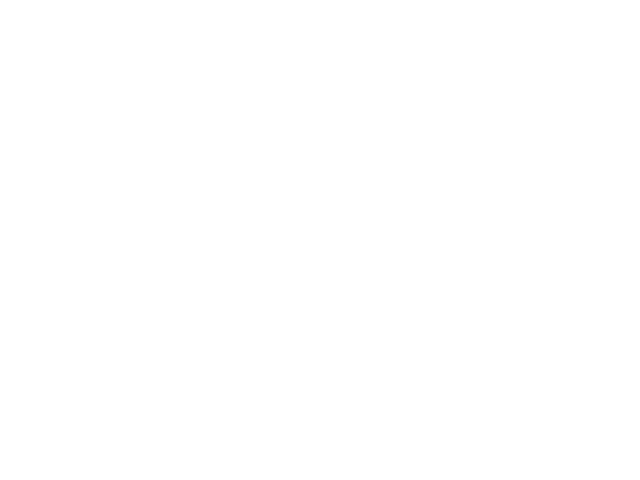

In [15]:
model.evaluate(X_test,y_val_log.values)
model.evaluate(X_val_90.values,y_val_log_90.values)
model.evaluate(X_val_95.values,y_val_log_95.values)
model.evaluate(X_val_99.values,y_val_log_99.values)

i=0
right_cum = []
for percent in [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]:
    right_cum.append(model.evaluate(X_val_precentile[i],y_val_log_precentile[i],verbose=0)[0])
    print((percentile[i]+' percentile'), right_cum[i] )
    i = i+ 1

i=0
left_cum = []
for percent in [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]:
    left_cum.append(model.evaluate(X_val_precentile_left[i],y_val_log_precentile_left[i],verbose=0)[0])
    print((percentile_left[i]+' percentile from left'),  left_cum[i])
    i = i+ 1    
    
plt.figure()
plt.scatter(np.array([.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])*100,left_cum)
plt.scatter(np.array([.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])*100,right_cum)
plt.xlim([0,100])
plt.ylim([0.3,1])
plt.legend(['left_cum error','right_cum error'])
plt.xlabel('percentile')


plt.show()

In [16]:
results = model.predict(X_test)
model_3 = pd.DataFrame(data=results, index = df_val.index)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 148)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               38144     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)             

Epoch 72/1000
57/57 - 1s - loss: 0.7844 - mse: 0.5620 - val_loss: 1.0156 - val_mse: 0.8872
Epoch 73/1000
57/57 - 1s - loss: 0.7883 - mse: 0.5669 - val_loss: 1.0615 - val_mse: 0.9681
Epoch 74/1000
57/57 - 1s - loss: 0.7897 - mse: 0.5695 - val_loss: 0.9631 - val_mse: 0.7282
Epoch 75/1000
57/57 - 1s - loss: 0.7825 - mse: 0.5599 - val_loss: 0.9467 - val_mse: 0.8119
Epoch 76/1000
57/57 - 1s - loss: 0.7768 - mse: 0.5575 - val_loss: 1.1185 - val_mse: 0.9761
Epoch 77/1000
57/57 - 1s - loss: 0.7843 - mse: 0.5640 - val_loss: 1.0687 - val_mse: 0.9801
Epoch 78/1000
57/57 - 1s - loss: 0.7836 - mse: 0.5650 - val_loss: 0.9581 - val_mse: 0.7589
Epoch 79/1000
57/57 - 1s - loss: 0.7825 - mse: 0.5623 - val_loss: 0.9472 - val_mse: 0.8016
Epoch 80/1000
57/57 - 1s - loss: 0.7832 - mse: 0.5627 - val_loss: 0.9839 - val_mse: 0.8509
Epoch 81/1000
57/57 - 1s - loss: 0.7752 - mse: 0.5564 - val_loss: 0.9098 - val_mse: 0.7516
Epoch 82/1000
57/57 - 1s - loss: 0.7766 - mse: 0.5583 - val_loss: 0.9601 - val_mse: 0.7610

Epoch 162/1000
57/57 - 1s - loss: 0.7145 - mse: 0.5307 - val_loss: 0.8862 - val_mse: 0.7577
Epoch 163/1000
57/57 - 1s - loss: 0.7127 - mse: 0.5276 - val_loss: 0.8930 - val_mse: 0.7398
Epoch 164/1000
57/57 - 1s - loss: 0.7083 - mse: 0.5256 - val_loss: 0.8718 - val_mse: 0.7266
Epoch 165/1000
57/57 - 1s - loss: 0.7164 - mse: 0.5305 - val_loss: 1.1629 - val_mse: 1.0893
Epoch 166/1000
57/57 - 1s - loss: 0.7322 - mse: 0.5457 - val_loss: 0.9416 - val_mse: 0.8066
Epoch 167/1000
57/57 - 1s - loss: 0.7096 - mse: 0.5254 - val_loss: 0.9100 - val_mse: 0.7485
Epoch 168/1000
57/57 - 1s - loss: 0.7148 - mse: 0.5282 - val_loss: 0.8931 - val_mse: 0.7225
Epoch 169/1000
57/57 - 1s - loss: 0.7082 - mse: 0.5251 - val_loss: 0.9951 - val_mse: 0.8831
Epoch 170/1000
57/57 - 1s - loss: 0.7139 - mse: 0.5311 - val_loss: 0.9143 - val_mse: 0.7839
Epoch 171/1000
57/57 - 1s - loss: 0.7081 - mse: 0.5259 - val_loss: 0.9102 - val_mse: 0.7632
Epoch 172/1000
57/57 - 1s - loss: 0.7126 - mse: 0.5293 - val_loss: 0.9343 - val_

57/57 - 1s - loss: 0.6779 - mse: 0.5128 - val_loss: 0.8130 - val_mse: 0.6533
Epoch 252/1000
57/57 - 1s - loss: 0.6784 - mse: 0.5093 - val_loss: 0.8384 - val_mse: 0.6704
Epoch 253/1000
57/57 - 1s - loss: 0.6764 - mse: 0.5100 - val_loss: 0.8210 - val_mse: 0.6497
Epoch 254/1000
57/57 - 1s - loss: 0.6770 - mse: 0.5107 - val_loss: 0.8107 - val_mse: 0.6725
Epoch 255/1000
57/57 - 1s - loss: 0.6727 - mse: 0.5078 - val_loss: 0.8330 - val_mse: 0.6590
Epoch 256/1000
57/57 - 1s - loss: 0.6725 - mse: 0.5080 - val_loss: 0.8109 - val_mse: 0.6513
Epoch 257/1000
57/57 - 1s - loss: 0.6714 - mse: 0.5063 - val_loss: 0.7956 - val_mse: 0.6471
Epoch 258/1000
57/57 - 1s - loss: 0.6693 - mse: 0.5062 - val_loss: 0.8107 - val_mse: 0.6580
Epoch 259/1000
57/57 - 1s - loss: 0.6718 - mse: 0.5090 - val_loss: 0.8232 - val_mse: 0.6537
Epoch 260/1000
57/57 - 1s - loss: 0.6795 - mse: 0.5104 - val_loss: 0.8010 - val_mse: 0.6532
Epoch 261/1000
57/57 - 1s - loss: 0.6747 - mse: 0.5079 - val_loss: 0.8061 - val_mse: 0.6815
Epo

Epoch 341/1000
57/57 - 1s - loss: 0.6511 - mse: 0.4999 - val_loss: 0.7564 - val_mse: 0.6178
Epoch 342/1000
57/57 - 1s - loss: 0.6485 - mse: 0.4986 - val_loss: 0.7603 - val_mse: 0.6273
Epoch 343/1000
57/57 - 1s - loss: 0.6517 - mse: 0.5021 - val_loss: 0.7664 - val_mse: 0.6622
Epoch 344/1000
57/57 - 1s - loss: 0.6527 - mse: 0.5025 - val_loss: 0.7571 - val_mse: 0.6238
Epoch 345/1000
57/57 - 1s - loss: 0.6560 - mse: 0.5031 - val_loss: 0.7680 - val_mse: 0.6435
Epoch 346/1000
57/57 - 1s - loss: 0.6512 - mse: 0.5013 - val_loss: 0.7616 - val_mse: 0.6413
Epoch 347/1000
57/57 - 1s - loss: 0.6521 - mse: 0.5019 - val_loss: 0.7665 - val_mse: 0.6334
Epoch 348/1000
57/57 - 1s - loss: 0.6471 - mse: 0.4994 - val_loss: 0.7830 - val_mse: 0.6707
Epoch 349/1000
57/57 - 1s - loss: 0.6401 - mse: 0.4967 - val_loss: 0.7704 - val_mse: 0.6488
Epoch 350/1000
57/57 - 1s - loss: 0.6479 - mse: 0.5009 - val_loss: 0.7617 - val_mse: 0.6364
Epoch 351/1000
57/57 - 1s - loss: 0.6472 - mse: 0.4976 - val_loss: 0.7588 - val_

57/57 - 1s - loss: 0.6415 - mse: 0.4992 - val_loss: 0.7641 - val_mse: 0.6102
Epoch 431/1000
57/57 - 1s - loss: 0.6321 - mse: 0.4937 - val_loss: 0.7559 - val_mse: 0.6463
Epoch 432/1000
57/57 - 1s - loss: 0.6403 - mse: 0.4987 - val_loss: 0.7651 - val_mse: 0.6258
Epoch 433/1000
57/57 - 1s - loss: 0.6387 - mse: 0.4972 - val_loss: 0.7486 - val_mse: 0.6263
Epoch 434/1000
57/57 - 1s - loss: 0.6339 - mse: 0.4936 - val_loss: 0.7527 - val_mse: 0.6170
Epoch 435/1000
57/57 - 1s - loss: 0.6353 - mse: 0.4956 - val_loss: 0.7417 - val_mse: 0.6278
Epoch 436/1000
57/57 - 1s - loss: 0.6406 - mse: 0.4968 - val_loss: 0.7520 - val_mse: 0.6201
Epoch 437/1000
57/57 - 1s - loss: 0.6351 - mse: 0.4951 - val_loss: 0.7487 - val_mse: 0.6171
Epoch 438/1000
57/57 - 1s - loss: 0.6307 - mse: 0.4938 - val_loss: 0.7526 - val_mse: 0.6166
Epoch 439/1000
57/57 - 1s - loss: 0.6314 - mse: 0.4930 - val_loss: 0.7512 - val_mse: 0.6194
Epoch 440/1000
57/57 - 1s - loss: 0.6398 - mse: 0.4969 - val_loss: 0.7769 - val_mse: 0.6254
Epo

Epoch 520/1000
57/57 - 1s - loss: 0.6338 - mse: 0.4977 - val_loss: 0.7595 - val_mse: 0.6105
Epoch 521/1000
57/57 - 1s - loss: 0.6256 - mse: 0.4938 - val_loss: 0.7517 - val_mse: 0.6105
Epoch 522/1000
57/57 - 1s - loss: 0.6239 - mse: 0.4910 - val_loss: 0.7536 - val_mse: 0.6156
Epoch 523/1000
57/57 - 1s - loss: 0.6260 - mse: 0.4928 - val_loss: 0.7598 - val_mse: 0.6261
Epoch 524/1000
57/57 - 1s - loss: 0.6278 - mse: 0.4932 - val_loss: 0.7680 - val_mse: 0.6135
Epoch 525/1000
57/57 - 1s - loss: 0.6250 - mse: 0.4911 - val_loss: 0.7521 - val_mse: 0.6086
Epoch 526/1000
57/57 - 1s - loss: 0.6183 - mse: 0.4875 - val_loss: 0.7561 - val_mse: 0.6290
Epoch 527/1000
57/57 - 1s - loss: 0.6203 - mse: 0.4891 - val_loss: 0.7503 - val_mse: 0.6352
Epoch 528/1000
57/57 - 1s - loss: 0.6216 - mse: 0.4900 - val_loss: 0.7601 - val_mse: 0.6198
Epoch 529/1000
57/57 - 1s - loss: 0.6154 - mse: 0.4874 - val_loss: 0.7527 - val_mse: 0.6203
Epoch 530/1000
57/57 - 1s - loss: 0.6195 - mse: 0.4876 - val_loss: 0.7493 - val_

<IPython.core.display.Javascript object>


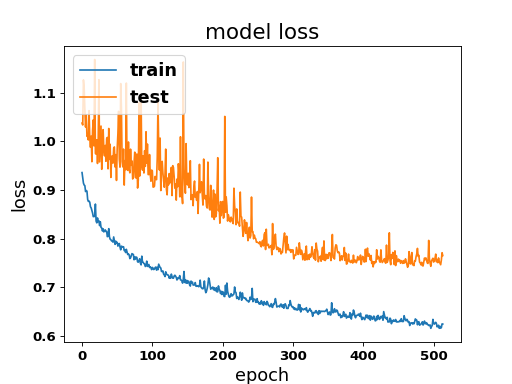

<IPython.core.display.Javascript object>


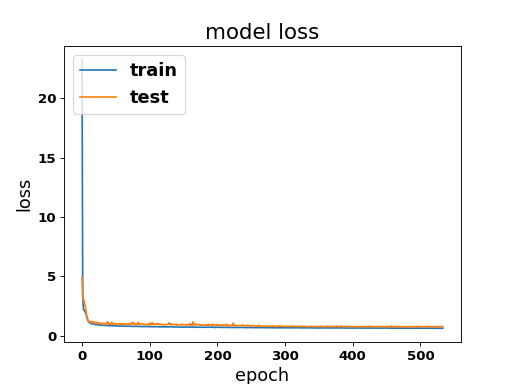

In [18]:
import tensorflow.keras.backend as K

def custom_loss(y_true, y_pred):
    
    loss = K.mean( 
        2.5*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,11.5),'float32')*K.cast(K.less_equal(y_pred,11.5),'float32') +
        5*(y_true-y_pred)*(y_true-y_pred) 
        *K.cast(K.greater(y_true,12.),'float32')*K.cast(K.less_equal(y_pred,12.0),'float32') +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.5),'float32')*K.cast(K.less_equal(y_pred,12.5),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.75),'float32')*K.cast(K.less_equal(y_pred,12.75),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,13.),'float32')*K.cast(K.less_equal(y_pred,13.),'float32')  
    )             
                 
            
    loss =  loss+K.mean((y_true-y_pred)*(y_true-y_pred))

    return loss

from tensorflow.keras.layers import Input

input1 = Input(shape=(148))
model1 = Dense(256,  activation='relu')(input1)
model1 = model1 = Dropout(0.5)(model1)
model1 = Dense(64, activation='relu')(model1)
model1 = Dense(32, activation='relu')(model1)
model1 = Dense(int(256),   activation='relu')(model1)
model1 = Dense(int(1024),  activation='relu')(model1)
model1 = Dense(int(256),  activation='relu')(model1)
model1 = Dense(32, activation='relu')(model1)
model1 = Dense(4, activation='relu')(model1)
model1 = Dense(1, activation='linear' )(model1)


output = model1
model = tensorflow.keras.models.Model(inputs=input1, outputs=output)
#compile model using accuracy to measure model performance
model.compile(loss=custom_loss, optimizer='adam',metrics=['mse'])
model.summary()

history = model.fit(X, 
                   y_train_log, 
                    validation_data=(
                        X_test, 
                        y_val_log,                                    ),
                    batch_size=32768,epochs=1000,verbose=2,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',  restore_best_weights=True,
             patience=50)])#


plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

results = model.predict(X_test)

df_results = pd.DataFrame(data=results, index = df_val.index)

In [19]:
import tensorflow.keras.backend as K
def custom_loss(y_true, y_pred):
    
    #y_pred must be [-1,1]
#     loss = K.mean( -(1-y_pred_scaled)*K.log(y_pred_scaled)*K.cast(K.greater(y_true,10.),'float32')
#             -(1-(1-y_pred_scaled))*K.log(1 - y_pred_scaled)*(K.cast(K.less(y_true,10.),'float32'))  )
    loss = K.mean( 
        2.5*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,11.5),'float32')*K.cast(K.less_equal(y_pred,11.5),'float32') +
        5*(y_true-y_pred)*(y_true-y_pred) 
        *K.cast(K.greater(y_true,12.),'float32')*K.cast(K.less_equal(y_pred,12.0),'float32') +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.5),'float32')*K.cast(K.less_equal(y_pred,12.5),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.75),'float32')*K.cast(K.less_equal(y_pred,12.75),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,13.),'float32')*K.cast(K.less_equal(y_pred,13.),'float32')  
    )             
                 
            
    loss =  loss+K.mean((y_true-y_pred)*(y_true-y_pred))

    return loss

filename='tail_loss'
model.save(filename)
model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss})
#model.save_weights( filename+'.h5')

print(model.evaluate(X_test,y_val_log.values))

results = model.predict(X_test)

df_results = pd.DataFrame(data=results, index = df_val.index)
tail_loss = df_results
# %matplotlib notebook
# plot_model(df_results)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: tail_loss/assets
1726/1726 [==============================] - 2s 1ms/step - loss: 0.7409 - mean_squared_error: 0.6311
[0.7408680319786072, 0.6310847997665405]


18/18 [==============================] - 0s 2ms/step - loss: 9.6054 - mean_squared_error: 1.0766
0.05 percentile 0.6031827330589294
0.1 percentile 0.5992940664291382
0.15 percentile 0.6030024886131287
0.2 percentile 0.6069089770317078
0.25 percentile 0.6191262602806091
0.3 percentile 0.6368486285209656
0.35 percentile 0.6587545275688171
0.4 percentile 0.6873691082000732
0.45 percentile 0.7141127586364746
0.5 percentile 0.7149814963340759
0.55 percentile 0.7107006907463074
0.6 percentile 0.6748920679092407
0.65 percentile 0.6085550785064697
0.7 percentile 0.5647279024124146
0.75 percentile 0.5424913763999939
0.8 percentile 0.5224223136901855
0.85 percentile 0.5106840133666992
0.9 percentile 0.5205656886100769
0.95 percentile 0.578220784664154
0.05 percentile from left 1.0652083158493042
0.1 percentile from left 0.8604524731636047
0.15 percentile from left 0.753518283367157
0.2 percentile from left 0.7003577947616577
0.25 percentile from left 0.645201563835144
0.3 percentile from left 0.

<IPython.core.display.Javascript object>


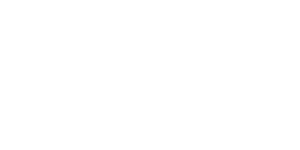

In [19]:
model.evaluate(X_test,y_val_log.values)
model.evaluate(X_val_90.values,y_val_log_90.values)
model.evaluate(X_val_95.values,y_val_log_95.values)
model.evaluate(X_val_99.values,y_val_log_99.values)


i=0
right_cum = []
for percent in [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]:
    right_cum.append(model.evaluate(X_val_precentile[i],y_val_log_precentile[i],verbose=0)[1])
    print((percentile[i]+' percentile'), right_cum[i] )
    i = i+ 1

i=0
left_cum = []
for percent in [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]:
    left_cum.append(model.evaluate(X_val_precentile_left[i],y_val_log_precentile_left[i],verbose=0)[1])
    print((percentile_left[i]+' percentile from left'),  left_cum[i])
    i = i+ 1    
    
plt.figure()
plt.scatter(np.array([.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])*100,left_cum)
plt.scatter(np.array([.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])*100,right_cum)
plt.xlim([0,100])
plt.ylim([0.3,1])
plt.legend(['left_cum error','right_cum error'])
plt.xlabel('percentile')


plt.show()

<IPython.core.display.Javascript object>


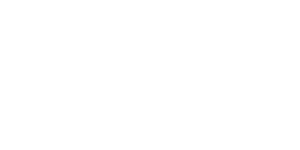

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<IPython.core.display.Javascript object>


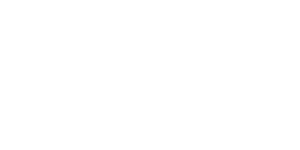

<IPython.core.display.Javascript object>


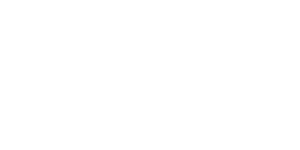

<IPython.core.display.Javascript object>


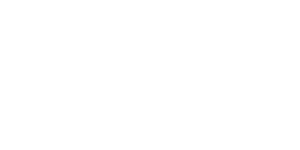

<IPython.core.display.Javascript object>


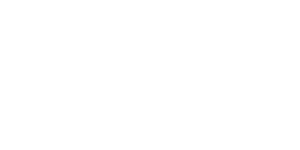

<IPython.core.display.Javascript object>


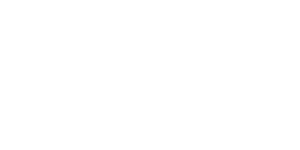

<IPython.core.display.Javascript object>


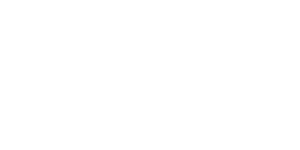

<IPython.core.display.Javascript object>


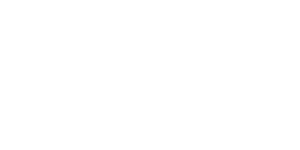

<IPython.core.display.Javascript object>


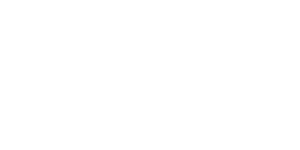

<IPython.core.display.Javascript object>


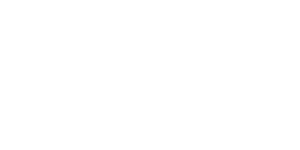

<IPython.core.display.Javascript object>


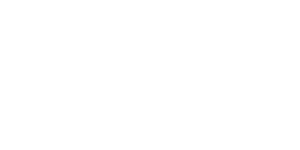

In [20]:
df_results = pd.DataFrame(data=results, index = df_val.index)
tail_loss = df_results
%matplotlib notebook
plot_model(df_results)

In [21]:
# from tensorflow.keras.layers import Input

# input1 = Input(shape=(148))
# model1 = Dense(256,  activation='relu')(input1)
# model1 = model1 = Dropout(0.5)(model1)
# model1 = Dense(64, activation='relu')(model1)
# model1 = Dense(32, activation='relu')(model1)
# model1 = Dense(4, activation='relu')(model1)
# model1 = Dense(1, activation='linear' )(model1)


# output = model1
# model = tensorflow.keras.models.Model(inputs=input1, outputs=output)
# #compile model using accuracy to measure model performance
# model.compile(loss='mse', optimizer='adam',metrics=['mse'])
# model.summary()

# history = model.fit(X, 
#                    y_train_log, 
#                     validation_data=(
#                         X_test, 
#                         y_val_log,                                    ),
#                     batch_size=32768,epochs=1000,verbose=2,
#                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',  restore_best_weights=True,
#              patience=50)])#


# plt.figure()
# # summarize history for loss
# plt.plot(history.history['loss'][20:])
# plt.plot(history.history['val_loss'][20:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['loss'][:])
# plt.plot(history.history['val_loss'][:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# results = model.predict(X_test)

# df_results = pd.DataFrame(data=results, index = df_val.index)

# model_1 = df_results

# plot_model(df_results)

In [22]:
filename='model_1'
#model.save(filename)
model = tensorflow.keras.models.load_model(filename)
model.save_weights( filename+'.h5')

results = model.predict(X_test)

df_results = pd.DataFrame(data=results, index = df_val.index)

model_1 = df_results

18/18 [==============================] - 0s 909us/step - loss: 2.4443 - mean_squared_error: 2.4443
0.05 percentile 0.5963658690452576
0.1 percentile 0.5902729630470276
0.15 percentile 0.5934708714485168
0.2 percentile 0.5986323952674866
0.25 percentile 0.6118549704551697
0.3 percentile 0.6324557662010193
0.35 percentile 0.6580994725227356
0.4 percentile 0.6932947039604187
0.45 percentile 0.7281360626220703
0.5 percentile 0.7497994899749756
0.55 percentile 0.7729820013046265
0.6 percentile 0.7721607685089111
0.65 percentile 0.742625892162323
0.7 percentile 0.7446980476379395
0.75 percentile 0.7773748636245728
0.8 percentile 0.8136454820632935
0.85 percentile 0.8744975924491882
0.9 percentile 0.989071786403656
0.95 percentile 1.2451224327087402
0.05 percentile from left 1.1033974885940552
0.1 percentile from left 0.9014594554901123
0.15 percentile from left 0.7813520431518555
0.2 percentile from left 0.7137486338615417
0.25 percentile from left 0.6510282754898071
0.3 percentile from left

<IPython.core.display.Javascript object>


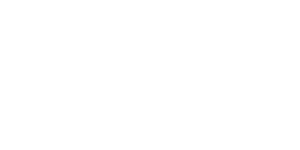

In [23]:
model.evaluate(X_test,y_val_log.values)
model.evaluate(X_val_90.values,y_val_log_90.values)
model.evaluate(X_val_95.values,y_val_log_95.values)
model.evaluate(X_val_99.values,y_val_log_99.values)



i=0
right_cum = []
for percent in [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]:
    right_cum.append(model.evaluate(X_val_precentile[i],y_val_log_precentile[i],verbose=0)[1])
    print((percentile[i]+' percentile'), right_cum[i] )
    i = i+ 1

i=0
left_cum = []
for percent in [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]:
    left_cum.append(model.evaluate(X_val_precentile_left[i],y_val_log_precentile_left[i],verbose=0)[1])
    print((percentile_left[i]+' percentile from left'),  left_cum[i])
    i = i+ 1    
    
plt.figure()
plt.scatter(np.array([.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])*100,left_cum)
plt.scatter(np.array([.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])*100,right_cum)
plt.xlim([0,100])
plt.ylim([0.3,1])
plt.legend(['left_cum error','right_cum error'])
plt.xlabel('percentile')


plt.show()

In [24]:


def plot_model_multiple(df_results,model_names, y_val_log):
    %matplotlib notebook
    num = len(df_results)
    names = ['val']
    for i in range(0,num):
        names.append(model_names[i])
    
    plt.figure()
    plt.plot(y_val_log[:],alpha = 0.5)
    for i in range(0,num):
        plt.plot(df_results[i],alpha = 0.5)
    plt.legend(names, loc='upper left')
    plt.show()


    plt.figure()
    plt.plot(10**y_val_log[:]*1.6e-6,alpha = 0.5)
    for i in range(0,num):
        plt.plot(10**df_results[i]*1.6e-6,alpha = 0.5)
    plt.legend(names, loc='upper left')
    plt.show()

    plt.figure()
    plt.hist(10**y_val_log.values*1.6e-6,bins=100, log=True,alpha = 0.5)
    for i in range(0,num):
        plt.hist(10**df_results[i].values*1.6e-6,bins=100, log=True,alpha = 0.5)
    plt.legend(names, loc='upper left')
    plt.show()



    plt.figure()
    plt.hist(y_val_log.values,bins=200,range=(6,14),alpha = 0.5)
    for i in range(0,num):  
        plt.hist(df_results[i].values,bins=200,range=(6,14),alpha = 0.5)
    plt.legend(names, loc='upper left')
    plt.show()



    plt.figure()
    plt.hist(y_val_log.values,bins=200,range=(6,14))
    for k in range(0,num):
        plt.hist(df_results[k].values,bins=200,range=(6,14),alpha = 0.5)
    plt.legend(names, loc='upper left')
    plt.ylim([0,2000])
    plt.show()



    plt.figure();
    for k in range(0,num):     
        errors= y_val_log.values-df_results[k].values[:,0]
        plt.scatter(y_val_log.values,errors,s=1,alpha = 0.5)
    plt.title('Errors over target Bins')
    plt.legend(model_names, loc='upper left')                      
    plt.show()

    plt.figure();
    for k in range(0,num):
        errors= y_val_log.values-df_results[k].values[:,0]     
        bin_total = np.zeros((200))
        bin_error_total = np.zeros((200))
        for j in range(0,y_val_log.values.shape[0]):
            i = int((y_val_log[j]-6)/((14-6)/200))
            if i < 200:
                bin_total[i] = bin_total[i]+1
                bin_error_total[i] = bin_error_total[i] + np.abs(errors[j])
        avg_error_over_hist = bin_error_total/(bin_total+.00001)
        plt.scatter(np.linspace(6,14,num=200),avg_error_over_hist,alpha = 0.5)
    plt.title('Average Validation Error over target Bins')    
    plt.legend(model_names, loc='upper left')
    plt.ylim([0,2.6])
    plt.show()

    for k in range(0,num):  
        plt.figure();

        errors= y_val_log.values-df_results[k].values[:,0]
        plt.hist2d(y_val_log.values,errors,bins=200)
        plt.title('Errors over target Bins'+model_names[k])
        plt.show()
        
    plt.figure();
    for k in range(0,num):      
        errors= y_val_log.values-df_results[k].values[:,0]     
        plt.scatter(df_val['SC_AACGM_LAT'].values,errors,s=1,alpha = 0.5)
    plt.legend(model_names, loc='upper left')                      
    plt.title('Errors over SC_AACGM_LAT Bins')
    plt.show()

    plt.figure();
    for k in range(0,num):
        errors= y_val_log.values-df_results[k].values[:,0]     
        bin_total = np.zeros((200))
        bin_error_total = np.zeros((200))
        for j in range(0,y_val_log.values.shape[0]):
            i = int((df_val['SC_AACGM_LAT'].values[j]-45)/((90-45)/200))
            if i < 200:
                bin_total[i] = bin_total[i]+1
                bin_error_total[i] = bin_error_total[i] + np.abs(errors[j])
        avg_error_over_hist = bin_error_total/bin_total
        plt.scatter(np.linspace(45,90,num=200),avg_error_over_hist,alpha = 0.5)
    plt.title('Average Validation Error over SC_AACGM_LAT Bins')
    plt.legend(model_names, loc='upper left')
    plt.ylim([0,1.2])
    plt.show()

<IPython.core.display.Javascript object>


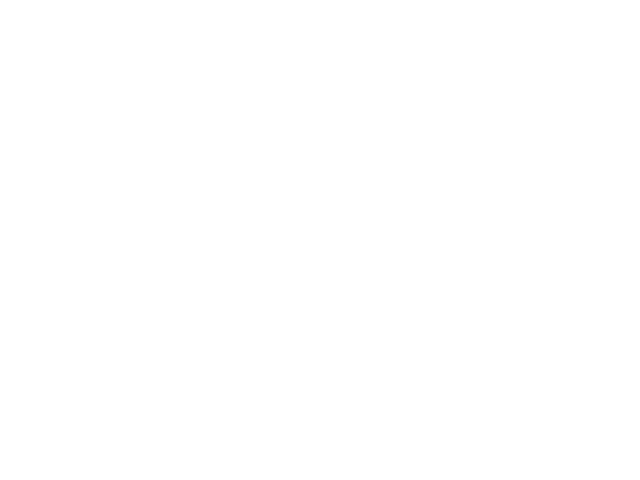

<IPython.core.display.Javascript object>


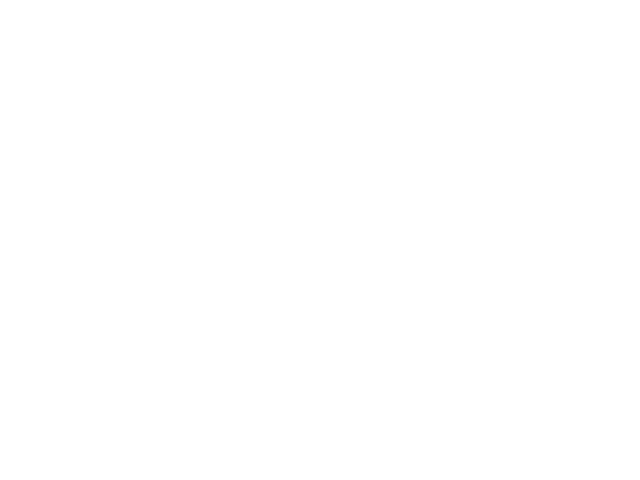

<IPython.core.display.Javascript object>


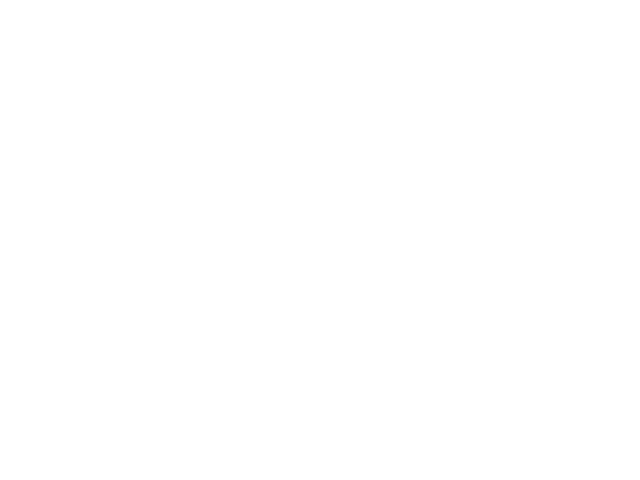

<IPython.core.display.Javascript object>


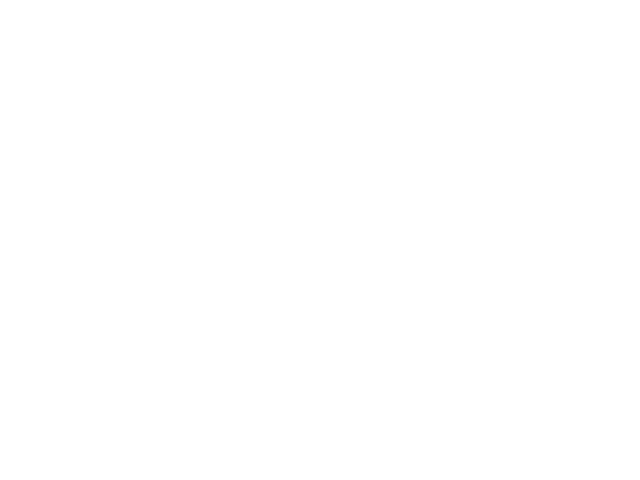

<IPython.core.display.Javascript object>


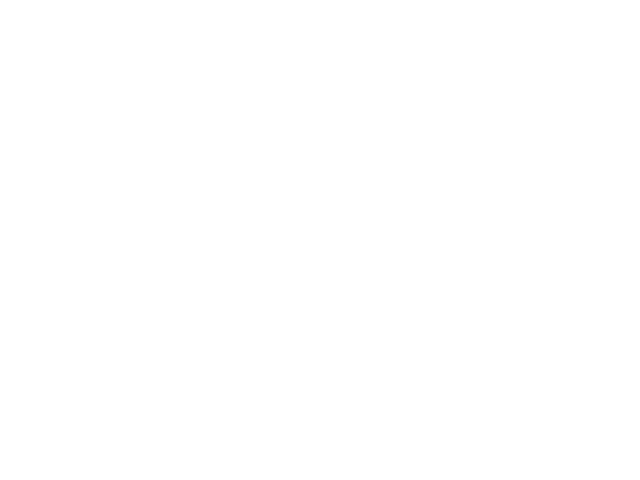

<IPython.core.display.Javascript object>


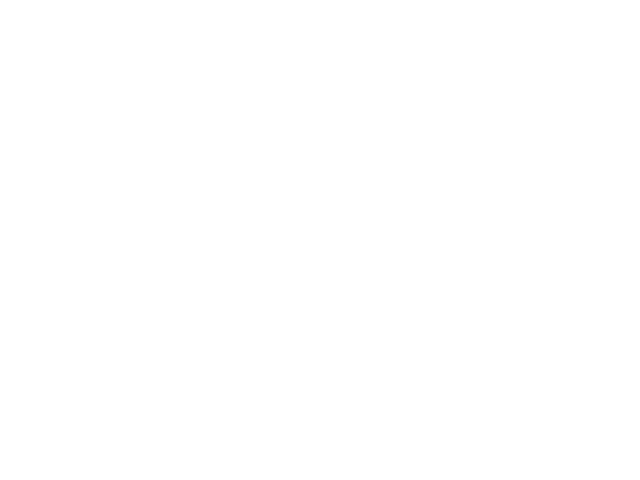

<IPython.core.display.Javascript object>


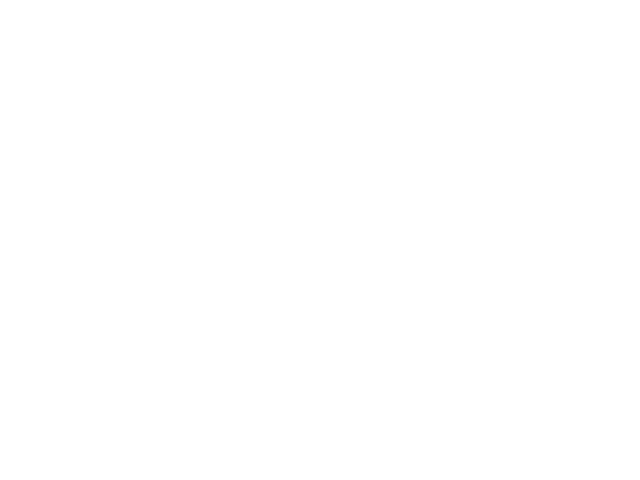

<IPython.core.display.Javascript object>


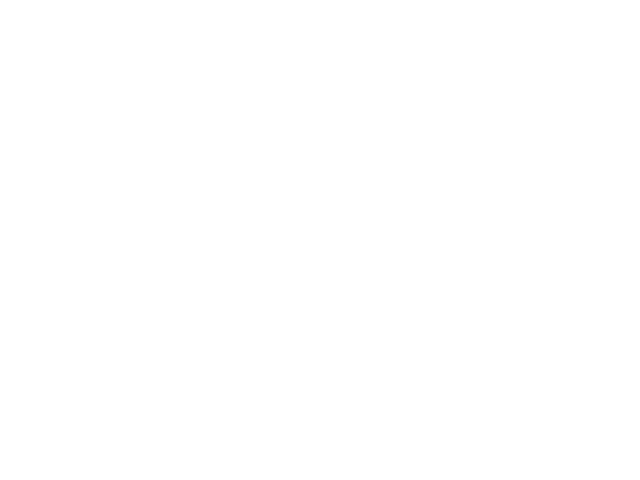

<IPython.core.display.Javascript object>


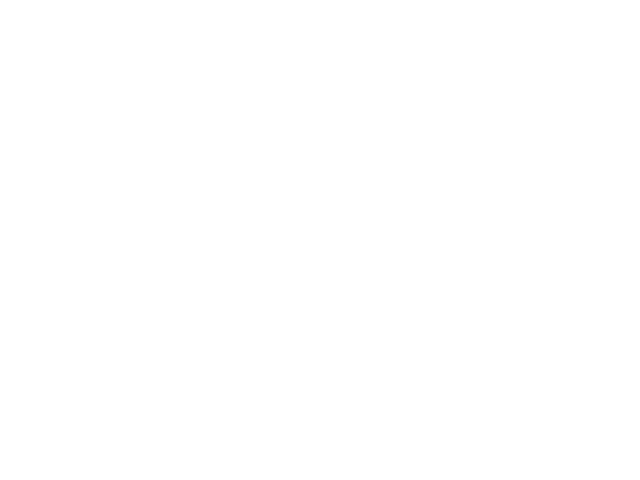

<IPython.core.display.Javascript object>


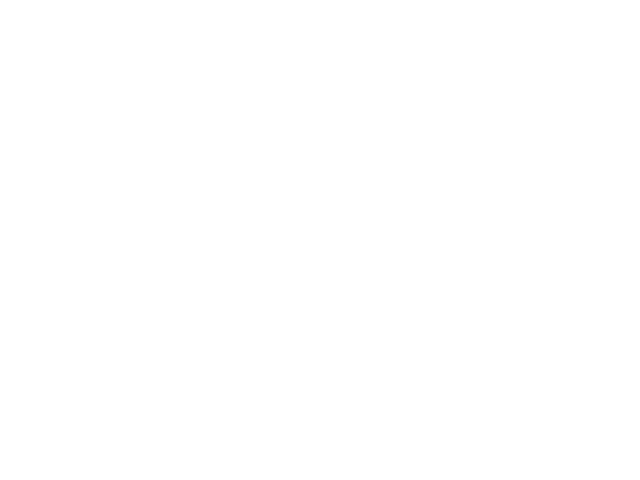

<IPython.core.display.Javascript object>


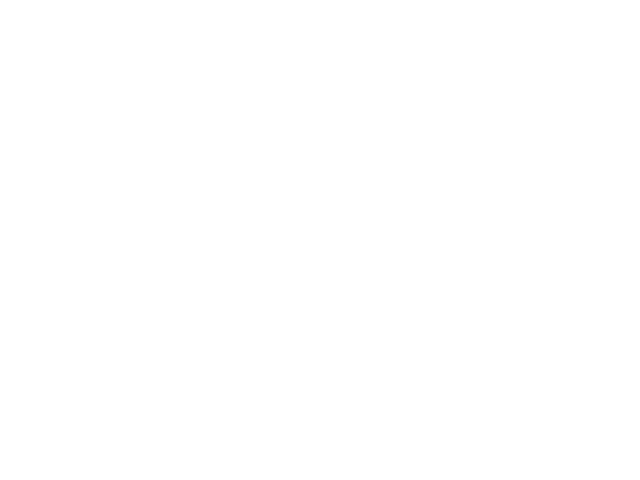

In [25]:
plot_model_multiple([model_3, tail_loss],['8-layer model','8-layer with tail_loss'], y_val_log)

In [26]:
t0=23700-15
num=500

In [27]:
t_range_all = np.array(np.linspace(t0,t0+num,num+1),dtype=np.int)

In [28]:
mark= ['s', 'o', 'D', 'v']


In [ ]:
def custom_loss(y_true, y_pred):
    
    #y_pred must be [-1,1]
#     loss = K.mean( -(1-y_pred_scaled)*K.log(y_pred_scaled)*K.cast(K.greater(y_true,10.),'float32')
#             -(1-(1-y_pred_scaled))*K.log(1 - y_pred_scaled)*(K.cast(K.less(y_true,10.),'float32'))  )
    loss = K.mean( 
        2.5*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,11.5),'float32')*K.cast(K.less_equal(y_pred,11.5),'float32') +
        5*(y_true-y_pred)*(y_true-y_pred) 
        *K.cast(K.greater(y_true,12.),'float32')*K.cast(K.less_equal(y_pred,12.0),'float32') +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.5),'float32')*K.cast(K.less_equal(y_pred,12.5),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.75),'float32')*K.cast(K.less_equal(y_pred,12.75),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,13.),'float32')*K.cast(K.less_equal(y_pred,13.),'float32')  
    )             
                 
            
    loss =  loss+K.mean((y_true-y_pred)*(y_true-y_pred))

    return loss

filename='model_3'
#model.save(filename)
model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss})


%matplotlib inline
plt.ioff()

range1=np.max(np.max([-df_val['AL'][t_range_all].values,df_val['AE'][t_range_all].values,df_val['AU'][t_range_all].values]))
range2=np.max(np.max([df_val['Bx'][t_range_all],df_val['By'][t_range_all],df_val['Bz'][t_range_all]]))
range3=np.max(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range_all]))

for i in range(0,t_range_all.shape[0]):
    t_range = t_range_all[0:i+1]

    # using the variable axs for multiple Axes
    fig= plt.figure(figsize=(12,10))

    ax1 = plt.subplot2grid((5,4), (0,0), colspan=4)
    ax2 = plt.subplot2grid((5,4), (1,0), colspan=4)
    ax3 = plt.subplot2grid((5,4), (2,0), colspan=4)

    ax4 = plt.subplot2grid((5,4), (3,0), rowspan=2,colspan=2,polar=True)
    ax5 = plt.subplot2grid((5,4), (3, 2), rowspan=2,colspan=2,polar=True)


    ax1.plot(-df_val['AL'][t_range], marker=mark[1],markersize=3)
    ax1.plot(df_val['AE'][t_range], marker=mark[2],markersize=3)
    ax1.plot(df_val['AU'][t_range], marker=mark[3],markersize=3)
    ax1.legend(['-AL','AE','AU'])
    ax1.set_ylim(top=range1)
    ax1.set_xlim(right=df_val.index[t_range_all[-1]])
    ax1.set_xlabel('time (month, day, year labels)')
    ax1.set_title('Example Magnetic Indices',fontweight="bold")


    ax2.plot(df_val['Bx'][t_range], marker=mark[1],markersize=3)
    ax2.plot(df_val['By'][t_range], marker=mark[2],markersize=3)
    ax2.plot(df_val['Bz'][t_range], marker=mark[3],markersize=3)
    ax2.legend(['Bx','By','Bz'])
    ax2.set_ylim(top=range2)
    ax2.set_xlim(right=df_val.index[t_range_all[-1]])

                   
#     ax3.set_title('Predicted Electron Precipitation Energy Flux')
#     ax3.plot(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range]))
#     ax3.plot(model_1[0][t_range])
#     ax3.plot(model_3[0][t_range])
#     ax3.plot(tail_loss[0][t_range])
#     ax3.legend(['ELE_TOTAL_ENERGY_FLUX','ML_4_layers','ML_squeeze','ML_squeeze_tail_loss'])
#     ax3.set_ylim(top=range3)
#     ax3.set_xlim(right=df_val.index[t_range_all[-1]])

                   
    ax3.set_title('Measured Electron Precipitation Energy Flux [Log10 eV/cm^2/ster/s]',fontweight="bold")
    ax3.plot(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range]), marker=mark[1],markersize=3)
    ax3.legend(['ELE_TOTAL_ENERGY_FLUX','ML_4_layers','ML_squeeze','ML_squeeze_tail_loss'])
    ax3.set_ylim(top=range3)
    ax3.set_xlim(right=df_val.index[t_range_all[-1]])
  
                   
    ax4.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range],df_val['cos_SC_AACGM_LTIME'][t_range]) ),
               (90.-(df_val['SC_AACGM_LAT'][t_range])))

#     polar2dial(ax4)
    ax4.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax4.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax4.set_rgrids(r_label_values,labels=r_labels)
    ax4.set_rlim([0.,45.])
    ax4.set_title('Satellite Position in Northern Hemisphere (top down Earth view)',pad=10,fontweight="bold")

    
    mlatgridN = np.linspace(45,90,num=100)
    mltgridN =  np.linspace(0,24,num=100)
    model_input = np.zeros((100,100,148))
    flux = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))

    
    for j in range(0,mlatgridN.shape[0]):
        for k in range(0,mltgridN.shape[0]):        
            #calc cos and sin
            rads = mltgridN[k]*15*3.14159/180.
            model_input[j,k,:]=X_val.values[t_range_all[i],:]
            model_input[j,k,7]=np.cos(rads)
            model_input[j,k,6]=np.sin(rads)
            model_input[j,k,0]=mlatgridN[j]
    shaped = np.reshape(model_input,(100*100,148))
    X_val_scaled = scaler_X.transform(shaped)
    #get auroral region and flux
    flux = np.reshape(model.predict(X_val_scaled),(100,100))

    pcolor_kwargs = {'cmap':'gnuplot','vmin':7,'vmax':12}
    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)
#    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,(10**flux)*(1.60218e-12),'N',**pcolor_kwargs)

    #ax5.colorbar(mappableN,ax=ax5,label='Total Flux')
    ax5.set_title('Predicted Electron Precipitation Energy Flux',fontweight="bold",pad=10)

    
    ax5.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax5.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax5.set_rgrids(r_label_values,labels=r_labels)
    ax5.set_rlim([0.,45.])
    ax5.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]]) ),
               (90.-(df_val['SC_AACGM_LAT'][t_range[i]])))
    plt.colorbar(mappableN,ax=ax5,label='Log10 Total Flux [eV/cm^2/ster/s]')
    
    
    
    fig.tight_layout() 
    name = 'figures/fig_'+str(i) + '.png'
    fig.savefig(name,dpi=200)

In [ ]:


import tensorflow.keras.backend as K
def custom_loss(y_true, y_pred):
    
    #y_pred must be [-1,1]
#     loss = K.mean( -(1-y_pred_scaled)*K.log(y_pred_scaled)*K.cast(K.greater(y_true,10.),'float32')
#             -(1-(1-y_pred_scaled))*K.log(1 - y_pred_scaled)*(K.cast(K.less(y_true,10.),'float32'))  )
    loss = K.mean( 
        2.5*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,11.5),'float32')*K.cast(K.less_equal(y_pred,11.5),'float32') +
        5*(y_true-y_pred)*(y_true-y_pred) 
        *K.cast(K.greater(y_true,12.),'float32')*K.cast(K.less_equal(y_pred,12.0),'float32') +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.5),'float32')*K.cast(K.less_equal(y_pred,12.5),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.75),'float32')*K.cast(K.less_equal(y_pred,12.75),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,13.),'float32')*K.cast(K.less_equal(y_pred,13.),'float32')  
    )             
                 
            
    loss =  loss+K.mean((y_true-y_pred)*(y_true-y_pred))

    return loss

filename='model_3'
#model.save(filename)
model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss})


%matplotlib inline
plt.ioff()

range1=np.max(np.max([-df_val['AL'][t_range_all].values,df_val['AE'][t_range_all].values,df_val['AU'][t_range_all].values]))
range2=np.max(np.max([df_val['Bx'][t_range_all],df_val['By'][t_range_all],df_val['Bz'][t_range_all]]))
range3=np.max(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range_all]))

ovation_points = []

for i in range(0,t_range_all.shape[0]):
    t_range = t_range_all[0:i+1]

    # using the variable axs for multiple Axes
    fig= plt.figure(figsize=(12,10))

    ax1 = plt.subplot2grid((5,4), (0,0), colspan=4)
    ax2 = plt.subplot2grid((5,4), (1,0), colspan=4)
    ax3 = plt.subplot2grid((5,4), (2,0), colspan=4)

    ax4 = plt.subplot2grid((5,4), (3,0), rowspan=2,colspan=2,polar=True)
    ax5 = plt.subplot2grid((5,4), (3, 2), rowspan=2,colspan=2,polar=True)


    ax1.plot(-df_val['AL'][t_range], marker=mark[1],markersize=3)
    ax1.plot(df_val['AE'][t_range], marker=mark[2],markersize=3)
    ax1.plot(df_val['AU'][t_range], marker=mark[3],markersize=3)
    ax1.legend(['-AL','AE','AU'])
    ax1.set_ylim(top=range1)
    ax1.set_xlim(right=df_val.index[t_range_all[-1]])
    ax1.set_xlabel('time (month, day, year labels)')
    ax1.set_title('Example Magnetic Indices',fontweight="bold")



    mlatgridN = np.linspace(45,90,num=100)
    mltgridN =  np.linspace(0,24,num=100)                   
    
    #################################
    #
    #ML model
    ##########################
    model_input = np.zeros((100,100,148))
    flux = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))

    
    for j in range(0,mlatgridN.shape[0]):
        for k in range(0,mltgridN.shape[0]):        
            #calc cos and sin
            rads = mltgridN[k]*15*3.14159/180.
            model_input[j,k,:]=X_val.values[t_range_all[i],:]
            model_input[j,k,7]=np.cos(rads)
            model_input[j,k,6]=np.sin(rads)
            model_input[j,k,0]=mlatgridN[j]
    shaped = np.reshape(model_input,(100*100,148))
    X_val_scaled = scaler_X.transform(shaped)
    #get auroral region and flux
    flux = np.reshape(model.predict(X_val_scaled),(100,100))

    pcolor_kwargs = {'cmap':'gnuplot','vmin':7,'vmax':12}
    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)
#    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,(10**flux)*(1.60218e-12),'N',**pcolor_kwargs)

    #ax5.colorbar(mappableN,ax=ax5,label='Total Flux')
    ax5.set_title('Predicted Electron Precipitation Energy Flux (Neural Net)',fontweight="bold", fontsize='medium',pad=10)

    
    ax5.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax5.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax5.set_rgrids(r_label_values,labels=r_labels)
    ax5.set_rlim([0.,45.])
    ax5.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]]) ),
               (90.-(df_val['SC_AACGM_LAT'][t_range[i]])))
    
    

      
    ###########################3
    # Ovation
    ########################
    dt = df_val.index[t_range[i]]
    auroral_types = ['diff','mono','wave','ions']
    # axS = f.add_subplot(122,projection='polar')
    for jj in range(0,3):
        atype = auroral_types[jj]
        jtype ="energy"
        bincorrect = True
        combine_hemispheres = True
        dtstr = dt.strftime('%Y%m%d %H:%M')
        if jtype=='average energy':
            estimator = AverageEnergyEstimator(atype)
            get_precip_for_time = estimator.get_eavg_for_time
        else:
            estimator = FluxEstimator(atype,jtype)
            get_precip_for_time = estimator.get_flux_for_time


        tflux_kwargs = {'combine_hemispheres':combine_hemispheres,
                        'return_dF':True}
        fluxtupleN = get_precip_for_time(dt,hemi='N',**tflux_kwargs)
        mlatgridN,mltgridN,fluxgridN,newell_coupling = fluxtupleN
        fluxtupleS = get_precip_for_time(dt,hemi='S',**tflux_kwargs)
        mlatgridS,mltgridS,fluxgridS,newell_coupling = fluxtupleS

        if bincorrect:
            bcN = BinCorrector(mlatgridN,mltgridN)
            fluxgridN = bcN.fix(fluxgridN)
            bcS = BinCorrector(mlatgridS,mltgridS)
            fluxgridS = bcS.fix(fluxgridS)
            print("Correction Applied")

        if jj== 0:
            fluxgridN_sum = fluxgridN
            fluxgridS_sum = fluxgridS
        else:
            fluxgridN_sum = fluxgridN_sum+fluxgridN
            fluxgridS_sum = fluxgridN_sum+fluxgridS

    pcolor_kwargs = {'cmap':'gnuplot','vmin':7,'vmax':12}
    mappableN = pcolor_flux(ax4,mlatgridN,mltgridN,np.log10(fluxgridN_sum/1.60218e-12),'N',**pcolor_kwargs)

    ax4.set_title('Predicted Electron Precipitation Energy Flux (OVATION Pyme)',pad =10,fontweight="bold", fontsize='medium')

     
    ax4.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax4.set_thetagrids(theta_label_values,labels=theta_labels,fontsize='medium', )

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax4.set_rgrids(r_label_values,labels=r_labels)
    ax4.set_rlim([0.,45.])
    ax4.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]]) ),
               (90.-(df_val['SC_AACGM_LAT'][t_range[i]])))            

    plt.colorbar(mappableN,ax=ax5,label='Log10 Total Flux [eV/cm^2/ster/s]')
    
    
    #######
    ## comparison to measured data and ovation 
    #####
    ltime = np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]])/3.14159/2*24+12
    if  df_val['SC_AACGM_LAT'][t_range[i] ]< 50:
       lat_index = 0
    else:
        lat_index = int(   (90 - df_val['SC_AACGM_LAT'][t_range[i]] ) /40*80)
    long_index = int( ltime/24*96 )
    print(lat_index, long_index, df_val['SC_AACGM_LAT'][t_range[i]] ,ltime )
    closestpoint = np.log10(fluxgridN_sum[lat_index,long_index]/1.60218e-12)
    
    ovation_points.append(closestpoint)
    ovation_df = pd.DataFrame(data=ovation_points,index=df_val.index[t_range])
    
    
    
    ax2.set_title('Electron Precipitation Energy Flux [eV/cm^2/ster/s]',fontweight="bold")
    ax2.plot((df_val['ELE_TOTAL_ENERGY_FLUX'][t_range]), marker=mark[1],markersize=3)
    ax2.plot(10**ovation_df, marker=mark[2],markersize=3)
    ax2.plot(10**model_3[0][t_range], marker=mark[3],markersize=3)
    ax2.legend(['measured validation data','OVATION Pyme model','neural net'])
    ax2.set_ylim(top=10**range3, bottom=-1e12)
    ax2.set_xlim(right=df_val.index[t_range_all[-1]])                   


                   
    ax3.set_title('Log Scale Electron Precipitation Energy Flux [Log10 eV/cm^2/ster/s]',fontweight="bold")
    ax3.plot(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range]), marker=mark[1],markersize=3)
    ax3.plot(ovation_df, marker=mark[2],markersize=3)
    ax3.plot(model_3[0][t_range], marker=mark[3],markersize=3)
    ax3.legend(['measured validation data','OVATION Pyme model','neural net'])
    ax3.set_ylim(top=12,bottom=7)
    ax3.set_xlim(right=df_val.index[t_range_all[-1]])
  
    
    
    fig.tight_layout() 
    name = 'figures/fig_models_'+str(i) + '.png'
    fig.savefig(name,dpi=200)



In [ ]:


import tensorflow.keras.backend as K
def custom_loss(y_true, y_pred):
    
    #y_pred must be [-1,1]
#     loss = K.mean( -(1-y_pred_scaled)*K.log(y_pred_scaled)*K.cast(K.greater(y_true,10.),'float32')
#             -(1-(1-y_pred_scaled))*K.log(1 - y_pred_scaled)*(K.cast(K.less(y_true,10.),'float32'))  )
    loss = K.mean( 
        2.5*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,11.5),'float32')*K.cast(K.less_equal(y_pred,11.5),'float32') +
        5*(y_true-y_pred)*(y_true-y_pred) 
        *K.cast(K.greater(y_true,12.),'float32')*K.cast(K.less_equal(y_pred,12.0),'float32') +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.5),'float32')*K.cast(K.less_equal(y_pred,12.5),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.75),'float32')*K.cast(K.less_equal(y_pred,12.75),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,13.),'float32')*K.cast(K.less_equal(y_pred,13.),'float32')  
    )             
                 
            
    loss =  loss+K.mean((y_true-y_pred)*(y_true-y_pred))

    return loss




%matplotlib inline
plt.ioff()

range1=np.max(np.max([-df_val['AL'][t_range_all].values,df_val['AE'][t_range_all].values,df_val['AU'][t_range_all].values]))
range2=np.max(np.max([df_val['Bx'][t_range_all],df_val['By'][t_range_all],df_val['Bz'][t_range_all]]))
range3=np.max(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range_all]))

ovation_points = []

for i in range(0,t_range_all.shape[0]):
    t_range = t_range_all[0:i+1]

    # using the variable axs for multiple Axes
    fig= plt.figure(figsize=(12,10))

    ax1 = plt.subplot2grid((5,4), (0,0), colspan=4)
    #ax2 = plt.subplot2grid((5,4), (1,0), colspan=4)
    ax3 = plt.subplot2grid((5,4), (1,0), rowspan=2, colspan=4)

    ax4 = plt.subplot2grid((5,4), (3,0), rowspan=2,colspan=2,polar=True)
    ax5 = plt.subplot2grid((5,4), (3, 2), rowspan=2,colspan=2,polar=True)


    ax1.plot(-df_val['AL'][t_range], marker=mark[1],markersize=3)
    ax1.plot(df_val['AE'][t_range], marker=mark[2],markersize=3)
    ax1.plot(df_val['AU'][t_range], marker=mark[3],markersize=3)
    ax1.legend(['-AL','AE','AU'])
    ax1.set_ylim(top=range1)
    ax1.set_xlim(right=df_val.index[t_range_all[-1]])
    ax1.set_xlabel('time (month, day, year labels)')
    ax1.set_title('Example Magnetic Indices',fontweight="bold")



    mlatgridN = np.linspace(45,90,num=100)
    mltgridN =  np.linspace(0,24,num=100)                   
    
    #################################
    #
    #ML model
    ##########################
    
    filename='tail_loss'
    #model.save(filename)
    model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss})
    
    model_input = np.zeros((100,100,148))
    flux = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))

    
    for j in range(0,mlatgridN.shape[0]):
        for k in range(0,mltgridN.shape[0]):        
            #calc cos and sin
            rads = mltgridN[k]*15*3.14159/180.
            model_input[j,k,:]=X_val.values[t_range_all[i],:]
            model_input[j,k,7]=np.cos(rads)
            model_input[j,k,6]=np.sin(rads)
            model_input[j,k,0]=mlatgridN[j]
    shaped = np.reshape(model_input,(100*100,148))
    X_val_scaled = scaler_X.transform(shaped)
    #get auroral region and flux
    flux = np.reshape(model.predict(X_val_scaled),(100,100))

    pcolor_kwargs = {'cmap':'gnuplot','vmin':7,'vmax':12}
    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)
#    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,(10**flux)*(1.60218e-12),'N',**pcolor_kwargs)

    #ax5.colorbar(mappableN,ax=ax5,label='Total Flux')
    ax5.set_title('8-Hidden Layer Neural Network with modified Loss',fontweight="bold",pad=10)

    
    ax5.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax5.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax5.set_rgrids(r_label_values,labels=r_labels)
    ax5.set_rlim([0.,45.])
    ax5.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]]) ),
               (90.-(df_val['SC_AACGM_LAT'][t_range[i]])))
    

    filename='model_3'
    #model.save(filename)
    model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss})
    
    for j in range(0,mlatgridN.shape[0]):
        for k in range(0,mltgridN.shape[0]):        
            #calc cos and sin
            rads = mltgridN[k]*15*3.14159/180.
            model_input[j,k,:]=X_val.values[t_range_all[i],:]
            model_input[j,k,7]=np.cos(rads)
            model_input[j,k,6]=np.sin(rads)
            model_input[j,k,0]=mlatgridN[j]
    shaped = np.reshape(model_input,(100*100,148))
    X_val_scaled = scaler_X.transform(shaped)
    #get auroral region and flux
    flux = np.reshape(model.predict(X_val_scaled),(100,100))

    pcolor_kwargs = {'cmap':'gnuplot','vmin':7,'vmax':12}
    mappableN = pcolor_flux(ax4,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)
#    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,(10**flux)*(1.60218e-12),'N',**pcolor_kwargs)

    #ax5.colorbar(mappableN,ax=ax5,label='Total Flux')
    ax4.set_title('8-Hidden Layer Neural Network',fontweight="bold",pad=10)

    
    ax4.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax4.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax4.set_rgrids(r_label_values,labels=r_labels)
    ax4.set_rlim([0.,45.])
    ax4.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]]) ),
               (90.-(df_val['SC_AACGM_LAT'][t_range[i]])))
    

      
    plt.colorbar(mappableN,ax=ax5,label='Log10 Total Flux [eV/cm^2/ster/s]')
    
    
    #######
    ## comparison to measured data and ovation 
    #####

    
           
                  
    ax3.set_title('Log Scale Electron Precipitation Energy Flux [Log10 eV/cm^2/ster/s]',fontweight="bold")
    ax3.plot(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range]), marker=mark[1])
    ax3.plot(model_3[0][t_range], marker=mark[2])
    ax3.plot(tail_loss[0][t_range], marker=mark[3])
    ax3.legend(['measured validation data','8 hidden layer network','Loss modified for tail'])
    ax3.set_ylim(top=12,bottom=7)
    ax3.set_xlim(right=df_val.index[t_range_all[-1]])
  
    
    
    fig.tight_layout() 
    name = 'figures/fig_models2_'+str(i) + '.png'
    fig.savefig(name,dpi=200)



In [ ]:


import tensorflow.keras.backend as K
def custom_loss(y_true, y_pred):
    
    #y_pred must be [-1,1]
#     loss = K.mean( -(1-y_pred_scaled)*K.log(y_pred_scaled)*K.cast(K.greater(y_true,10.),'float32')
#             -(1-(1-y_pred_scaled))*K.log(1 - y_pred_scaled)*(K.cast(K.less(y_true,10.),'float32'))  )
    loss = K.mean( 
        2.5*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,11.5),'float32')*K.cast(K.less_equal(y_pred,11.5),'float32') +
        5*(y_true-y_pred)*(y_true-y_pred) 
        *K.cast(K.greater(y_true,12.),'float32')*K.cast(K.less_equal(y_pred,12.0),'float32') +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.5),'float32')*K.cast(K.less_equal(y_pred,12.5),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.75),'float32')*K.cast(K.less_equal(y_pred,12.75),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,13.),'float32')*K.cast(K.less_equal(y_pred,13.),'float32')  
    )             
                 
            
    loss =  loss+K.mean((y_true-y_pred)*(y_true-y_pred))

    return loss




%matplotlib inline
plt.ioff()

range1=np.max(np.max([-df_val['AL'][t_range_all].values,df_val['AE'][t_range_all].values,df_val['AU'][t_range_all].values]))
range2=np.max(np.max([df_val['Bx'][t_range_all],df_val['By'][t_range_all],df_val['Bz'][t_range_all]]))
range3=np.max(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range_all]))

ovation_points = []

for i in range(0,t_range_all.shape[0]):
    t_range = t_range_all[0:i+1]

    # using the variable axs for multiple Axes
    fig= plt.figure(figsize=(12,10))

    ax1 = plt.subplot2grid((5,4), (0,0), colspan=4)
    #ax2 = plt.subplot2grid((5,4), (1,0), colspan=4)
    ax3 = plt.subplot2grid((5,4), (1,0), rowspan=2, colspan=4)

    ax4 = plt.subplot2grid((5,4), (3,0), rowspan=2,colspan=2,polar=True)
    ax5 = plt.subplot2grid((5,4), (3, 2), rowspan=2,colspan=2,polar=True)

    ax1.plot(-df_val['AL'][t_range], marker=mark[1],markersize=3)
    ax1.plot(df_val['AE'][t_range], marker=mark[2],markersize=3)
    ax1.plot(df_val['AU'][t_range], marker=mark[3],markersize=3)
    ax1.legend(['-AL','AE','AU'])
    ax1.set_ylim(top=range1)
    ax1.set_xlim(right=df_val.index[t_range_all[-1]])
    ax1.set_xlabel('time (month, day, year labels)')
    ax1.set_title('Example Magnetic Indices',fontweight="bold")



    mlatgridN = np.linspace(45,90,num=100)
    mltgridN =  np.linspace(0,24,num=100)                   
    
    #################################
    #
    #ML model
    ##########################
    
    filename='model_1'
    #model.save(filename)
    model = tensorflow.keras.models.load_model(filename)
    
    model_input = np.zeros((100,100,148))
    flux = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))

    
    for j in range(0,mlatgridN.shape[0]):
        for k in range(0,mltgridN.shape[0]):        
            #calc cos and sin
            rads = mltgridN[k]*15*3.14159/180.
            model_input[j,k,:]=X_val.values[t_range_all[i],:]
            model_input[j,k,7]=np.cos(rads)
            model_input[j,k,6]=np.sin(rads)
            model_input[j,k,0]=mlatgridN[j]
    shaped = np.reshape(model_input,(100*100,148))
    X_val_scaled = scaler_X.transform(shaped)
    #get auroral region and flux
    flux = np.reshape(model.predict(X_val_scaled),(100,100))

    pcolor_kwargs = {'cmap':'gnuplot','vmin':7.0,'vmax':12}
    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)
#    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,(10**flux)*(1.60218e-12),'N',**pcolor_kwargs)

    #ax5.colorbar(mappableN,ax=ax5,label='Total Flux')
    ax5.set_title('4-Hidden Layer Neural Network ',fontweight="bold",pad=10)

    
    ax5.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax5.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax5.set_rgrids(r_label_values,labels=r_labels)
    ax5.set_rlim([0.,45.])
    ax5.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]]) ),
               (90.-(df_val['SC_AACGM_LAT'][t_range[i]])))
    

    filename='model_3'
    #model.save(filename)
    model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss})
    
    for j in range(0,mlatgridN.shape[0]):
        for k in range(0,mltgridN.shape[0]):        
            #calc cos and sin
            rads = mltgridN[k]*15*3.14159/180.
            model_input[j,k,:]=X_val.values[t_range_all[i],:]
            model_input[j,k,7]=np.cos(rads)
            model_input[j,k,6]=np.sin(rads)
            model_input[j,k,0]=mlatgridN[j]
    shaped = np.reshape(model_input,(100*100,148))
    X_val_scaled = scaler_X.transform(shaped)
    #get auroral region and flux
    flux = np.reshape(model.predict(X_val_scaled),(100,100))

    pcolor_kwargs = {'cmap':'gnuplot','vmin':7.0,'vmax':12}
    mappableN = pcolor_flux(ax4,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)
#    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,(10**flux)*(1.60218e-12),'N',**pcolor_kwargs)

    #ax5.colorbar(mappableN,ax=ax5,label='Total Flux')
    ax4.set_title('8-Hidden Layer Neural Network',fontweight="bold",pad=10)

    
    ax4.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax4.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax4.set_rgrids(r_label_values,labels=r_labels)
    ax4.set_rlim([0.,45.])
    ax4.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]]) ),
               (90.-(df_val['SC_AACGM_LAT'][t_range[i]])))
    

      
    plt.colorbar(mappableN,ax=ax5,label='Log10 Total Flux [eV/cm^2/ster/s]')
    
    
    #######
    ## comparison to measured data and ovation 
    #####

    
           
                  
    ax3.set_title('Log Scale Electron Precipitation Energy Flux [Log10 eV/cm^2/ster/s]',fontweight="bold")
    ax3.plot(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range]), marker=mark[1])
    ax3.plot(model_3[0][t_range], marker=mark[2])
    ax3.plot(model_1[0][t_range], marker=mark[3])
    ax3.legend(['measured validation data','8 hidden layer network','4 hidden layer network'])
    ax3.set_ylim(top=12,bottom=7)
    ax3.set_xlim(right=df_val.index[t_range_all[-1]])
  
    
    
    fig.tight_layout() 
    name = 'figures/fig_models3_'+str(i) + '.png'
    fig.savefig(name,dpi=200)



In [ ]:


import tensorflow.keras.backend as K
def custom_loss(y_true, y_pred):
    
    #y_pred must be [-1,1]
#     loss = K.mean( -(1-y_pred_scaled)*K.log(y_pred_scaled)*K.cast(K.greater(y_true,10.),'float32')
#             -(1-(1-y_pred_scaled))*K.log(1 - y_pred_scaled)*(K.cast(K.less(y_true,10.),'float32'))  )
    loss = K.mean( 
        2.5*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,11.5),'float32')*K.cast(K.less_equal(y_pred,11.5),'float32') +
        5*(y_true-y_pred)*(y_true-y_pred) 
        *K.cast(K.greater(y_true,12.),'float32')*K.cast(K.less_equal(y_pred,12.0),'float32') +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.5),'float32')*K.cast(K.less_equal(y_pred,12.5),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.75),'float32')*K.cast(K.less_equal(y_pred,12.75),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,13.),'float32')*K.cast(K.less_equal(y_pred,13.),'float32')  
    )             
                 
            
    loss =  loss+K.mean((y_true-y_pred)*(y_true-y_pred))

    return loss




%matplotlib inline
plt.ioff()

range1=np.max(np.max([-df_val['AL'][t_range_all].values,df_val['AE'][t_range_all].values,df_val['AU'][t_range_all].values]))
range2=np.max(np.max([df_val['Bx'][t_range_all],df_val['By'][t_range_all],df_val['Bz'][t_range_all]]))
range3=np.max(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range_all]))

ovation_points = []

for i in range(0,t_range_all.shape[0]):
    t_range = t_range_all[0:i+1]

    # using the variable axs for multiple Axes
    fig= plt.figure(figsize=(12,10))

    ax1 = plt.subplot2grid((5,4), (0,0), colspan=4)
    #ax2 = plt.subplot2grid((5,4), (1,0), colspan=4)
    ax3 = plt.subplot2grid((5,4), (1,0), rowspan=2, colspan=4)

    ax4 = plt.subplot2grid((5,4), (3,0), rowspan=2,colspan=2,polar=True)
    ax5 = plt.subplot2grid((5,4), (3, 2), rowspan=2,colspan=2,polar=True)


    ax1.plot(-df_val['AL'][t_range], marker=mark[1],markersize=3)
    ax1.plot(df_val['AE'][t_range], marker=mark[2],markersize=3)
    ax1.plot(df_val['AU'][t_range], marker=mark[3],markersize=3)
    ax1.legend(['-AL','AE','AU'])
    ax1.set_ylim(top=range1)
    ax1.set_xlim(right=df_val.index[t_range_all[-1]])
    ax1.set_xlabel('time (month, day, year labels)')
    ax1.set_title('Example Magnetic Indices',fontweight="bold")



    mlatgridN = np.linspace(45,90,num=100)
    mltgridN =  np.linspace(0,24,num=100)                   
    
    #################################
    #
    #ML model
    ##########################
    
    filename='model_1'
    #model.save(filename)
    model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss})
    
    model_input = np.zeros((100,100,148))
    flux = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))

    for j in range(0,mlatgridN.shape[0]):
        for k in range(0,mltgridN.shape[0]):        
            #calc cos and sin
            rads = mltgridN[k]*15*3.14159/180.
            model_input[j,k,:]=X_val.values[t_range_all[i],:]
            model_input[j,k,7]=np.cos(rads)
            model_input[j,k,6]=np.sin(rads)
            model_input[j,k,0]=mlatgridN[j]
    shaped = np.reshape(model_input,(100*100,148))
    X_val_scaled = scaler_X.transform(shaped)
    #get auroral region and flux
    flux = np.reshape(model.predict(X_val_scaled),(100,100))

    print(np.max(flux))
    pcolor_kwargs = {'cmap':'gnuplot','vmin':8.5,'vmax':12}
    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)
#    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,(10**flux)*(1.60218e-12),'N',**pcolor_kwargs)

    #ax5.colorbar(mappableN,ax=ax5,label='Total Flux')
    ax5.set_title('4-Hidden Layer Neural Network ',fontweight="bold",pad=10)

    
    ax5.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax5.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax5.set_rgrids(r_label_values,labels=r_labels)
    ax5.set_rlim([0.,45.])
    ax5.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]]) ),
               (90.-(df_val['SC_AACGM_LAT'][t_range[i]])))
    

    filename='model_3'
    #model.save(filename)
    model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss})
    
    for j in range(0,mlatgridN.shape[0]):
        for k in range(0,mltgridN.shape[0]):        
            #calc cos and sin
            rads = mltgridN[k]*15*3.14159/180.
            model_input[j,k,:]=X_val.values[t_range_all[i],:]
            model_input[j,k,7]=np.cos(rads)
            model_input[j,k,6]=np.sin(rads)
            model_input[j,k,0]=mlatgridN[j]
    shaped = np.reshape(model_input,(100*100,148))
    X_val_scaled = scaler_X.transform(shaped)
    #get auroral region and flux
    flux = np.reshape(model.predict(X_val_scaled),(100,100))

    pcolor_kwargs = {'cmap':'gnuplot','vmin':8.5,'vmax':12}
    mappableN = pcolor_flux(ax4,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)
#    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,(10**flux)*(1.60218e-12),'N',**pcolor_kwargs)

    #ax5.colorbar(mappableN,ax=ax5,label='Total Flux')
    ax4.set_title('8-Hidden Layer Neural Network',fontweight="bold",pad=10)

    
    ax4.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax4.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax4.set_rgrids(r_label_values,labels=r_labels)
    ax4.set_rlim([0.,45.])
    ax4.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]]) ),
               (90.-(df_val['SC_AACGM_LAT'][t_range[i]])))
    

      
    plt.colorbar(mappableN,ax=ax5,label='Log10 Total Flux [eV/cm^2/ster/s]')
    
    
    #######
    ## comparison to measured data and ovation 
    #####

    
           
                  
    ax3.set_title('Log Scale Electron Precipitation Energy Flux [Log10 eV/cm^2/ster/s]',fontweight="bold")
    ax3.plot(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range]), marker=mark[1])
    ax3.plot(model_3[0][t_range], marker=mark[2])
    ax3.plot(model_1[0][t_range], marker=mark[3])
    ax3.legend(['measured validation data','8 hidden layer network','4 hidden layer network'])
    ax3.set_ylim(top=12,bottom=7)
    ax3.set_xlim(right=df_val.index[t_range_all[-1]])
  
    
    
    fig.tight_layout() 
    name = 'figures/fig_models4_'+str(i) + '.png'
    fig.savefig(name,dpi=200)



In [ ]:
#ffmpeg -r:v 30 -i "fig_%01d.png" -codec:v libx264 -preset veryslow  "movie.mp4"
#convert -delay 20 -loop 0 `ls -v` movie.gif


In [ ]:
plot_model_multiple([model_1,model_3,tail_loss],['model_1','model_3','tail_loss'], y_val_log)
    

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);


In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import os

file_load_df_cumulative = '../ParticlePrecipitation/ML_DB_subsamp_ext_full_dfCumulative_complexHemisphereCombine.csv'
DMSP_DATA_DIR=''
df_cumulative = pd.read_csv(os.path.join(DMSP_DATA_DIR,file_load_df_cumulative))
df_cumulative = df_cumulative.sort_values(by=['ID_SC', 'Datetimes'])
df_cumulative = df_cumulative.set_index('Datetimes')
df_cumulative.index = pd.to_datetime(df_cumulative.index)
#df_cumulative = df_cumulative[df_cumulative['ID_SC']==16]

geometry = [Point(xy) for xy in zip(df_cumulative['SC_AACGM_LTIME'], df_cumulative['SC_AACGM_LAT'])]
gdf = GeoDataFrame(df_cumulative, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [ ]:
plt.polar(df_cumulative['SC_AACGM_LTIME']*2*3.14159/24-3.14159,df_cumulative['SC_AACGM_LAT']/90)

In [ ]:
ax = plt.subplot(111, projection='polar')
ax.plot((df_cumulative[(df_cumulative['ID_SC']==16) & (df_cumulative.index.year==2010)])['SC_AACGM_LTIME']*2*3.14159/24-3.14159,(df_cumulative[(df_cumulative['ID_SC']==16) & (df_cumulative.index.year==2010)])['SC_AACGM_LAT']/90)

In [ ]:
plt.figure()
plt.plot(np.array(y_val_log.index.day ==3,dtype=np.int))
plt.show()

In [ ]:
y_val_log.index.day <3

In [ ]:
%matplotlib notebook
plt.figure()
plt.plot(np.array(y_val_log>13,dtype=np.int))
plt.show()


In [ ]:
%matplotlib notebook
plt.figure()
plt.plot(y_val_log)
plt.show()

In [10]:

# %matplotlib inline
# plt.ioff()


# ovation_points = []

# for i in range(0,y_val_log.shape[0]):
    

      
#     ###########################3
#     # Ovation
#     ########################
#     dt = df_val.index[i]
#     auroral_types = ['diff','mono','wave','ions']
#     # axS = f.add_subplot(122,projection='polar')
#     for jj in range(0,3):
#         atype = auroral_types[jj]
#         jtype ="energy"
#         bincorrect = True
#         combine_hemispheres = True
#         dtstr = dt.strftime('%Y%m%d %H:%M')
#         if jtype=='average energy':
#             estimator = AverageEnergyEstimator(atype)
#             get_precip_for_time = estimator.get_eavg_for_time
#         else:
#             estimator = FluxEstimator(atype,jtype)
#             get_precip_for_time = estimator.get_flux_for_time


#         tflux_kwargs = {'combine_hemispheres':combine_hemispheres,
#                         'return_dF':True}
#         fluxtupleN = get_precip_for_time(dt,hemi='N',**tflux_kwargs)
#         mlatgridN,mltgridN,fluxgridN,newell_coupling = fluxtupleN
#         fluxtupleS = get_precip_for_time(dt,hemi='S',**tflux_kwargs)
#         mlatgridS,mltgridS,fluxgridS,newell_coupling = fluxtupleS

#         if bincorrect:
#             bcN = BinCorrector(mlatgridN,mltgridN)
#             fluxgridN = bcN.fix(fluxgridN)
#             bcS = BinCorrector(mlatgridS,mltgridS)
#             fluxgridS = bcS.fix(fluxgridS)
#             print("Correction Applied")

#         if jj== 0:
#             fluxgridN_sum = fluxgridN
#             fluxgridS_sum = fluxgridS
#         else:
#             fluxgridN_sum = fluxgridN_sum+fluxgridN
#             fluxgridS_sum = fluxgridN_sum+fluxgridS

   
    
#     #######
#     ## comparison to measured data and ovation 
#     #####
#     ltime = np.arctan2(df_val['sin_SC_AACGM_LTIME'][i],df_val['cos_SC_AACGM_LTIME'][i])/3.14159/2*24+12
#     if  df_val['SC_AACGM_LAT'][i]< 50:
#        lat_index = 50
#     else:
#         lat_index = int(   (90 - df_val['SC_AACGM_LAT'][i] ) /40*80)
#     long_index = int( ltime/24*96 )
#     print(lat_index, long_index, df_val['SC_AACGM_LAT'][i] ,ltime )
#     closestpoint = np.log10(fluxgridN_sum[lat_index,long_index]/1.60218e-12)
    
#     ovation_points.append(closestpoint)

    


Correction Applied
Correction Applied
Correction Applied
50 26 47.9141504815164 6.526893702689183
Correction Applied
Correction Applied
Correction Applied
78 25 50.9473858883887 6.45832714001668
Correction Applied
Correction Applied
Correction Applied
71 25 54.01312439198529 6.37786061941432
Correction Applied
Correction Applied
Correction Applied
59 24 60.177980904333495 6.1674450220343715
Correction Applied
Correction Applied
Correction Applied
53 24 63.235318536828395 6.02857564147642
Correction Applied
Correction Applied
Correction Applied
47 23 66.24374767541721 5.857805088194906
Correction Applied
Correction Applied
Correction Applied
41 22 69.1769743507928 5.643548498228707
Correction Applied
Correction Applied
Correction Applied
35 21 72.00529867785771 5.367740340059617
Correction Applied
Correction Applied
Correction Applied
30 20 74.68908735535369 5.001414956921806
Correction Applied
Correction Applied
Correction Applied
25 17 77.16465270786709 4.497890587050264


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log10


Correction Applied
Correction Applied
Correction Applied
21 15 79.3169882276973 3.7860660447894947
Correction Applied
Correction Applied
Correction Applied
18 11 80.941247538441 2.7838053192455803
Correction Applied
Correction Applied
Correction Applied
16 5 81.7404563643201 1.4863143752997612
Correction Applied
Correction Applied
Correction Applied
17 0 81.49066699921521 0.10620416271173738
Correction Applied
Correction Applied
Correction Applied
19 91 80.2784312297526 22.94154337995992
Correction Applied
Correction Applied
Correction Applied
23 88 78.4056345358833 22.091007234269274
Correction Applied
Correction Applied
Correction Applied
27 85 76.13946301467091 21.493642613325882
Correction Applied
Correction Applied
Correction Applied
32 84 73.64160115303929 21.066739180545774
Correction Applied
Correction Applied
Correction Applied
38 83 70.99795121844741 20.75031255052249
Correction Applied
Correction Applied
Correction Applied
54 80 62.52660466946379 20.14883319120952
Correction

Correction Applied
Correction Applied
Correction Applied
36 22 71.9490507835677 5.623649876855156
Correction Applied
Correction Applied
Correction Applied
30 20 74.5107641555681 5.245709916886131
Correction Applied
Correction Applied
Correction Applied
26 18 76.8590832673795 4.737791436813743
Correction Applied
Correction Applied
Correction Applied
22 16 78.88479929223242 4.039450252670683
Correction Applied
Correction Applied
Correction Applied
19 12 80.4003811343367 3.087729564403105
Correction Applied
Correction Applied
Correction Applied
17 7 81.1482589434145 1.8895173928834836
Correction Applied
Correction Applied
Correction Applied
18 2 80.93521455780909 0.6182669704963892
Correction Applied
Correction Applied
Correction Applied
20 94 79.8145541469732 23.51609854863981
Correction Applied
Correction Applied
Correction Applied
23 90 78.0293631011717 22.68303824714068
Correction Applied
Correction Applied
Correction Applied
28 88 75.8183749574205 22.08301459212508
Correction Applied

Correction Applied
35 23 72.1525619013677 5.89674585556766
Correction Applied
Correction Applied
Correction Applied
41 24 69.4774070521475 6.0557920181640075
Correction Applied
Correction Applied
Correction Applied
46 24 66.8901512919563 6.183956055111038
Correction Applied
Correction Applied
Correction Applied
51 25 64.3845768843029 6.29290470451873
Correction Applied
Correction Applied
Correction Applied
65 26 57.244879386937896 6.5507219984772815
Correction Applied
Correction Applied
Correction Applied
70 26 54.9504511969625 6.619716071272682
Correction Applied
Correction Applied
Correction Applied
30 76 74.7091925830046 19.21525166711507
Correction Applied
Correction Applied
Correction Applied
37 76 71.09178911007659 19.1742669271543
Correction Applied
Correction Applied
Correction Applied
45 76 67.4715992632369 19.146897638475682
Correction Applied
Correction Applied
Correction Applied
52 76 63.863243921433295 19.12660998206834
Correction Applied
Correction Applied
Correction Appl

Correction Applied
Correction Applied
Correction Applied
52 85 63.8478480121614 21.416080364346225
Correction Applied
Correction Applied
Correction Applied
58 84 60.7246813179243 21.181433953088657
Correction Applied
Correction Applied
Correction Applied
71 83 54.0346896641905 20.817299619084288
Correction Applied
Correction Applied
Correction Applied
79 82 50.4682594659911 20.678380819661275
Correction Applied
Correction Applied
Correction Applied
50 82 46.767897012566 20.560587855558396
Correction Applied
Correction Applied
Correction Applied
50 72 45.12379084873201 18.182067820931998
Correction Applied
Correction Applied
Correction Applied
50 72 49.775506772723205 18.05550429053004
Correction Applied
Correction Applied
Correction Applied
75 71 52.2001724345148 17.98326450178518
Correction Applied
Correction Applied
Correction Applied
60 70 59.8383232127378 17.686687773878415
Correction Applied
Correction Applied
Correction Applied
34 65 72.80118790283991 16.347395592959625
Correctio

Correction Applied
Correction Applied
Correction Applied
69 79 55.36751249940721 19.97083985388464
Correction Applied
Correction Applied
Correction Applied
75 79 52.2755560315837 19.8513117727606
Correction Applied
Correction Applied
Correction Applied
50 24 47.308343292526 6.018631087555817
Correction Applied
Correction Applied
Correction Applied
50 71 49.4892246928148 17.962709786903737
Correction Applied
Correction Applied
Correction Applied
76 71 51.841827765827894 17.76802567401974
Correction Applied
Correction Applied
Correction Applied
71 70 54.0963929653594 17.5549336493146
Correction Applied
Correction Applied
Correction Applied
67 69 56.2488548025175 17.321397910706768
Correction Applied
Correction Applied
Correction Applied
63 68 58.2913111230588 17.064930256247017
Correction Applied
Correction Applied
Correction Applied
56 65 61.9964241527552 16.471963126720716
Correction Applied
Correction Applied
Correction Applied
52 64 63.6268833976844 16.129675988108342
Correction Appl

Correction Applied
Correction Applied
34 89 72.61604011504329 22.40167681547384
Correction Applied
Correction Applied
Correction Applied
39 87 70.0904585175662 21.97075842566315
Correction Applied
Correction Applied
Correction Applied
45 86 67.3509045779106 21.636007646827423
Correction Applied
Correction Applied
Correction Applied
51 85 64.4531500024342 21.37141457930871
Correction Applied
Correction Applied
Correction Applied
57 84 61.434054869248506 21.158464701339653
Correction Applied
Correction Applied
Correction Applied
63 83 58.319996233297005 20.983959912678003
Correction Applied
Correction Applied
Correction Applied
69 83 55.1329386734581 20.839198297399825
Correction Applied
Correction Applied
Correction Applied
76 82 51.895501620961284 20.716879102528786
Correction Applied
Correction Applied
Correction Applied
50 82 48.634561391928216 20.611545780479744
Correction Applied
Correction Applied
Correction Applied
50 82 45.38392701921929 20.518653242781596
Correction Applied
Cor

Correction Applied
Correction Applied
72 26 53.521550459123105 6.727993767856337
Correction Applied
Correction Applied
Correction Applied
66 26 56.734182172344894 6.667695730075964
Correction Applied
Correction Applied
Correction Applied
53 26 63.1202110290809 6.53596232877842
Correction Applied
Correction Applied
Correction Applied
34 25 72.5178284625343 6.253296127980793
Correction Applied
Correction Applied
Correction Applied
28 24 75.5951555245645 6.095024774113702
Correction Applied
Correction Applied
Correction Applied
22 23 78.63312666964971 5.854686012485338
Correction Applied
Correction Applied
Correction Applied
16 21 81.5948955672715 5.441478272392489
Correction Applied
Correction Applied
Correction Applied
11 18 84.3557633822322 4.598006925252419
Correction Applied
Correction Applied
Correction Applied
7 10 86.4008868744876 2.5318633060614637
Correction Applied
Correction Applied
Correction Applied
7 92 86.245455792553 23.128511747459843
Correction Applied
Correction Applie

Correction Applied
Correction Applied
44 62 67.58657582992929 15.63285738613512
Correction Applied
Correction Applied
Correction Applied
41 60 69.1223319979884 15.179406186593077
Correction Applied
Correction Applied
Correction Applied
39 58 70.37915390682609 14.643351179880206
Correction Applied
Correction Applied
Correction Applied
37 56 71.24458364389399 14.028649520078915
Correction Applied
Correction Applied
Correction Applied
36 53 71.6189918897459 13.35631212155899
Correction Applied
Correction Applied
Correction Applied
37 50 71.4417659421259 12.66304107634449
Correction Applied
Correction Applied
Correction Applied
38 47 70.7069705040079 11.990458141604233
Correction Applied
Correction Applied
Correction Applied
41 45 69.4573484276984 11.370987647279689
Correction Applied
Correction Applied
Correction Applied
44 43 67.7628387848526 10.822342693113825
Correction Applied
Correction Applied
Correction Applied
48 41 65.6998771717875 10.347475603768455
Correction Applied
Correction

Correction Applied
Correction Applied
42 85 68.67626326758229 21.3675397586497
Correction Applied
Correction Applied
Correction Applied
54 83 62.999667816769104 20.947382951566677
Correction Applied
Correction Applied
Correction Applied
59 83 60.0798223445019 20.78833256562116
Correction Applied
Correction Applied
Correction Applied
65 82 57.140403120565395 20.65032310301561
Correction Applied
Correction Applied
Correction Applied
71 82 54.204107150826 20.528771815858825
Correction Applied
Correction Applied
Correction Applied
50 81 48.4181534398456 20.318495088579162
Correction Applied
Correction Applied
Correction Applied
50 80 45.5973537470889 20.224026616912646
Correction Applied
Correction Applied
Correction Applied
28 26 75.5224697046877 6.601352626069342
Correction Applied
Correction Applied
Correction Applied
35 27 72.382713001361 6.7659960824652225
Correction Applied
Correction Applied
Correction Applied
41 27 69.21059202384211 6.890692781440917
Correction Applied
Correction A

Correction Applied
Correction Applied
30 78 74.8939624455955 19.679753734436883
Correction Applied
Correction Applied
Correction Applied
23 79 78.29906197366891 19.917425032393968
Correction Applied
Correction Applied
Correction Applied
16 81 81.60969737806579 20.336184261653507
Correction Applied
Correction Applied
Correction Applied
50 27 47.747488998342 6.963845766866198
Correction Applied
Correction Applied
Correction Applied
76 27 51.5088625405342 6.92670655657565
Correction Applied
Correction Applied
Correction Applied
69 27 55.219137859812406 6.884313263327968
Correction Applied
Correction Applied
Correction Applied
62 27 58.881207785644904 6.834918245692682
Correction Applied
Correction Applied
Correction Applied
55 27 62.499635263335 6.775564503463118
Correction Applied
Correction Applied
Correction Applied
47 26 66.07487058125871 6.700178981828497
Correction Applied
Correction Applied
Correction Applied
40 26 69.6009396892112 6.600628381105
Correction Applied
Correction Appli

Correction Applied
49 63 65.3551116216399 15.770413109930391
Correction Applied
Correction Applied
Correction Applied
46 61 66.6938869536297 15.34767761156743
Correction Applied
Correction Applied
Correction Applied
44 59 67.7846062599551 14.884837948128741
Correction Applied
Correction Applied
Correction Applied
36 89 71.9641328118791 22.416549835768343
Correction Applied
Correction Applied
Correction Applied
40 87 69.5204908749822 21.897818899017807
Correction Applied
Correction Applied
Correction Applied
52 84 63.86872641324121 21.16791252651045
Correction Applied
Correction Applied
Correction Applied
58 83 60.801750714324506 20.90746794482775
Correction Applied
Correction Applied
Correction Applied
64 82 57.6225510255429 20.69336132795041
Correction Applied
Correction Applied
Correction Applied
71 82 54.3414433985841 20.514167902181576
Correction Applied
Correction Applied
Correction Applied
78 81 50.9555245235991 20.361553509718316
Correction Applied
Correction Applied
Correction 

Correction Applied
50 78 49.0765395635063 19.65436474538074
Correction Applied
Correction Applied
Correction Applied
75 78 52.264070400714395 19.71680720646952
Correction Applied
Correction Applied
Correction Applied
69 79 55.477286236432 19.78832013903949
Correction Applied
Correction Applied
Correction Applied
62 79 58.7043429789217 19.87030292774656
Correction Applied
Correction Applied
Correction Applied
56 79 61.9357129545207 19.96526437399718
Correction Applied
Correction Applied
Correction Applied
49 80 65.16387708887079 20.077587823032253
Correction Applied
Correction Applied
Correction Applied
43 80 68.38116431506191 20.215206834707768
Correction Applied
Correction Applied
Correction Applied
36 81 71.57609403703451 20.39270272031532
Correction Applied
Correction Applied
Correction Applied
30 82 74.72630674812659 20.63747749095675
Correction Applied
Correction Applied
Correction Applied
24 84 77.78537771626 21.00335911410942
Correction Applied
Correction Applied
Correction Appl

Correction Applied
Correction Applied
Correction Applied
53 79 63.098186827462904 19.952180200300504
Correction Applied
Correction Applied
Correction Applied
66 78 56.92730290753261 19.749796574523636
Correction Applied
Correction Applied
Correction Applied
72 78 53.8066604220346 19.662938932203893
Correction Applied
Correction Applied
Correction Applied
50 78 47.5514524140095 19.505618825759367
Correction Applied
Correction Applied
Correction Applied
50 24 45.324030926338104 6.0597113876864634
Correction Applied
Correction Applied
Correction Applied
66 21 56.811235319248 5.479285219174151
Correction Applied
Correction Applied
Correction Applied
60 21 59.6885715959665 5.287110197197652
Correction Applied
Correction Applied
Correction Applied
54 20 62.5229586630521 5.0624955077606435
Correction Applied
Correction Applied
Correction Applied
49 19 65.2810507707695 4.79360235500371
Correction Applied
Correction Applied
Correction Applied
44 17 67.9197406452738 4.464258379453755
Correction 

Correction Applied
Correction Applied
Correction Applied
61 84 59.079358835552505 21.02617248633274
Correction Applied
Correction Applied
Correction Applied
75 82 52.4183139580879 20.725176712081243
Correction Applied
Correction Applied
Correction Applied
50 81 45.7584258989311 20.31242142570286
Correction Applied
Correction Applied
Correction Applied
13 93 83.45736784567809 23.251121180835504
Correction Applied
Correction Applied
Correction Applied
11 5 84.1396491106777 1.2824935856256072
Correction Applied
Correction Applied
Correction Applied
13 12 83.0861834119021 3.1631340005698085
Correction Applied
Correction Applied
Correction Applied
18 17 80.9523024023641 4.325884326214892
Correction Applied
Correction Applied
Correction Applied
23 19 78.3903606634647 4.997107700907025
Correction Applied
Correction Applied
Correction Applied
28 21 75.6937507327475 5.41593424430927
Correction Applied
Correction Applied
Correction Applied
34 22 72.9777856537609 5.703873357731938
Correction Appl

Correction Applied
Correction Applied
29 77 75.48828841858241 19.268508455597885
Correction Applied
Correction Applied
Correction Applied
36 76 71.8905137589167 19.216312308129574
Correction Applied
Correction Applied
Correction Applied
43 76 68.287910045521 19.182082927517015
Correction Applied
Correction Applied
Correction Applied
71 76 54.10440254840921 19.097820063631097
Correction Applied
Correction Applied
Correction Applied
78 76 50.6866759999926 19.078132083751733
Correction Applied
Correction Applied
Correction Applied
62 79 58.7834779043447 19.94955236927042
Correction Applied
Correction Applied
Correction Applied
68 79 55.7599700485382 19.827703288582864
Correction Applied
Correction Applied
Correction Applied
74 78 52.6882153337626 19.719628879058636
Correction Applied
Correction Applied
Correction Applied
50 78 46.459866373208285 19.535233015901593
Correction Applied
Correction Applied
Correction Applied
32 51 73.9028506282479 12.8316367437422
Correction Applied
Correction

Correction Applied
Correction Applied
60 84 59.790788169284404 21.05876236418618
Correction Applied
Correction Applied
Correction Applied
67 83 56.497448136081715 20.87865516750823
Correction Applied
Correction Applied
Correction Applied
50 82 49.522166273397 20.602717794938172
Correction Applied
Correction Applied
Correction Applied
50 81 45.8739484066317 20.49539875840484
Correction Applied
Correction Applied
Correction Applied
31 28 74.400338691797 7.17745217985012
Correction Applied
Correction Applied
Correction Applied
44 29 67.7285705026958 7.274548059145601
Correction Applied
Correction Applied
Correction Applied
51 29 64.36357532546779 7.313747653968376
Correction Applied
Correction Applied
Correction Applied
71 29 54.2815232196891 7.4076934953364395
Correction Applied
Correction Applied
Correction Applied
50 29 47.671242238022785 7.45109850056888
Correction Applied
Correction Applied
Correction Applied
50 27 46.2060941173213 6.89687184802005
Correction Applied
Correction Appli

Correction Applied
72 76 53.725859145841504 19.12916117565978
Correction Applied
Correction Applied
Correction Applied
50 76 47.0467562474238 19.11253597782088
Correction Applied
Correction Applied
Correction Applied
50 77 46.6145614906549 19.461320796585603
Correction Applied
Correction Applied
Correction Applied
50 78 49.8412218745953 19.522422005659656
Correction Applied
Correction Applied
Correction Applied
73 78 53.1074058593649 19.593363905447504
Correction Applied
Correction Applied
Correction Applied
67 78 56.3975675021224 19.675845054962522
Correction Applied
Correction Applied
Correction Applied
60 79 59.6959953812379 19.77209451090057
Correction Applied
Correction Applied
Correction Applied
54 79 62.98800238217179 19.885522106932882
Correction Applied
Correction Applied
Correction Applied
47 80 66.26096213091759 20.02194475274889
Correction Applied
Correction Applied
Correction Applied
40 80 69.5027877999101 20.191885172599434
Correction Applied
Correction Applied
Correction

Correction Applied
Correction Applied
Correction Applied
62 76 58.84655073455179 19.08717713406025
Correction Applied
Correction Applied
Correction Applied
69 76 55.33541207753961 19.070242500707078
Correction Applied
Correction Applied
Correction Applied
76 76 51.8879285572071 19.053156334168058
Correction Applied
Correction Applied
Correction Applied
50 76 48.5205196083338 19.035581923581972
Correction Applied
Correction Applied
Correction Applied
50 76 45.2487413138244 19.017953056148826
Correction Applied
Correction Applied
Correction Applied
50 75 45.6801264338519 18.901326616618384
Correction Applied
Correction Applied
Correction Applied
50 75 49.0638721566465 18.913339346822664
Correction Applied
Correction Applied
Correction Applied
74 75 52.5242377685084 18.92806411183139
Correction Applied
Correction Applied
Correction Applied
67 75 56.052685288300715 18.94571860391721
Correction Applied
Correction Applied
Correction Applied
39 76 70.4496591968116 19.060836745457884
Correctio

Correction Applied
Correction Applied
18 10 80.9685926739988 2.6760497961202834
Correction Applied
Correction Applied
Correction Applied
16 5 81.72940011113229 1.373936774942365
Correction Applied
Correction Applied
Correction Applied
17 0 81.4420014090228 0.0012253882028581131
Correction Applied
Correction Applied
Correction Applied
19 91 80.2041363048567 22.85001661688497
Correction Applied
Correction Applied
Correction Applied
23 88 78.3177521781293 22.010589258054214
Correction Applied
Correction Applied
Correction Applied
27 85 76.04521711615621 21.42031986919143
Correction Applied
Correction Applied
Correction Applied
32 83 73.5445203224624 20.997632859954173
Correction Applied
Correction Applied
Correction Applied
38 82 70.8995667004377 20.683693341352893
Correction Applied
Correction Applied
Correction Applied
43 81 68.1527362930097 20.44107859271733
Correction Applied
Correction Applied
Correction Applied
67 79 56.4435675018397 19.826871520942518
Correction Applied
Correction 

Correction Applied
Correction Applied
Correction Applied
41 86 69.12564929339929 21.645382747336072
Correction Applied
Correction Applied
Correction Applied
47 85 66.410510653578 21.256058384192773
Correction Applied
Correction Applied
Correction Applied
52 83 63.5056617459787 20.94642977153616
Correction Applied
Correction Applied
Correction Applied
65 81 57.330125914348706 20.49213304599099
Correction Applied
Correction Applied
Correction Applied
78 80 50.843170116319286 20.177066125959968
Correction Applied
Correction Applied
Correction Applied
50 80 47.5061999658393 20.053259485932653
Correction Applied
Correction Applied
Correction Applied
50 72 48.04643327742821 18.018352762899617
Correction Applied
Correction Applied
Correction Applied
50 71 49.914685482680206 17.85584442824115
Correction Applied
Correction Applied
Correction Applied
73 70 53.485023601183 17.50230302112371
Correction Applied
Correction Applied
Correction Applied
69 69 55.199495210866296 17.30820721063825
Correct

Correction Applied
Correction Applied
Correction Applied
31 71 74.4392977746844 17.991391663434598
Correction Applied
Correction Applied
Correction Applied
25 70 77.4992950708442 17.6503414860207
Correction Applied
Correction Applied
Correction Applied
19 68 80.4124665344742 17.08789497220878
Correction Applied
Correction Applied
Correction Applied
14 64 82.9627425330167 16.076160832273132
Correction Applied
Correction Applied
Correction Applied
10 56 84.5811057545869 14.234627983854619
Correction Applied
Correction Applied
Correction Applied
11 47 84.3731032477924 11.86546133096435
Correction Applied
Correction Applied
Correction Applied
15 40 82.46952118166159 10.203404072572141
Correction Applied
Correction Applied
Correction Applied
20 37 79.7531747772569 9.298713939177272
Correction Applied
Correction Applied
Correction Applied
26 35 76.68572978965359 8.78150587020811
Correction Applied
Correction Applied
Correction Applied
33 33 73.43448121882759 8.45689241113955
Correction Appli

Correction Applied
56 39 61.6412713128154 9.876131372658415
Correction Applied
Correction Applied
Correction Applied
64 81 57.88498011554361 20.252870668627217
Correction Applied
Correction Applied
Correction Applied
70 80 54.7920265666292 20.096647251272472
Correction Applied
Correction Applied
Correction Applied
76 79 51.65781747554621 19.96651541535537
Correction Applied
Correction Applied
Correction Applied
50 79 48.50648845003679 19.85706032067758
Correction Applied
Correction Applied
Correction Applied
62 24 58.936079704739896 6.212496869822235
Correction Applied
Correction Applied
Correction Applied
55 24 62.039872900083296 6.025489788744913
Correction Applied
Correction Applied
Correction Applied
49 23 65.05016457773449 5.795376635191847
Correction Applied
Correction Applied
Correction Applied
38 20 70.660260883006 5.147716700111103
Correction Applied
Correction Applied
Correction Applied
33 18 73.15957412580191 4.684490528065094
Correction Applied
Correction Applied
Correction

Correction Applied
38 23 70.5065534860555 5.910760022429326
Correction Applied
Correction Applied
Correction Applied
50 26 45.383112330020296 6.691487324981165
Correction Applied
Correction Applied
Correction Applied
73 26 53.2993638512131 6.683400629106227
Correction Applied
Correction Applied
Correction Applied
58 26 60.856244648583896 6.677053600007417
Correction Applied
Correction Applied
Correction Applied
50 26 64.5416103830943 6.670638922904874
Correction Applied
Correction Applied
Correction Applied
43 26 68.1942000288654 6.658712298780885
Correction Applied
Correction Applied
Correction Applied
36 26 71.82619334426141 6.637211325929991
Correction Applied
Correction Applied
Correction Applied
29 26 75.4398895719232 6.598990307366477
Correction Applied
Correction Applied
Correction Applied
21 26 79.03118651583 6.532874831769822
Correction Applied
Correction Applied
Correction Applied
14 25 82.59249506108891 6.3858046937825925
Correction Applied
Correction Applied
Correction Appl

Correction Applied
Correction Applied
Correction Applied
12 18 83.8158409783121 4.725601945177221
Correction Applied
Correction Applied
Correction Applied
8 11 85.9600029354162 2.7703388951932766
Correction Applied
Correction Applied
Correction Applied
8 94 85.96974893441298 23.550408492896082
Correction Applied
Correction Applied
Correction Applied
44 70 67.7097646923778 17.631721376137634
Correction Applied
Correction Applied
Correction Applied
37 69 71.0530226088227 17.36633427171634
Correction Applied
Correction Applied
Correction Applied
31 68 74.23979966942491 17.000892933546325
Correction Applied
Correction Applied
Correction Applied
25 65 77.1790921144437 16.472898605773015
Correction Applied
Correction Applied
Correction Applied
20 62 79.7079165315156 15.678435794559986
Correction Applied
Correction Applied
Correction Applied
28 20 75.9522428732977 5.1898472442313555
Correction Applied
Correction Applied
Correction Applied
22 18 78.56600861499349 4.663366042069604
Correction A

Correction Applied
Correction Applied
Correction Applied
27 6 76.21211081442229 1.5537586884091361
Correction Applied
Correction Applied
Correction Applied
27 2 76.1359782839214 0.5642980229327677
Correction Applied
Correction Applied
Correction Applied
29 94 75.2164521955103 23.642339502536586
Correction Applied
Correction Applied
Correction Applied
32 91 73.5893543441765 22.862003870132572
Correction Applied
Correction Applied
Correction Applied
37 88 71.4324908426 22.237556786832783
Correction Applied
Correction Applied
Correction Applied
42 86 68.9016782631392 21.74796551988777
Correction Applied
Correction Applied
Correction Applied
47 85 66.1119634574837 21.363342145089177
Correction Applied
Correction Applied
Correction Applied
53 84 63.140494719056996 21.056554757117233
Correction Applied
Correction Applied
Correction Applied
66 82 56.813098905613 20.602472286860802
Correction Applied
Correction Applied
Correction Applied
73 81 53.4811850117735 20.42960038181675
Correction Appl

Correction Applied
Correction Applied
Correction Applied
34 13 72.8517022977688 3.384840462662048
Correction Applied
Correction Applied
Correction Applied
30 10 74.6094621225339 2.7061188454585245
Correction Applied
Correction Applied
Correction Applied
28 7 75.8080226907569 1.8870753017858384
Correction Applied
Correction Applied
Correction Applied
27 3 76.3004949485796 0.9669737811565309
Correction Applied
Correction Applied
Correction Applied
27 0 76.0125409584477 0.03248122759973526
Correction Applied
Correction Applied
Correction Applied
30 92 74.9859489673333 23.17742245237025
Correction Applied
Correction Applied
Correction Applied
33 89 73.34875716372721 22.455248781622146
Correction Applied
Correction Applied
Correction Applied
37 87 71.2478725261162 21.872049228375317
Correction Applied
Correction Applied
Correction Applied
42 85 68.80669074517611 21.409074793898455
Correction Applied
Correction Applied
Correction Applied
47 84 66.1169908621986 21.041828080877856
Correction A

Correction Applied
Correction Applied
Correction Applied
38 18 70.9348303995728 4.544796602486681
Correction Applied
Correction Applied
Correction Applied
29 12 75.1516832226133 3.2169260111254747
Correction Applied
Correction Applied
Correction Applied
27 9 76.37113430911859 2.316225062266131
Correction Applied
Correction Applied
Correction Applied
26 5 76.76622030389541 1.311748030579377
Correction Applied
Correction Applied
Correction Applied
27 1 76.27042104703091 0.31827264252751775
Correction Applied
Correction Applied
Correction Applied
30 93 74.9711237521456 23.44492802306494
Correction Applied
Correction Applied
Correction Applied
33 90 73.04852311042009 22.736381866716805
Correction Applied
Correction Applied
Correction Applied
38 88 70.6832811802965 22.181726371562952
Correction Applied
Correction Applied
Correction Applied
43 86 68.0118076051358 21.749308678612827
Correction Applied
Correction Applied
Correction Applied
49 85 65.1223446697703 21.407946408606605
Correction A

Correction Applied
Correction Applied
Correction Applied
54 26 62.6476808539309 6.543023639813456
Correction Applied
Correction Applied
Correction Applied
60 26 59.7517490553605 6.655207961653401
Correction Applied
Correction Applied
Correction Applied
50 28 45.434416045275604 7.049946075637315
Correction Applied
Correction Applied
Correction Applied
50 26 45.671973231186286 6.653108175289686
Correction Applied
Correction Applied
Correction Applied
50 26 49.02250802016621 6.618616027201412
Correction Applied
Correction Applied
Correction Applied
75 26 52.38643953480421 6.585442282088646
Correction Applied
Correction Applied
Correction Applied
68 26 55.7524638209787 6.553162745272793
Correction Applied
Correction Applied
Correction Applied
61 26 59.113500219877004 6.521042959769167
Correction Applied
Correction Applied
Correction Applied
55 25 62.46612208700371 6.487833738336338
Correction Applied
Correction Applied
Correction Applied
48 25 65.81005564083429 6.451400883212825
Correction

Correction Applied
Correction Applied
50 27 46.9644031533358 6.982913620029124
Correction Applied
Correction Applied
Correction Applied
50 27 45.661224241214114 6.754591409005807
Correction Applied
Correction Applied
Correction Applied
50 26 48.843810015739 6.707224131805477
Correction Applied
Correction Applied
Correction Applied
69 26 55.339859279134 6.585465621762961
Correction Applied
Correction Applied
Correction Applied
62 26 58.6233092731691 6.506042767197845
Correction Applied
Correction Applied
Correction Applied
56 25 61.90424070588801 6.408872861857338
Correction Applied
Correction Applied
Correction Applied
49 25 65.1596029916723 6.288293987617623
Correction Applied
Correction Applied
Correction Applied
43 24 68.3653322223113 6.133887183288476
Correction Applied
Correction Applied
Correction Applied
37 23 71.49675045056709 5.931534733510973
Correction Applied
Correction Applied
Correction Applied
30 22 74.5259770075379 5.656415373752793
Correction Applied
Correction Applied

Correction Applied
48 39 65.8148437651687 9.975251086066255
Correction Applied
Correction Applied
Correction Applied
52 38 63.537777366753 9.6331107740671
Correction Applied
Correction Applied
Correction Applied
62 36 58.529683875820105 9.09340635534918
Correction Applied
Correction Applied
Correction Applied
68 35 55.8769450466516 8.878490563677271
Correction Applied
Correction Applied
Correction Applied
73 34 53.1677556877377 8.691068180264562
Correction Applied
Correction Applied
Correction Applied
50 23 46.881573604024496 5.985814605275219
Correction Applied
Correction Applied
Correction Applied
50 23 49.79933212073711 5.868778011774237
Correction Applied
Correction Applied
Correction Applied
74 22 52.7242335731016 5.738930644010058
Correction Applied
Correction Applied
Correction Applied
68 22 55.6413139566892 5.593695846027269
Correction Applied
Correction Applied
Correction Applied
62 21 58.5328573937844 5.4291877095879935
Correction Applied
Correction Applied
Correction Applied

Correction Applied
37 78 71.32513838754359 19.688142992751366
Correction Applied
Correction Applied
Correction Applied
44 78 67.9554365802804 19.60367440205042
Correction Applied
Correction Applied
Correction Applied
50 78 64.58332554681029 19.538381972095813
Correction Applied
Correction Applied
Correction Applied
57 77 61.214397109678295 19.483618164728746
Correction Applied
Correction Applied
Correction Applied
64 77 57.8535777803664 19.434094279171
Correction Applied
Correction Applied
Correction Applied
57 72 61.4493154387801 18.193970515917076
Correction Applied
Correction Applied
Correction Applied
42 71 68.5831062880808 17.923460021086655
Correction Applied
Correction Applied
Correction Applied
35 70 72.06478889039 17.716073946589553
Correction Applied
Correction Applied
Correction Applied
29 69 75.4371202730421 17.41790822129552
Correction Applied
Correction Applied
Correction Applied
22 67 78.63172866994341 16.95578394514992
Correction Applied
Correction Applied
Correction Ap

Correction Applied
48 60 65.8966416386562 15.187289942956822
Correction Applied
Correction Applied
Correction Applied
46 59 66.8970337897258 14.759025795482252
Correction Applied
Correction Applied
Correction Applied
44 57 67.6748857976301 14.29352602877732
Correction Applied
Correction Applied
Correction Applied
43 55 68.1811095890788 13.793699097695162
Correction Applied
Correction Applied
Correction Applied
43 53 68.3659745788544 13.268083637170477
Correction Applied
Correction Applied
Correction Applied
43 50 68.1907387396091 12.730899515609854
Correction Applied
Correction Applied
Correction Applied
44 48 67.6383328278549 12.199558731743625
Correction Applied
Correction Applied
Correction Applied
46 46 66.71739707406451 11.690481452523363
Correction Applied
Correction Applied
Correction Applied
49 44 65.4580135068726 11.215481816549639
Correction Applied
Correction Applied
Correction Applied
52 43 63.9019294739939 10.78045451053889
Correction Applied
Correction Applied
Correction 

Correction Applied
Correction Applied
Correction Applied
50 28 47.3137129531246 7.045313590239324
Correction Applied
Correction Applied
Correction Applied
58 25 60.546278630723286 6.485609150417412
Correction Applied
Correction Applied
Correction Applied
52 25 63.8330240954745 6.440368448777929
Correction Applied
Correction Applied
Correction Applied
45 25 67.1085264852718 6.389802912180843
Correction Applied
Correction Applied
Correction Applied
39 25 70.3728883758546 6.328401636190504
Correction Applied
Correction Applied
Correction Applied
32 24 73.6265392234063 6.246626852279298
Correction Applied
Correction Applied
Correction Applied
50 26 47.593819419519996 6.597155523585897
Correction Applied
Correction Applied
Correction Applied
77 26 51.2798823211116 6.585249366197404
Correction Applied
Correction Applied
Correction Applied
70 26 54.9209905810047 6.575122940228676
Correction Applied
Correction Applied
Correction Applied
62 26 58.5166590905558 6.566057856803028
Correction Appli

Correction Applied
Correction Applied
62 67 58.617238052961504 16.84824072601659
Correction Applied
Correction Applied
Correction Applied
59 66 60.3539050026105 16.56850466796853
Correction Applied
Correction Applied
Correction Applied
50 23 46.8109436349082 5.988322602722134
Correction Applied
Correction Applied
Correction Applied
50 23 49.7361325588045 5.865787337969724
Correction Applied
Correction Applied
Correction Applied
74 22 52.7145458480512 5.728987692437405
Correction Applied
Correction Applied
Correction Applied
62 21 58.7357315483943 5.3900224045932745
Correction Applied
Correction Applied
Correction Applied
56 20 61.718747135169494 5.171109209804712
Correction Applied
Correction Applied
Correction Applied
45 18 67.4282603521986 4.568400951060924
Correction Applied
Correction Applied
Correction Applied
35 14 72.3580314581783 3.6051106393494052
Correction Applied
Correction Applied
Correction Applied
31 11 74.2650410393519 2.9234454834512817
Correction Applied
Correction Ap

Correction Applied
50 77 48.0126003163504 19.40260435734399
Correction Applied
Correction Applied
Correction Applied
61 25 59.3560247750583 6.475449442545973
Correction Applied
Correction Applied
Correction Applied
66 26 56.7617116236001 6.5767605197782775
Correction Applied
Correction Applied
Correction Applied
76 27 51.6371087551476 6.750174922515857
Correction Applied
Correction Applied
Correction Applied
50 26 47.03979398201 6.697329627632746
Correction Applied
Correction Applied
Correction Applied
50 26 48.187640491622886 6.70454175452127
Correction Applied
Correction Applied
Correction Applied
75 26 52.202335408711996 6.700577233439683
Correction Applied
Correction Applied
Correction Applied
67 26 56.1069459156538 6.696823841357624
Correction Applied
Correction Applied
Correction Applied
60 26 59.915330751686106 6.69196982994372
Correction Applied
Correction Applied
Correction Applied
45 26 67.3457804235489 6.670941452061808
Correction Applied
Correction Applied
Correction Applie

Correction Applied
Correction Applied
Correction Applied
52 20 63.7217256556481 5.211290921735749
Correction Applied
Correction Applied
Correction Applied
47 19 66.4730915769901 4.973322646171447
Correction Applied
Correction Applied
Correction Applied
50 71 49.756352770382996 17.771574577395988
Correction Applied
Correction Applied
Correction Applied
75 70 52.4476705901439 17.579344485064237
Correction Applied
Correction Applied
Correction Applied
64 68 57.5447229666496 17.121860936618955
Correction Applied
Correction Applied
Correction Applied
51 64 64.1416251433509 16.19506578249996
Correction Applied
Correction Applied
Correction Applied
48 63 65.9516081363173 15.809155985878586
Correction Applied
Correction Applied
Correction Applied
44 61 67.5140154774871 15.370951891513485
Correction Applied
Correction Applied
Correction Applied
42 59 68.7918235391638 14.883735565276629
Correction Applied
Correction Applied
Correction Applied
40 57 69.7440061001568 14.349824819226235
Correction 

Correction Applied
Correction Applied
Correction Applied
24 58 77.858468658798 14.640192102187175
Correction Applied
Correction Applied
Correction Applied
22 54 78.7346642989306 13.560380053189016
Correction Applied
Correction Applied
Correction Applied
22 49 78.6379626918267 12.402374912929966
Correction Applied
Correction Applied
Correction Applied
33 39 73.3645901702375 9.833237838325896
Correction Applied
Correction Applied
Correction Applied
38 37 70.63241095349 9.346665034436029
Correction Applied
Correction Applied
Correction Applied
44 35 67.6576225336248 8.976485916691205
Correction Applied
Correction Applied
Correction Applied
77 31 51.313385859837894 7.987579156877802
Correction Applied
Correction Applied
Correction Applied
50 31 48.01734034756479 7.874101003046206
Correction Applied
Correction Applied
Correction Applied
50 26 45.768057176443996 6.691337590121886
Correction Applied
Correction Applied
Correction Applied
50 26 48.988998696079705 6.641484029356791
Correction Ap

Correction Applied
Correction Applied
50 21 64.695351405664 5.487712368498057
Correction Applied
Correction Applied
Correction Applied
39 18 70.3741626171657 4.740489083975552
Correction Applied
Correction Applied
Correction Applied
34 16 72.8308389948021 4.205609786682036
Correction Applied
Correction Applied
Correction Applied
30 14 74.87922380434729 3.5227448575056037
Correction Applied
Correction Applied
Correction Applied
27 10 76.3498133985128 2.673755201920523
Correction Applied
Correction Applied
Correction Applied
25 6 77.0573308584787 1.690179836577549
Correction Applied
Correction Applied
Correction Applied
26 2 76.8858232770658 0.6712732775223991
Correction Applied
Correction Applied
Correction Applied
28 94 75.8695518318997 23.74094534264377
Correction Applied
Correction Applied
Correction Applied
31 91 74.1682760518133 22.970507120756846
Correction Applied
Correction Applied
Correction Applied
36 89 71.9697056152124 22.364153972225154
Correction Applied
Correction Applied

Correction Applied
Correction Applied
Correction Applied
27 18 76.34445655992751 4.572927549445179
Correction Applied
Correction Applied
Correction Applied
23 15 78.3894391357534 3.9004927280566815
Correction Applied
Correction Applied
Correction Applied
20 11 79.9460758126456 2.9931080170330038
Correction Applied
Correction Applied
Correction Applied
18 7 80.7748732225778 1.8505374135908017
Correction Applied
Correction Applied
Correction Applied
18 2 80.68057733411591 0.6159156019510696
Correction Applied
Correction Applied
Correction Applied
20 94 79.68249491857141 23.51400494366532
Correction Applied
Correction Applied
Correction Applied
24 90 77.9948410244254 22.660210650840533
Correction Applied
Correction Applied
Correction Applied
28 88 75.85190904298429 22.03566800918883
Correction Applied
Correction Applied
Correction Applied
33 86 73.41917862339379 21.580530147349027
Correction Applied
Correction Applied
Correction Applied
38 84 70.7974946601006 21.240427181111016
Correction

Correction Applied
Correction Applied
Correction Applied
50 68 64.6768947632941 17.102324019096717
Correction Applied
Correction Applied
Correction Applied
40 66 69.7843908664743 16.535252818242036
Correction Applied
Correction Applied
Correction Applied
35 64 72.1691578479724 16.108033061665893
Correction Applied
Correction Applied
Correction Applied
31 62 74.29977557365959 15.540282429590551
Correction Applied
Correction Applied
Correction Applied
27 59 76.0113313674112 14.800897990071592
Correction Applied
Correction Applied
Correction Applied
25 55 77.09683365725171 13.886101214103771
Correction Applied
Correction Applied
Correction Applied
29 43 75.3406482944943 10.973655541843721
Correction Applied
Correction Applied
Correction Applied
38 38 70.86677991343859 9.715693066544077
Correction Applied
Correction Applied
Correction Applied
43 37 68.1068654444586 9.286966394994153
Correction Applied
Correction Applied
Correction Applied
49 35 65.1351250501681 8.949443164146373
Correction

Correction Applied
Correction Applied
74 76 52.715981739581785 19.174019945877426
Correction Applied
Correction Applied
Correction Applied
50 76 49.3458946623137 19.142939707335742
Correction Applied
Correction Applied
Correction Applied
50 74 45.3369164062119 18.661745777963368
Correction Applied
Correction Applied
Correction Applied
50 74 48.7408034006112 18.647823206590505
Correction Applied
Correction Applied
Correction Applied
75 74 52.228727242598296 18.631184622625515
Correction Applied
Correction Applied
Correction Applied
61 74 59.3983432282391 18.584758906985847
Correction Applied
Correction Applied
Correction Applied
46 74 66.6807265961429 18.505216395168464
Correction Applied
Correction Applied
Correction Applied
39 73 70.3061434253895 18.44314804200121
Correction Applied
Correction Applied
Correction Applied
32 73 73.89691891331941 18.353567105858158
Correction Applied
Correction Applied
Correction Applied
25 72 77.43992498093341 18.213479589290678
Correction Applied
Corre

Correction Applied
30 36 74.9235489068508 9.025017280332293
Correction Applied
Correction Applied
Correction Applied
36 34 71.794891377996 8.648118401814335
Correction Applied
Correction Applied
Correction Applied
56 32 61.70175887152389 8.025052278301095
Correction Applied
Correction Applied
Correction Applied
63 31 58.2411085170502 7.903854736975309
Correction Applied
Correction Applied
Correction Applied
77 30 51.3487721647657 7.723328172250545
Correction Applied
Correction Applied
Correction Applied
50 30 47.951957003549396 7.652931431124458
Correction Applied
Correction Applied
Correction Applied
50 26 48.6163310978362 6.606030790213819
Correction Applied
Correction Applied
Correction Applied
76 26 51.821697720164394 6.518170957570091
Correction Applied
Correction Applied
Correction Applied
69 25 55.0068281923463 6.413677971569841
Correction Applied
Correction Applied
Correction Applied
63 25 58.150569155488604 6.29007127302333
Correction Applied
Correction Applied
Correction Appl

Correction Applied
Correction Applied
Correction Applied
39 69 70.216546366981 17.48319501188003
Correction Applied
Correction Applied
Correction Applied
33 68 73.12411410842671 17.183338006775365
Correction Applied
Correction Applied
Correction Applied
28 66 75.9110592299381 16.749327136038893
Correction Applied
Correction Applied
Correction Applied
16 48 81.5780460269111 12.179139337246793
Correction Applied
Correction Applied
Correction Applied
24 39 77.9911753024638 9.905733285724782
Correction Applied
Correction Applied
Correction Applied
35 35 72.25990039645549 8.839137162653579
Correction Applied
Correction Applied
Correction Applied
41 34 69.0619240801002 8.527186426524757
Correction Applied
Correction Applied
Correction Applied
48 33 65.74222464658979 8.294972147056548
Correction Applied
Correction Applied
Correction Applied
55 32 62.3464195466936 8.116422117793695
Correction Applied
Correction Applied
Correction Applied
75 31 52.0415709006882 7.7725579777202825
Correction App

Correction Applied
8 20 85.71610128912579 5.107486593327186
Correction Applied
Correction Applied
Correction Applied
3 7 88.1634563524794 1.8999843068759077
Correction Applied
Correction Applied
Correction Applied
6 83 86.69308482818371 20.857425496035084
Correction Applied
Correction Applied
Correction Applied
12 79 83.5697966655978 19.782954053089462
Correction Applied
Correction Applied
Correction Applied
19 77 80.2464052641318 19.419509269586815
Correction Applied
Correction Applied
Correction Applied
26 76 76.84716653326909 19.238867021722708
Correction Applied
Correction Applied
Correction Applied
33 76 73.3964354601867 19.130600376175902
Correction Applied
Correction Applied
Correction Applied
40 76 69.90695868715261 19.059027132944554
Correction Applied
Correction Applied
Correction Applied
47 76 66.39288721159761 19.00945550962665
Correction Applied
Correction Applied
Correction Applied
68 75 55.8872322174828 18.93812267901161
Correction Applied
Correction Applied
Correction A

Correction Applied
Correction Applied
Correction Applied
72 27 53.97565918333961 6.836449928843641
Correction Applied
Correction Applied
Correction Applied
64 27 57.6958672083572 6.793681415178221
Correction Applied
Correction Applied
Correction Applied
57 26 61.36201626938371 6.742665576120585
Correction Applied
Correction Applied
Correction Applied
50 24 47.3973245928922 6.2347524077782825
Correction Applied
Correction Applied
Correction Applied
73 24 53.333291678001785 6.059522102540377
Correction Applied
Correction Applied
Correction Applied
67 23 56.32850816475921 5.952819527306271
Correction Applied
Correction Applied
Correction Applied
61 23 59.320005725966396 5.825673597130994
Correction Applied
Correction Applied
Correction Applied
55 22 62.2858857579212 5.674852934851337
Correction Applied
Correction Applied
Correction Applied
38 19 70.7641815550744 4.988776137394854
Correction Applied
Correction Applied
Correction Applied
33 18 73.3397763092831 4.6264115070892435
Correction 

Correction Applied
Correction Applied
Correction Applied
50 81 48.81103787202729 20.33143220943626
Correction Applied
Correction Applied
Correction Applied
50 80 45.008431979568385 20.213415190893272
Correction Applied
Correction Applied
Correction Applied
50 71 45.494288004454496 17.868265627948595
Correction Applied
Correction Applied
Correction Applied
50 71 47.4628929873654 17.780594120630592
Correction Applied
Correction Applied
Correction Applied
68 69 55.8670435232666 17.373134511218154
Correction Applied
Correction Applied
Correction Applied
59 68 60.4237306270218 17.085521698377462
Correction Applied
Correction Applied
Correction Applied
49 66 65.1281488285745 16.665971343050217
Correction Applied
Correction Applied
Correction Applied
45 65 67.4559592353122 16.372475688015026
Correction Applied
Correction Applied
Correction Applied
40 63 69.6865161467664 15.996272846344258
Correction Applied
Correction Applied
Correction Applied
36 62 71.7246520302872 15.515039065297252
Correc

Correction Applied
Correction Applied
Correction Applied
74 77 52.9561707938455 19.435647073048308
Correction Applied
Correction Applied
Correction Applied
67 77 56.15945075857911 19.467117471202823
Correction Applied
Correction Applied
Correction Applied
61 78 59.3871165539746 19.501267184425682
Correction Applied
Correction Applied
Correction Applied
54 78 62.632421212680995 19.54068809535127
Correction Applied
Correction Applied
Correction Applied
48 78 65.89113516729721 19.58641756184133
Correction Applied
Correction Applied
Correction Applied
41 78 69.1600974121644 19.641835408566216
Correction Applied
Correction Applied
Correction Applied
35 78 72.4352473134888 19.713548315370264
Correction Applied
Correction Applied
Correction Applied
28 79 75.7090239190135 19.814907606920425
Correction Applied
Correction Applied
Correction Applied
22 79 78.96734740798959 19.97529881141506
Correction Applied
Correction Applied
Correction Applied
15 81 82.18149275387671 20.271202096607393
Correct

Correction Applied
Correction Applied
Correction Applied
23 77 78.1655080534959 19.363111709659265
Correction Applied
Correction Applied
Correction Applied
30 76 74.7654579080329 19.21848773335081
Correction Applied
Correction Applied
Correction Applied
37 76 71.31682627336079 19.12515474729635
Correction Applied
Correction Applied
Correction Applied
44 76 67.83285551901939 19.061016480229824
Correction Applied
Correction Applied
Correction Applied
51 76 64.3299047819026 19.01602348511821
Correction Applied
Correction Applied
Correction Applied
58 75 60.8273848159369 18.98488451804647
Correction Applied
Correction Applied
Correction Applied
50 77 46.553395447376786 19.308775858471115
Correction Applied
Correction Applied
Correction Applied
73 77 53.121118679776295 19.43903087200226
Correction Applied
Correction Applied
Correction Applied
67 78 56.454648866707494 19.521032270655287
Correction Applied
Correction Applied
Correction Applied
60 78 59.7983777448016 19.61740276298056
Correcti

Correction Applied
Correction Applied
50 75 45.206219373071 18.768702719247212
Correction Applied
Correction Applied
Correction Applied
50 75 48.5908652891431 18.77030898001417
Correction Applied
Correction Applied
Correction Applied
75 75 52.056876667952395 18.77340091666887
Correction Applied
Correction Applied
Correction Applied
68 75 55.5953068016753 18.77618561375291
Correction Applied
Correction Applied
Correction Applied
61 75 59.1894813037179 18.778881866907128
Correction Applied
Correction Applied
Correction Applied
54 75 62.8167587547645 18.78104818813843
Correction Applied
Correction Applied
Correction Applied
47 75 66.4528753510174 18.782222744384327
Correction Applied
Correction Applied
Correction Applied
39 75 70.0771438909883 18.78176873498518
Correction Applied
Correction Applied
Correction Applied
32 75 73.6762069160296 18.77855802585267
Correction Applied
Correction Applied
Correction Applied
25 75 77.2446952159517 18.7702672100755
Correction Applied
Correction Applie

Correction Applied
Correction Applied
Correction Applied
69 69 55.055315063701286 17.25500795568072
Correction Applied
Correction Applied
Correction Applied
66 68 56.9334449841315 17.019982537437922
Correction Applied
Correction Applied
Correction Applied
62 67 58.718661206154096 16.764807425776148
Correction Applied
Correction Applied
Correction Applied
56 64 61.9825424486528 16.184886156062806
Correction Applied
Correction Applied
Correction Applied
53 63 63.4423277511561 15.855210387721375
Correction Applied
Correction Applied
Correction Applied
50 61 64.7699799974195 15.495219766395266
Correction Applied
Correction Applied
Correction Applied
48 60 65.9449079369641 15.101431927716149
Correction Applied
Correction Applied
Correction Applied
46 58 66.9368486429978 14.671472322584027
Correction Applied
Correction Applied
Correction Applied
44 56 67.7043971621558 14.204245445642329
Correction Applied
Correction Applied
Correction Applied
43 54 68.19805599772471 13.702870958987186
Correc

Correction Applied
Correction Applied
50 26 45.9198857174652 6.598195987659544
Correction Applied
Correction Applied
Correction Applied
50 26 49.1289942632666 6.517439173038084
Correction Applied
Correction Applied
Correction Applied
75 25 52.3412820306275 6.4211052180883685
Correction Applied
Correction Applied
Correction Applied
62 24 58.6826868525234 6.166673195609136
Correction Applied
Correction Applied
Correction Applied
50 23 64.7652681500273 5.7925205804237425
Correction Applied
Correction Applied
Correction Applied
44 22 67.6528700619241 5.537985710719532
Correction Applied
Correction Applied
Correction Applied
34 19 72.9577833089963 4.8087652133073275
Correction Applied
Correction Applied
Correction Applied
29 17 75.25675663420529 4.276162259231761
Correction Applied
Correction Applied
Correction Applied
25 14 77.180769427015 3.5791965040682676
Correction Applied
Correction Applied
Correction Applied
22 10 78.56145500993941 2.6906522971387883
Correction Applied
Correction App

Correction Applied
63 28 58.3415463231052 7.24684597734145
Correction Applied
Correction Applied
Correction Applied
70 29 54.9701619830281 7.267609102810312
Correction Applied
Correction Applied
Correction Applied
50 29 48.3131586374755 7.3009354578354815
Correction Applied
Correction Applied
Correction Applied
50 29 45.0400571175329 7.31280288603367
Correction Applied
Correction Applied
Correction Applied
50 26 45.899775969643095 6.621217405957806
Correction Applied
Correction Applied
Correction Applied
50 26 49.121018794327405 6.571619633114155
Correction Applied
Correction Applied
Correction Applied
75 26 52.361182250317796 6.522438459452499
Correction Applied
Correction Applied
Correction Applied
68 25 55.6097562241862 6.4727049722658165
Correction Applied
Correction Applied
Correction Applied
62 25 58.8568594208905 6.4216592832161705
Correction Applied
Correction Applied
Correction Applied
55 25 62.0943610406161 6.367923522483412
Correction Applied
Correction Applied
Correction Ap

Correction Applied
Correction Applied
Correction Applied
28 81 75.5562298233297 20.292660504400992
Correction Applied
Correction Applied
Correction Applied
35 80 72.4506522036092 20.07727659774543
Correction Applied
Correction Applied
Correction Applied
75 72 52.4614626914194 18.115269922406142
Correction Applied
Correction Applied
Correction Applied
61 71 59.369882156546794 17.85541768286669
Correction Applied
Correction Applied
Correction Applied
47 69 66.1656388822135 17.466221629445208
Correction Applied
Correction Applied
Correction Applied
41 68 69.4260475760719 17.19022767338209
Correction Applied
Correction Applied
Correction Applied
34 67 72.5183782101889 16.823934581050366
Correction Applied
Correction Applied
Correction Applied
24 62 77.80228787437909 15.620677606991112
Correction Applied
Correction Applied
Correction Applied
20 58 79.6411240740269 14.645548324285533
Correction Applied
Correction Applied
Correction Applied
18 53 80.5831602174924 13.39938666591376
Correction 

Correction Applied
Correction Applied
27 4 76.38927265908 1.0214252242845951
Correction Applied
Correction Applied
Correction Applied
28 0 75.89203446141751 0.04175406541557081
Correction Applied
Correction Applied
Correction Applied
30 92 74.5960552925086 23.176858489065392
Correction Applied
Correction Applied
Correction Applied
34 89 72.6737255647632 22.470543430371286
Correction Applied
Correction Applied
Correction Applied
39 87 70.3018324354029 21.91466496507675
Correction Applied
Correction Applied
Correction Applied
44 85 67.6187684202677 21.48004317736252
Correction Applied
Correction Applied
Correction Applied
50 84 64.7191982139837 21.136685874512246
Correction Applied
Correction Applied
Correction Applied
56 83 61.6606169615347 20.860517209997322
Correction Applied
Correction Applied
Correction Applied
63 82 58.4707118798999 20.633967181870958
Correction Applied
Correction Applied
Correction Applied
69 81 55.154193440184706 20.444782463448995
Correction Applied
Correction A

Correction Applied
Correction Applied
51 64 64.3350349943927 16.241439632060793
Correction Applied
Correction Applied
Correction Applied
47 63 66.28988589220549 15.849785709528858
Correction Applied
Correction Applied
Correction Applied
44 61 67.9864292275967 15.40569192945851
Correction Applied
Correction Applied
Correction Applied
41 59 69.382889709666 14.906551071208211
Correction Applied
Correction Applied
Correction Applied
39 57 70.43388716486179 14.354164690679626
Correction Applied
Correction Applied
Correction Applied
37 55 71.0933511630526 13.757341185690699
Correction Applied
Correction Applied
Correction Applied
37 52 71.32171527321559 13.133467961204989
Correction Applied
Correction Applied
Correction Applied
37 50 71.0962417374451 12.507028528090862
Correction Applied
Correction Applied
Correction Applied
39 47 70.419512418784 11.90477114757933
Correction Applied
Correction Applied
Correction Applied
41 45 69.3207157838948 11.347706908312396
Correction Applied
Correction 

Correction Applied
Correction Applied
13 9 83.25963136631691 2.448194787198691
Correction Applied
Correction Applied
Correction Applied
12 2 83.6799870384111 0.7058934437120019
Correction Applied
Correction Applied
Correction Applied
14 92 82.7685203437091 23.083606025966603
Correction Applied
Correction Applied
Correction Applied
18 87 80.9061063478257 21.967610601683596
Correction Applied
Correction Applied
Correction Applied
50 77 46.0736835667276 19.382815177414543
Correction Applied
Correction Applied
Correction Applied
50 77 49.256115398533105 19.44188592748878
Correction Applied
Correction Applied
Correction Applied
75 78 52.476737077056505 19.50972444088354
Correction Applied
Correction Applied
Correction Applied
68 78 55.721130479254796 19.587706044296635
Correction Applied
Correction Applied
Correction Applied
62 78 58.9759309787887 19.677641703223507
Correction Applied
Correction Applied
Correction Applied
55 79 62.2297463273441 19.782351498607586
Correction Applied
Correcti

Correction Applied
23 85 78.24908760866879 21.429083831233054
Correction Applied
Correction Applied
Correction Applied
28 83 75.67616511349871 20.940953348543182
Correction Applied
Correction Applied
Correction Applied
34 82 72.9474398054513 20.601825131427454
Correction Applied
Correction Applied
Correction Applied
39 81 70.1230809312887 20.35297418765716
Correction Applied
Correction Applied
Correction Applied
45 80 67.2310045645068 20.16138891914825
Correction Applied
Correction Applied
Correction Applied
51 80 64.28364306480509 20.00673510143684
Correction Applied
Correction Applied
Correction Applied
57 79 61.287185333608505 19.876732450621017
Correction Applied
Correction Applied
Correction Applied
63 79 58.246830396038895 19.763640685040038
Correction Applied
Correction Applied
Correction Applied
69 78 55.16982093896279 19.66253019437948
Correction Applied
Correction Applied
Correction Applied
50 77 48.9493787998221 19.484880144023144
Correction Applied
Correction Applied
Correc

Correction Applied
Correction Applied
Correction Applied
49 83 65.2532175092328 20.867771482270015
Correction Applied
Correction Applied
Correction Applied
55 82 62.3203602022566 20.5899404823168
Correction Applied
Correction Applied
Correction Applied
50 79 49.716243824127396 19.894424160199726
Correction Applied
Correction Applied
Correction Applied
50 79 46.45291195254522 19.782474790773577
Correction Applied
Correction Applied
Correction Applied
50 72 45.5681262149685 18.065898483931587
Correction Applied
Correction Applied
Correction Applied
50 71 47.6877549762498 17.903803021111557
Correction Applied
Correction Applied
Correction Applied
50 70 49.71970375072289 17.7313916566981
Correction Applied
Correction Applied
Correction Applied
76 70 51.6707187383152 17.547593545292756
Correction Applied
Correction Applied
Correction Applied
72 69 53.547137431123296 17.351773385382863
Correction Applied
Correction Applied
Correction Applied
69 68 55.353013618447285 17.141848054700652
Correc

Correction Applied
Correction Applied
Correction Applied
77 81 51.108215740735396 20.40272608450444
Correction Applied
Correction Applied
Correction Applied
50 81 47.3917757674436 20.276675214551346
Correction Applied
Correction Applied
Correction Applied
50 70 49.7096697221694 17.70358149638855
Correction Applied
Correction Applied
Correction Applied
71 70 54.290778803264104 17.527360612277917
Correction Applied
Correction Applied
Correction Applied
66 69 56.6772018474956 17.420380136826566
Correction Applied
Correction Applied
Correction Applied
61 69 59.122014991278704 17.295029810863127
Correction Applied
Correction Applied
Correction Applied
56 68 61.61423825030911 17.1427053532255
Correction Applied
Correction Applied
Correction Applied
51 67 64.1341863610786 16.952479427126278
Correction Applied
Correction Applied
Correction Applied
46 66 66.64961870820059 16.709498224536585
Correction Applied
Correction Applied
Correction Applied
41 65 69.11069972150189 16.393925275945918
Corre

Correction Applied
Correction Applied
Correction Applied
78 80 50.9874650043365 20.141932097089644
Correction Applied
Correction Applied
Correction Applied
50 79 45.291066168053504 19.947726350253447
Correction Applied
Correction Applied
Correction Applied
50 75 45.778747925242214 18.966186288461415
Correction Applied
Correction Applied
Correction Applied
50 75 48.88980694861079 18.965824286146397
Correction Applied
Correction Applied
Correction Applied
75 75 52.0411308365102 18.96442036428852
Correction Applied
Correction Applied
Correction Applied
69 75 55.22425341804401 18.961176678276487
Correction Applied
Correction Applied
Correction Applied
63 75 58.431451734542506 18.95495962627976
Correction Applied
Correction Applied
Correction Applied
56 75 61.65686219508471 18.94413956823911
Correction Applied
Correction Applied
Correction Applied
43 75 68.1501551951247 18.89832087004423
Correction Applied
Correction Applied
Correction Applied
37 75 71.4152919139825 18.854715884058855
Corre

Correction Applied
Correction Applied
12 17 83.6851593301876 4.483963438905009
Correction Applied
Correction Applied
Correction Applied
8 11 85.86022243584341 2.787018758484855
Correction Applied
Correction Applied
Correction Applied
7 94 86.2472555131425 23.678804650068972
Correction Applied
Correction Applied
Correction Applied
11 85 84.43749370665479 21.483019711989403
Correction Applied
Correction Applied
Correction Applied
16 82 81.74908955942429 20.519286517489867
Correction Applied
Correction Applied
Correction Applied
22 80 78.7714637236943 20.037164342723077
Correction Applied
Correction Applied
Correction Applied
28 79 75.6545938730522 19.752722421448937
Correction Applied
Correction Applied
Correction Applied
35 78 72.4435239375865 19.563989476937348
Correction Applied
Correction Applied
Correction Applied
41 77 69.1577585770915 19.430417583460784
Correction Applied
Correction Applied
Correction Applied
55 77 62.4271991442616 19.25646608229511
Correction Applied
Correction A

Correction Applied
74 26 52.656083815115394 6.589208283245251
Correction Applied
Correction Applied
Correction Applied
79 26 50.29602055465821 6.659518823751229
Correction Applied
Correction Applied
Correction Applied
50 26 47.924863921093596 6.721699688295657
Correction Applied
Correction Applied
Correction Applied
50 27 45.5306773933481 6.777581777004139
Correction Applied
Correction Applied
Correction Applied
50 26 47.326576300777795 6.588890407086656
Correction Applied
Correction Applied
Correction Applied
77 26 51.191005412574604 6.583575025024743
Correction Applied
Correction Applied
Correction Applied
70 26 54.9774413805944 6.579795753802932
Correction Applied
Correction Applied
Correction Applied
62 26 58.690479437237215 6.576468709848897
Correction Applied
Correction Applied
Correction Applied
55 26 62.348129943713204 6.572084289013934
Correction Applied
Correction Applied
Correction Applied
48 26 65.97121565254851 6.5650362670035225
Correction Applied
Correction Applied
Corre

Correction Applied
Correction Applied
Correction Applied
14 30 82.5358812605618 7.573635922538408
Correction Applied
Correction Applied
Correction Applied
21 29 79.3315930992538 7.325076177957377
Correction Applied
Correction Applied
Correction Applied
27 28 76.2098995485358 7.182443278066217
Correction Applied
Correction Applied
Correction Applied
33 28 73.19544537486149 7.082451236462955
Correction Applied
Correction Applied
Correction Applied
39 28 70.2968332234272 7.004574345715153
Correction Applied
Correction Applied
Correction Applied
44 27 67.5115733232375 6.940071092431392
Correction Applied
Correction Applied
Correction Applied
60 27 59.7069657264906 6.794183653269242
Correction Applied
Correction Applied
Correction Applied
65 27 57.2332871484216 6.755559061258747
Correction Applied
Correction Applied
Correction Applied
75 26 52.389987830676795 6.68572253018655
Correction Applied
Correction Applied
Correction Applied
50 26 47.620114094162396 6.6244090392259585
Correction Appl

Correction Applied
Correction Applied
51 65 64.39330113750671 16.37495295053411
Correction Applied
Correction Applied
Correction Applied
46 63 66.5235824667582 15.988554804758497
Correction Applied
Correction Applied
Correction Applied
43 62 68.3919281170202 15.544341125687865
Correction Applied
Correction Applied
Correction Applied
40 60 69.9503990821605 15.037704263726964
Correction Applied
Correction Applied
Correction Applied
37 57 71.14704068642399 14.469296320028723
Correction Applied
Correction Applied
Correction Applied
35 52 72.2525696544776 13.189076885397007
Correction Applied
Correction Applied
Correction Applied
35 50 72.0915063878908 12.52528459177239
Correction Applied
Correction Applied
Correction Applied
37 47 71.4501943439538 11.886439812840212
Correction Applied
Correction Applied
Correction Applied
39 45 70.3624508995242 11.298154311077406
Correction Applied
Correction Applied
Correction Applied
42 43 68.88340341904821 10.775103943562762
Correction Applied
Correctio

Correction Applied
61 75 59.16921394727061 18.90484186941527
Correction Applied
Correction Applied
Correction Applied
68 75 55.6919770008321 18.891496836216845
Correction Applied
Correction Applied
Correction Applied
45 60 67.022897941337 15.141401230048736
Correction Applied
Correction Applied
Correction Applied
43 58 68.1113780099286 14.667335314660425
Correction Applied
Correction Applied
Correction Applied
42 56 68.9009151865076 14.154408476449401
Correction Applied
Correction Applied
Correction Applied
41 54 69.352300356627 13.610554656433791
Correction Applied
Correction Applied
Correction Applied
41 52 69.4307867900121 13.049241781948789
Correction Applied
Correction Applied
Correction Applied
41 49 69.1151009856262 12.488435439397987
Correction Applied
Correction Applied
Correction Applied
43 47 68.4050272730963 11.947196992730806
Correction Applied
Correction Applied
Correction Applied
45 45 67.323293251916 11.441395713615442
Correction Applied
Correction Applied
Correction Ap

Correction Applied
30 56 74.76108567911 14.050132106064378
Correction Applied
Correction Applied
Correction Applied
29 52 75.3254560380019 13.19466637728871
Correction Applied
Correction Applied
Correction Applied
29 49 75.14670561072491 12.305397249844129
Correction Applied
Correction Applied
Correction Applied
31 45 74.2318511263535 11.467815409651909
Correction Applied
Correction Applied
Correction Applied
34 42 72.6800977435857 10.739694867880493
Correction Applied
Correction Applied
Correction Applied
38 40 70.62651097428909 10.137016490652945
Correction Applied
Correction Applied
Correction Applied
43 38 68.1966314524984 9.654571180221428
Correction Applied
Correction Applied
Correction Applied
54 35 62.5912991992643 8.938215765265998
Correction Applied
Correction Applied
Correction Applied
73 33 53.304558932583504 8.264467744657587
Correction Applied
Correction Applied
Correction Applied
50 84 64.9647288958531 21.205973861969348
Correction Applied
Correction Applied
Correction A

Correction Applied
4 95 87.7611190778154 23.815101233104173
Correction Applied
Correction Applied
Correction Applied
12 23 83.9175508324849 5.797868278040546
Correction Applied
Correction Applied
Correction Applied
24 26 77.6614519059744 6.504757454337794
Correction Applied
Correction Applied
Correction Applied
50 26 45.1545468154128 6.552131936930007
Correction Applied
Correction Applied
Correction Applied
50 26 48.4602567013278 6.514456563922179
Correction Applied
Correction Applied
Correction Applied
76 25 51.784881186886 6.477870726028746
Correction Applied
Correction Applied
Correction Applied
69 25 55.1169264607727 6.441594880026346
Correction Applied
Correction Applied
Correction Applied
63 25 58.44798924924971 6.4058540954007945
Correction Applied
Correction Applied
Correction Applied
56 25 61.772623108843 6.369057458427408
Correction Applied
Correction Applied
Correction Applied
43 25 68.3958061097245 6.282925688464311
Correction Applied
Correction Applied
Correction Applied
3

Correction Applied
Correction Applied
Correction Applied
9 27 85.14350910441891 6.989359922965983
Correction Applied
Correction Applied
Correction Applied
16 27 81.8231668772305 6.905731138886974
Correction Applied
Correction Applied
Correction Applied
22 27 78.5963793606262 6.859430022715193
Correction Applied
Correction Applied
Correction Applied
29 27 75.4834584862787 6.823300738718692
Correction Applied
Correction Applied
Correction Applied
35 27 72.4971426312004 6.791175170475185
Correction Applied
Correction Applied
Correction Applied
40 27 69.6408696319091 6.761635775273829
Correction Applied
Correction Applied
Correction Applied
46 26 66.9088816001322 6.7346543243320705
Correction Applied
Correction Applied
Correction Applied
78 77 50.8786306288581 19.31739529248583
Correction Applied
Correction Applied
Correction Applied
50 25 46.9415181818935 6.290082943162687
Correction Applied
Correction Applied
Correction Applied
50 24 49.904285729546096 6.214997215417688
Correction Applie

Correction Applied
Correction Applied
50 79 45.2432742661464 19.850082019203867
Correction Applied
Correction Applied
Correction Applied
50 71 46.5868566249567 17.88240012084843
Correction Applied
Correction Applied
Correction Applied
50 70 48.4164087001614 17.7350202719616
Correction Applied
Correction Applied
Correction Applied
79 70 50.1986724106379 17.58148305338958
Correction Applied
Correction Applied
Correction Applied
76 69 51.9435482508838 17.420141277450178
Correction Applied
Correction Applied
Correction Applied
72 68 53.6594074492637 17.249217039390153
Correction Applied
Correction Applied
Correction Applied
69 68 55.353081241766006 17.066972615968364
Correction Applied
Correction Applied
Correction Applied
50 25 45.077147221097 6.43421181577694
Correction Applied
Correction Applied
Correction Applied
50 25 48.302050802336 6.3457733924594955
Correction Applied
Correction Applied
Correction Applied
76 24 51.556287133071784 6.2390153126051064
Correction Applied
Correction App

Correction Applied
24 33 77.98936723075751 8.254820247754296
Correction Applied
Correction Applied
Correction Applied
30 31 74.68248959888929 7.985770232955566
Correction Applied
Correction Applied
Correction Applied
37 31 71.2905868479999 7.813107511277706
Correction Applied
Correction Applied
Correction Applied
37 22 71.2284381437655 5.517706166777037
Correction Applied
Correction Applied
Correction Applied
32 20 73.8924924086763 5.201799273945399
Correction Applied
Correction Applied
Correction Applied
27 19 76.3970483613018 4.777833917005279
Correction Applied
Correction Applied
Correction Applied
22 16 78.6631392482999 4.184835176436474
Correction Applied
Correction Applied
Correction Applied
18 13 80.53717690245479 3.337112671570406
Correction Applied
Correction Applied
Correction Applied
15 3 82.01140813069779 0.7712956151645507
Correction Applied
Correction Applied
Correction Applied
17 93 81.2122897765007 23.462371643078736
Correction Applied
Correction Applied
Correction Appl

Correction Applied
Correction Applied
Correction Applied
15 77 82.1402242888388 19.450841705872122
Correction Applied
Correction Applied
Correction Applied
22 77 78.5858182859935 19.286354191368243
Correction Applied
Correction Applied
Correction Applied
29 76 75.0009927868545 19.20306696049637
Correction Applied
Correction Applied
Correction Applied
37 76 71.3993551638786 19.15383692700604
Correction Applied
Correction Applied
Correction Applied
44 76 67.7941383370808 19.12114800337323
Correction Applied
Correction Applied
Correction Applied
51 76 64.1990667390954 19.09673703965292
Correction Applied
Correction Applied
Correction Applied
58 76 60.6277654002798 19.076152534654177
Correction Applied
Correction Applied
Correction Applied
72 76 53.6125014773244 19.038308110853134
Correction Applied
Correction Applied
Correction Applied
79 76 50.1984017830944 19.01839338961797
Correction Applied
Correction Applied
Correction Applied
50 75 46.86738883731361 18.9977600387219
Correction Appli

Correction Applied
Correction Applied
Correction Applied
69 78 55.379252502577295 19.73710067592946
Correction Applied
Correction Applied
Correction Applied
50 71 49.9113425917881 17.817993627695895
Correction Applied
Correction Applied
Correction Applied
74 70 52.95412940117121 17.646187924408675
Correction Applied
Correction Applied
Correction Applied
68 69 55.9407109035089 17.448517601448586
Correction Applied
Correction Applied
Correction Applied
51 66 64.26434746892299 16.641337541010447
Correction Applied
Correction Applied
Correction Applied
46 65 66.6953529481777 16.274118289955783
Correction Applied
Correction Applied
Correction Applied
42 63 68.8733344229054 15.841341188778946
Correction Applied
Correction Applied
Correction Applied
38 61 70.7394510703646 15.334089321043672
Correction Applied
Correction Applied
Correction Applied
35 58 72.2276520799639 14.74584172001816
Correction Applied
Correction Applied
Correction Applied
33 56 73.26858716914691 14.082001063651795
Correct

Correction Applied
Correction Applied
Correction Applied
41 25 69.1898467753488 6.257905226807136
Correction Applied
Correction Applied
Correction Applied
47 25 66.183995395407 6.4011970230535375
Correction Applied
Correction Applied
Correction Applied
59 26 60.11698779651029 6.623269623970437
Correction Applied
Correction Applied
Correction Applied
71 27 54.03742548578529 6.789649352304683
Correction Applied
Correction Applied
Correction Applied
77 27 51.01452485592901 6.858116847207205
Correction Applied
Correction Applied
Correction Applied
50 26 46.83134385862 6.537287167456765
Correction Applied
Correction Applied
Correction Applied
79 25 50.0840160482281 6.4924118983967425
Correction Applied
Correction Applied
Correction Applied
73 25 53.3526605627937 6.4477498010362835
Correction Applied
Correction Applied
Correction Applied
66 25 56.627093832317286 6.4028334474055635
Correction Applied
Correction Applied
Correction Applied
60 25 59.898601542951 6.3567905426522895
Correction App

Correction Applied
Correction Applied
15 25 82.15814476143309 6.348122125048789
Correction Applied
Correction Applied
Correction Applied
8 23 85.6701364110987 5.9367617249295215
Correction Applied
Correction Applied
Correction Applied
20 77 79.9050189320407 19.276112272950574
Correction Applied
Correction Applied
Correction Applied
27 76 76.3190810324027 19.1795638973227
Correction Applied
Correction Applied
Correction Applied
34 76 72.7114471190184 19.12532569646254
Correction Applied
Correction Applied
Correction Applied
41 76 69.0948719579738 19.090879747526863
Correction Applied
Correction Applied
Correction Applied
49 76 65.4832246484786 19.06642989958665
Correction Applied
Correction Applied
Correction Applied
77 75 51.37958771663649 18.995484053933488
Correction Applied
Correction Applied
Correction Applied
50 75 48.0174673451701 18.97777787805618
Correction Applied
Correction Applied
Correction Applied
50 75 49.69806027379371 18.853092930439683
Correction Applied
Correction App

Correction Applied
50 70 47.9024526665529 17.649342449283438
Correction Applied
Correction Applied
Correction Applied
50 70 49.734507556866795 17.53697818952285
Correction Applied
Correction Applied
Correction Applied
73 69 53.492593708976095 17.29284078979172
Correction Applied
Correction Applied
Correction Applied
65 68 57.4256982831743 17.006416160766946
Correction Applied
Correction Applied
Correction Applied
52 65 63.65709865395571 16.412349884622987
Correction Applied
Correction Applied
Correction Applied
48 64 65.7542444478011 16.13153048552912
Correction Applied
Correction Applied
Correction Applied
44 63 67.7856119506011 15.785899242193185
Correction Applied
Correction Applied
Correction Applied
40 61 69.6707562407781 15.356879033967697
Correction Applied
Correction Applied
Correction Applied
37 59 71.30250109465399 14.828657367770354
Correction Applied
Correction Applied
Correction Applied
34 56 72.5520602446307 14.194983902792167
Correction Applied
Correction Applied
Correct

Correction Applied
72 77 53.6885723031364 19.494921339441646
Correction Applied
Correction Applied
Correction Applied
66 78 56.89204506594561 19.555692304407728
Correction Applied
Correction Applied
Correction Applied
59 78 60.1116681171713 19.624927385083723
Correction Applied
Correction Applied
Correction Applied
53 78 63.3406590874242 19.705237362503553
Correction Applied
Correction Applied
Correction Applied
46 79 66.5735636646989 19.80127693423848
Correction Applied
Correction Applied
Correction Applied
40 79 69.80389434803989 19.921521093271583
Correction Applied
Correction Applied
Correction Applied
33 80 73.02003029047859 20.08174451633996
Correction Applied
Correction Applied
Correction Applied
27 81 76.199303325049 20.312586623687217
Correction Applied
Correction Applied
Correction Applied
21 82 79.2948909097917 20.684499797826934
Correction Applied
Correction Applied
Correction Applied
15 85 82.19812680301621 21.336247977386854
Correction Applied
Correction Applied
Correctio

Correction Applied
Correction Applied
Correction Applied
53 63 63.37265331549379 15.791188730940567
Correction Applied
Correction Applied
Correction Applied
50 61 64.7884124146106 15.45838299580915
Correction Applied
Correction Applied
Correction Applied
47 60 66.1042440961144 15.085078431332091
Correction Applied
Correction Applied
Correction Applied
45 58 67.2710078842286 14.66394687065764
Correction Applied
Correction Applied
Correction Applied
43 56 68.2220796330962 14.19056771166864
Correction Applied
Correction Applied
Correction Applied
42 54 68.8805830075013 13.666914680411427
Correction Applied
Correction Applied
Correction Applied
41 52 69.1732117655649 13.104102007035308
Correction Applied
Correction Applied
Correction Applied
41 50 69.0474112508815 12.521598323849803
Correction Applied
Correction Applied
Correction Applied
43 47 68.483960612603 11.944814670955052
Correction Applied
Correction Applied
Correction Applied
45 45 67.49787745674439 11.39531318132419
Correction Ap

Correction Applied
Correction Applied
Correction Applied
13 13 83.3508709247674 3.450710732602481
Correction Applied
Correction Applied
Correction Applied
18 18 80.9335026344938 4.517015989209602
Correction Applied
Correction Applied
Correction Applied
23 20 78.2039403427647 5.0961199618293005
Correction Applied
Correction Applied
Correction Applied
29 21 75.41531274619001 5.447530114533762
Correction Applied
Correction Applied
Correction Applied
34 22 72.66294106585059 5.685321505917253
Correction Applied
Correction Applied
Correction Applied
40 23 69.982360469561 5.861904306391867
Correction Applied
Correction Applied
Correction Applied
45 24 67.3823258248399 6.0031950826470775
Correction Applied
Correction Applied
Correction Applied
50 24 64.8590943196199 6.122563597055551
Correction Applied
Correction Applied
Correction Applied
64 25 57.6537221424653 6.403920929388727
Correction Applied
Correction Applied
Correction Applied
69 25 55.337089601145706 6.479210516669915
Correction Appl

Correction Applied
Correction Applied
25 85 77.29253941310459 21.368924669853044
Correction Applied
Correction Applied
Correction Applied
30 83 74.7345775391385 20.918861999314977
Correction Applied
Correction Applied
Correction Applied
35 82 72.03083155923909 20.5962402092087
Correction Applied
Correction Applied
Correction Applied
41 81 69.2318504999785 20.35399473199086
Correction Applied
Correction Applied
Correction Applied
47 80 66.3613483581075 20.163639418699816
Correction Applied
Correction Applied
Correction Applied
53 80 63.430202744182395 20.007789407508113
Correction Applied
Correction Applied
Correction Applied
50 71 48.169057320016 17.99129524535342
Correction Applied
Correction Applied
Correction Applied
64 69 57.6918212164081 17.48525967682242
Correction Applied
Correction Applied
Correction Applied
52 67 63.6807071329941 16.981763765018076
Correction Applied
Correction Applied
Correction Applied
47 66 66.4515229821725 16.653012871236538
Correction Applied
Correction A

Correction Applied
Correction Applied
48 43 65.90931864539199 10.92286906087172
Correction Applied
Correction Applied
Correction Applied
55 40 62.301932483912296 10.063417719122427
Correction Applied
Correction Applied
Correction Applied
64 37 57.74813174353579 9.381964126776502
Correction Applied
Correction Applied
Correction Applied
50 24 46.088025258588885 6.0160450725582
Correction Applied
Correction Applied
Correction Applied
50 23 49.1252005522404 5.907457643846228
Correction Applied
Correction Applied
Correction Applied
75 23 52.223786324725296 5.782262091614767
Correction Applied
Correction Applied
Correction Applied
63 21 58.4898950908826 5.456551701455468
Correction Applied
Correction Applied
Correction Applied
56 20 61.5896884059762 5.238188642740784
Correction Applied
Correction Applied
Correction Applied
39 16 70.190289047485 4.183884688541932
Correction Applied
Correction Applied
Correction Applied
34 89 72.9744492662327 22.472536487432144
Correction Applied
Correction Ap

Correction Applied
42 23 68.8850448785339 5.861118059059449
Correction Applied
Correction Applied
Correction Applied
36 22 71.7432070224386 5.658970012373603
Correction Applied
Correction Applied
Correction Applied
30 21 74.51673840884621 5.394954952812819
Correction Applied
Correction Applied
Correction Applied
25 20 77.17872424032241 5.028265510535098
Correction Applied
Correction Applied
Correction Applied
20 17 79.66441579090659 4.4855236322587455
Correction Applied
Correction Applied
Correction Applied
16 14 81.82293367109341 3.6346771017258277
Correction Applied
Correction Applied
Correction Applied
13 9 83.3284898193146 2.3002873334969074
Correction Applied
Correction Applied
Correction Applied
12 2 83.68578137762691 0.5414371721267308
Correction Applied
Correction Applied
Correction Applied
14 91 82.71249787759109 22.934747545306223
Correction Applied
Correction Applied
Correction Applied
18 87 80.810763320697 21.841719087212383
Correction Applied
Correction Applied
Correction 

Correction Applied
52 63 63.98684834371621 15.860059117381324
Correction Applied
Correction Applied
Correction Applied
46 60 66.6951597588049 15.048294181006504
Correction Applied
Correction Applied
Correction Applied
44 58 67.70161222365371 14.585383946453526
Correction Applied
Correction Applied
Correction Applied
43 56 68.4296230751384 14.08679844435748
Correction Applied
Correction Applied
Correction Applied
42 54 68.8400549159672 13.559380738816602
Correction Applied
Correction Applied
Correction Applied
42 52 68.8973449305873 13.01515514733123
Correction Applied
Correction Applied
Correction Applied
42 49 68.57858419684689 12.470344961823054
Correction Applied
Correction Applied
Correction Applied
44 47 67.8812252550031 11.942400073157026
Correction Applied
Correction Applied
Correction Applied
46 45 66.82526220904961 11.446098504176621
Correction Applied
Correction Applied
Correction Applied
50 34 47.94714189213701 8.645766794305317
Correction Applied
Correction Applied
Correcti

Correction Applied
Correction Applied
56 75 61.8765737715424 18.87853398053862
Correction Applied
Correction Applied
Correction Applied
49 75 65.1169525622408 18.86066251652138
Correction Applied
Correction Applied
Correction Applied
43 75 68.3702184612476 18.832365160171342
Correction Applied
Correction Applied
Correction Applied
36 75 71.6352107319907 18.788355054458087
Correction Applied
Correction Applied
Correction Applied
30 74 74.9089745101445 18.719564274776342
Correction Applied
Correction Applied
Correction Applied
23 74 78.18463908138891 18.606866001941412
Correction Applied
Correction Applied
Correction Applied
17 73 81.44815747662909 18.407133347353287
Correction Applied
Correction Applied
Correction Applied
10 71 84.6627508022676 17.967371154770156
Correction Applied
Correction Applied
Correction Applied
4 65 87.6164331663619 16.365137155245243
Correction Applied
Correction Applied
Correction Applied
4 40 87.8344410184695 10.158409083785397
Correction Applied
Correction A

Correction Applied
40 74 69.5486225088293 18.56123516109302
Correction Applied
Correction Applied
Correction Applied
33 74 73.1540774776997 18.50393598614103
Correction Applied
Correction Applied
Correction Applied
26 73 76.72090542582771 18.41488025282969
Correction Applied
Correction Applied
Correction Applied
19 73 80.24092829852471 18.25997979732815
Correction Applied
Correction Applied
Correction Applied
12 71 83.69387962281459 17.93250641992229
Correction Applied
Correction Applied
Correction Applied
6 67 86.9625890436096 16.87312533386949
Correction Applied
Correction Applied
Correction Applied
3 43 88.29377162772128 10.96433637837086
Correction Applied
Correction Applied
Correction Applied
8 32 85.53637846732092 8.149530434515794
Correction Applied
Correction Applied
Correction Applied
15 30 82.3205846954244 7.576200359341593
Correction Applied
Correction Applied
Correction Applied
21 29 79.12408627550909 7.334468782047473
Correction Applied
Correction Applied
Correction Applie

Correction Applied
Correction Applied
Correction Applied
40 75 69.5119749837941 18.965084597787307
Correction Applied
Correction Applied
Correction Applied
48 75 65.98903912802061 18.9185154360746
Correction Applied
Correction Applied
Correction Applied
55 75 62.46139051768479 18.886802696147143
Correction Applied
Correction Applied
Correction Applied
62 75 58.948868243483496 18.86597767791051
Correction Applied
Correction Applied
Correction Applied
75 75 52.0448501048501 18.847781102179734
Correction Applied
Correction Applied
Correction Applied
50 75 48.6846079509186 18.846923925653115
Correction Applied
Correction Applied
Correction Applied
50 76 45.1417322373779 19.194836043352403
Correction Applied
Correction Applied
Correction Applied
50 77 48.397315208847104 19.25043979806903
Correction Applied
Correction Applied
Correction Applied
76 77 51.7045788498061 19.315307808615007
Correction Applied
Correction Applied
Correction Applied
69 77 55.0493275738951 19.391148990716545
Correcti

Correction Applied
Correction Applied
65 26 57.0157815779128 6.748471042478355
Correction Applied
Correction Applied
Correction Applied
58 26 60.84600723623961 6.735785703916303
Correction Applied
Correction Applied
Correction Applied
50 26 64.6034369706524 6.717811978216252
Correction Applied
Correction Applied
Correction Applied
43 26 68.3103320989849 6.688101604343568
Correction Applied
Correction Applied
Correction Applied
36 26 71.97853378916629 6.646116033076278
Correction Applied
Correction Applied
Correction Applied
28 26 75.60959924922629 6.578464199199512
Correction Applied
Correction Applied
Correction Applied
21 25 79.198283825283 6.461612197960151
Correction Applied
Correction Applied
Correction Applied
14 24 82.732657157401 6.2275151817114605
Correction Applied
Correction Applied
Correction Applied
2 4 88.6397993335693 1.1152171211979187
Correction Applied
Correction Applied
Correction Applied
7 81 86.273502201471 20.380197693408025
Correction Applied
Correction Applied
C

Correction Applied
32 33 73.9192041713419 8.356359054756858
Correction Applied
Correction Applied
Correction Applied
37 32 71.1417277446791 8.076060098806359
Correction Applied
Correction Applied
Correction Applied
43 31 68.370465131151 7.858422318236183
Correction Applied
Correction Applied
Correction Applied
48 30 65.6158252478445 7.682161383651048
Correction Applied
Correction Applied
Correction Applied
54 30 62.876676898102595 7.534672125809599
Correction Applied
Correction Applied
Correction Applied
48 24 65.5994127032247 6.23968191655036
Correction Applied
Correction Applied
Correction Applied
42 24 68.7881648456905 6.078579950813454
Correction Applied
Correction Applied
Correction Applied
36 23 71.899227257923 5.866702750825334
Correction Applied
Correction Applied
Correction Applied
30 22 74.9035641017854 5.577226826985285
Correction Applied
Correction Applied
Correction Applied
24 20 77.7567796745454 5.16090335138219
Correction Applied
Correction Applied
Correction Applied
19 

Correction Applied
Correction Applied
Correction Applied
61 75 59.2087785677946 18.877125623481547
Correction Applied
Correction Applied
Correction Applied
50 75 48.8238161587012 18.860050650438847
Correction Applied
Correction Applied
Correction Applied
50 75 45.54377642243689 18.85747377081913
Correction Applied
Correction Applied
Correction Applied
50 76 45.0797224682222 19.033695260992182
Correction Applied
Correction Applied
Correction Applied
50 76 48.4147226629725 19.071021063685173
Correction Applied
Correction Applied
Correction Applied
76 76 51.818380060199296 19.114942796565572
Correction Applied
Correction Applied
Correction Applied
69 76 55.28130941841479 19.167492595865927
Correction Applied
Correction Applied
Correction Applied
62 76 58.7860502441663 19.229531131520964
Correction Applied
Correction Applied
Correction Applied
55 77 62.309039141837594 19.304397292164737
Correction Applied
Correction Applied
Correction Applied
48 77 65.8252602633454 19.396467302222568
Corre

Correction Applied
Correction Applied
Correction Applied
31 23 74.0455650161713 5.795893389955726
Correction Applied
Correction Applied
Correction Applied
25 21 77.0225949734865 5.443098708117108
Correction Applied
Correction Applied
Correction Applied
20 19 79.8071410215812 4.904987963029212
Correction Applied
Correction Applied
Correction Applied
15 16 82.24458924428441 4.019146759490955
Correction Applied
Correction Applied
Correction Applied
12 10 83.953918980249 2.5218824301163796
Correction Applied
Correction Applied
Correction Applied
11 1 84.2750443768927 0.4595023238432283
Correction Applied
Correction Applied
Correction Applied
18 86 80.8225328013735 21.62352686511472
Correction Applied
Correction Applied
Correction Applied
23 83 78.1922019563419 20.992999105398134
Correction Applied
Correction Applied
Correction Applied
29 82 75.36306414847179 20.597802825037675
Correction Applied
Correction Applied
Correction Applied
35 81 72.43125206781049 20.33158335469281
Correction Appl

Correction Applied
Correction Applied
Correction Applied
77 70 51.26593822794371 17.563770631036544
Correction Applied
Correction Applied
Correction Applied
73 69 53.3078427811946 17.36090405683668
Correction Applied
Correction Applied
Correction Applied
69 68 55.2612301209771 17.141955786666408
Correction Applied
Correction Applied
Correction Applied
58 65 60.569127788358095 16.367746759012217
Correction Applied
Correction Applied
Correction Applied
55 64 62.1331833486242 16.063011471326774
Correction Applied
Correction Applied
Correction Applied
52 62 63.57887681075629 15.730763864682256
Correction Applied
Correction Applied
Correction Applied
50 61 64.8918590018131 15.367961842563547
Correction Applied
Correction Applied
Correction Applied
47 59 66.0508036846082 14.971299839806447
Correction Applied
Correction Applied
Correction Applied
45 58 67.0242575440453 14.537764679779343
Correction Applied
Correction Applied
Correction Applied
44 56 67.7696671175342 14.0671977143163
Correctio

Correction Applied
Correction Applied
42 68 68.602744930452 17.173213131285898
Correction Applied
Correction Applied
Correction Applied
37 67 71.41446330542891 16.88384041260803
Correction Applied
Correction Applied
Correction Applied
31 65 74.11381682225009 16.479311698348994
Correction Applied
Correction Applied
Correction Applied
26 63 76.5914205973999 15.90507227384179
Correction Applied
Correction Applied
Correction Applied
22 60 78.66014561848979 15.085954632770296
Correction Applied
Correction Applied
Correction Applied
19 55 80.02726898412841 13.96819394097962
Correction Applied
Correction Applied
Correction Applied
19 50 80.3638357349891 12.636632571205645
Correction Applied
Correction Applied
Correction Applied
20 45 79.5510930100501 11.357871110054628
Correction Applied
Correction Applied
Correction Applied
24 41 77.7988363132331 10.343234674116797
Correction Applied
Correction Applied
Correction Applied
29 38 75.42189734156591 9.608362332338784
Correction Applied
Correction

Correction Applied
23 46 78.462337011018 11.60958113213069
Correction Applied
Correction Applied
Correction Applied
25 42 77.0870112814241 10.707231269020866
Correction Applied
Correction Applied
Correction Applied
29 40 75.2079268157187 10.003908380542535
Correction Applied
Correction Applied
Correction Applied
33 37 73.00661062221829 9.464624287849452
Correction Applied
Correction Applied
Correction Applied
38 36 70.6004936022957 9.046089515141855
Correction Applied
Correction Applied
Correction Applied
49 33 65.420155914011 8.444204451563687
Correction Applied
Correction Applied
Correction Applied
50 24 46.53767397825671 6.007007592761173
Correction Applied
Correction Applied
Correction Applied
50 23 49.4641237447641 5.902813303692116
Correction Applied
Correction Applied
Correction Applied
75 23 52.4081895473254 5.786628712806394
Correction Applied
Correction Applied
Correction Applied
69 22 55.354836899015595 5.655699860631319
Correction Applied
Correction Applied
Correction Appli

Correction Applied
Correction Applied
45 58 67.2219077016577 14.523362786505105
Correction Applied
Correction Applied
Correction Applied
44 56 67.9297363235906 14.043613215879837
Correction Applied
Correction Applied
Correction Applied
43 54 68.3472683837826 13.533841505760345
Correction Applied
Correction Applied
Correction Applied
43 52 68.43269098254851 13.004188528833385
Correction Applied
Correction Applied
Correction Applied
43 49 68.1564120505303 12.4694972212223
Correction Applied
Correction Applied
Correction Applied
44 47 67.50978613847761 11.94637120105219
Correction Applied
Correction Applied
Correction Applied
46 45 66.50786655493239 11.449928808562138
Correction Applied
Correction Applied
Correction Applied
49 43 65.18461617570729 10.989879828899195
Correction Applied
Correction Applied
Correction Applied
60 39 59.7200370992702 9.849019602940281
Correction Applied
Correction Applied
Correction Applied
69 37 55.199747086995295 9.2611332168187
Correction Applied
Correction 

Correction Applied
Correction Applied
29 40 75.4571611082458 10.146936047681939
Correction Applied
Correction Applied
Correction Applied
39 36 70.2275868218205 9.067163892920714
Correction Applied
Correction Applied
Correction Applied
45 34 67.22086433529749 8.71452248032926
Correction Applied
Correction Applied
Correction Applied
51 33 64.0622383111574 8.439603870495148
Correction Applied
Correction Applied
Correction Applied
71 31 54.1702798371032 7.8922198525733425
Correction Applied
Correction Applied
Correction Applied
78 31 50.8535332317478 7.76563026265509
Correction Applied
Correction Applied
Correction Applied
78 25 50.8068782775307 6.2977838652604765
Correction Applied
Correction Applied
Correction Applied
71 24 54.0243945958068 6.1870143826765
Correction Applied
Correction Applied
Correction Applied
65 24 57.2118450458947 6.053207221427025
Correction Applied
Correction Applied
Correction Applied
59 23 60.3452725808543 5.890784780715762
Correction Applied
Correction Applied
C

Correction Applied
50 75 47.656863473502 18.90298103079197
Correction Applied
Correction Applied
Correction Applied
50 77 46.0923601244596 19.26347393729167
Correction Applied
Correction Applied
Correction Applied
50 77 49.3040494401209 19.323938194940492
Correction Applied
Correction Applied
Correction Applied
68 77 55.8316624844495 19.475779807411797
Correction Applied
Correction Applied
Correction Applied
61 78 59.1172973376499 19.570225900626127
Correction Applied
Correction Applied
Correction Applied
55 78 62.39864590451021 19.680748469380738
Correction Applied
Correction Applied
Correction Applied
48 79 65.6638555770788 19.812540846948718
Correction Applied
Correction Applied
Correction Applied
42 79 68.9018444254679 19.974963799762076
Correction Applied
Correction Applied
Correction Applied
35 80 72.0981388367176 20.185316740343545
Correction Applied
Correction Applied
Correction Applied
29 81 75.2260448275503 20.476364385741313
Correction Applied
Correction Applied
Correction A

Correction Applied
Correction Applied
Correction Applied
24 78 77.6705288838636 19.714188864473403
Correction Applied
Correction Applied
Correction Applied
31 78 74.2173670015616 19.57898593415861
Correction Applied
Correction Applied
Correction Applied
38 77 70.7462966383684 19.494020124655016
Correction Applied
Correction Applied
Correction Applied
45 77 67.2708253133265 19.434635246311174
Correction Applied
Correction Applied
Correction Applied
66 77 56.906383634881 19.311497079342054
Correction Applied
Correction Applied
Correction Applied
73 77 53.4985003349521 19.27475700423804
Correction Applied
Correction Applied
Correction Applied
79 76 50.1315243564575 19.23759584425211
Correction Applied
Correction Applied
Correction Applied
50 76 46.8198901171169 19.199827441987054
Correction Applied
Correction Applied
Correction Applied
50 74 48.19511410307101 18.58084146954043
Correction Applied
Correction Applied
Correction Applied
76 74 51.689835066320896 18.550142453141568
Correction A

Correction Applied
Correction Applied
31 45 74.212242187686 11.267572489573453
Correction Applied
Correction Applied
Correction Applied
34 42 72.73231457875009 10.626237059618786
Correction Applied
Correction Applied
Correction Applied
38 40 70.88389114422071 10.086883270617232
Correction Applied
Correction Applied
Correction Applied
42 38 68.7550479774446 9.644555351415821
Correction Applied
Correction Applied
Correction Applied
47 37 66.4128934132482 9.27938337251744
Correction Applied
Correction Applied
Correction Applied
52 35 63.906724209894506 8.976057923477402
Correction Applied
Correction Applied
Correction Applied
57 34 61.2732944144404 8.721832246080254
Correction Applied
Correction Applied
Correction Applied
62 34 58.541609967971496 8.506610989705734
Correction Applied
Correction Applied
Correction Applied
74 32 52.8802050102981 8.163471803294463
Correction Applied
Correction Applied
Correction Applied
50 24 46.014787462940596 6.112185079935193
Correction Applied
Correction 

Correction Applied
Correction Applied
56 82 61.949735378194106 20.73761402947541
Correction Applied
Correction Applied
Correction Applied
62 82 58.775579554324 20.506347524747447
Correction Applied
Correction Applied
Correction Applied
69 81 55.4808443045677 20.313615659296854
Correction Applied
Correction Applied
Correction Applied
75 80 52.059480728121 20.150574940056472
Correction Applied
Correction Applied
Correction Applied
50 80 48.5011578193727 20.01119305392735
Correction Applied
Correction Applied
Correction Applied
69 68 55.4280567464549 17.023816929796254
Correction Applied
Correction Applied
Correction Applied
65 67 57.276615888424395 16.858239939269435
Correction Applied
Correction Applied
Correction Applied
57 65 61.080194746759005 16.47195008100535
Correction Applied
Correction Applied
Correction Applied
53 64 63.0206815319309 16.236106979539493
Correction Applied
Correction Applied
Correction Applied
50 63 64.9554779892511 15.957586593512008
Correction Applied
Correctio

Correction Applied
74 26 52.763189998848 6.609681539162775
Correction Applied
Correction Applied
Correction Applied
66 26 56.56226753929279 6.607634171559538
Correction Applied
Correction Applied
Correction Applied
59 26 60.2864835969232 6.605200303574531
Correction Applied
Correction Applied
Correction Applied
44 26 67.5991768214344 6.591301050418242
Correction Applied
Correction Applied
Correction Applied
37 26 71.22164209251109 6.573724006365048
Correction Applied
Correction Applied
Correction Applied
30 26 74.8293198612922 6.541602328063025
Correction Applied
Correction Applied
Correction Applied
23 25 78.4187582386394 6.481893808742395
Correction Applied
Correction Applied
Correction Applied
8 24 85.5056535030137 6.0288981620733475
Correction Applied
Correction Applied
Correction Applied
2 14 88.76332293574329 3.707789390749639
Correction Applied
Correction Applied
Correction Applied
5 80 87.1551922001136 20.03536906508411
Correction Applied
Correction Applied
Correction Applied
1

Correction Applied
Correction Applied
Correction Applied
6 39 86.8627066106337 9.826784287979214
Correction Applied
Correction Applied
Correction Applied
12 33 83.9813966019858 8.28642206737501
Correction Applied
Correction Applied
Correction Applied
18 31 80.8439266427236 7.769548629850895
Correction Applied
Correction Applied
Correction Applied
24 30 77.7211183908922 7.509793947457501
Correction Applied
Correction Applied
Correction Applied
30 29 74.67536084078071 7.34600396230352
Correction Applied
Correction Applied
Correction Applied
36 28 71.7289884802526 7.227347789977337
Correction Applied
Correction Applied
Correction Applied
42 28 68.88728540345261 7.1336827944787995
Correction Applied
Correction Applied
Correction Applied
47 28 66.1446472916526 7.055867173160854
Correction Applied
Correction Applied
Correction Applied
53 27 63.488473984155995 6.9892439396182215
Correction Applied
Correction Applied
Correction Applied
58 27 60.90270341175661 6.931005982883619
Correction Appli

Correction Applied
Correction Applied
40 81 69.8150995421231 20.364947769443763
Correction Applied
Correction Applied
Correction Applied
46 80 66.916451345196 20.176729452944112
Correction Applied
Correction Applied
Correction Applied
52 80 63.9624015259862 20.02408251502565
Correction Applied
Correction Applied
Correction Applied
58 79 60.958908142367704 19.8952668333614
Correction Applied
Correction Applied
Correction Applied
50 78 48.5948632232855 19.504987511486817
Correction Applied
Correction Applied
Correction Applied
78 71 50.959049711373 17.926865220669733
Correction Applied
Correction Applied
Correction Applied
58 69 60.5105939866887 17.366637632970626
Correction Applied
Correction Applied
Correction Applied
52 68 63.531868556035 17.10592122878504
Correction Applied
Correction Applied
Correction Applied
47 67 66.4016521092278 16.790660770352723
Correction Applied
Correction Applied
Correction Applied
41 65 69.0632242816929 16.40528821053355
Correction Applied
Correction Appli

Correction Applied
50 78 46.2303847366555 19.612694628719158
Correction Applied
Correction Applied
Correction Applied
50 71 47.2634266418357 17.883440041024116
Correction Applied
Correction Applied
Correction Applied
50 70 49.751208702503796 17.703286943725026
Correction Applied
Correction Applied
Correction Applied
75 70 52.1432182013941 17.505545085249473
Correction Applied
Correction Applied
Correction Applied
66 68 56.6229090080248 17.04949873445266
Correction Applied
Correction Applied
Correction Applied
58 65 60.637675691826715 16.49707761227208
Correction Applied
Correction Applied
Correction Applied
55 64 62.4352846142517 16.177204079980203
Correction Applied
Correction Applied
Correction Applied
51 63 64.0683980949336 15.824211378390963
Correction Applied
Correction Applied
Correction Applied
48 61 65.5151601699602 15.435414466952611
Correction Applied
Correction Applied
Correction Applied
46 60 66.74979824580811 15.008895822857534
Correction Applied
Correction Applied
Correct

Correction Applied
48 78 65.9602442495286 19.54451690512281
Correction Applied
Correction Applied
Correction Applied
41 78 69.21190541153929 19.62702766933666
Correction Applied
Correction Applied
Correction Applied
35 78 72.4629585525694 19.73421441404246
Correction Applied
Correction Applied
Correction Applied
28 79 75.7007991628639 19.88822975438002
Correction Applied
Correction Applied
Correction Applied
22 80 78.9006655608508 20.130895102002164
Correction Applied
Correction Applied
Correction Applied
15 82 82.007844003581 20.568385652188862
Correction Applied
Correction Applied
Correction Applied
10 86 84.8597139596135 21.52669629278146
Correction Applied
Correction Applied
Correction Applied
6 0 86.7560197044075 0.040325489905201906
Correction Applied
Correction Applied
Correction Applied
7 14 86.03705854628359 3.5082961845471328
Correction Applied
Correction Applied
Correction Applied
12 20 83.5600820472492 5.056569506738163
Correction Applied
Correction Applied
Correction Appli

Correction Applied
Correction Applied
Correction Applied
37 75 71.3817037989616 18.946382646051884
Correction Applied
Correction Applied
Correction Applied
44 75 67.8447465355237 18.896782493200327
Correction Applied
Correction Applied
Correction Applied
72 75 53.7813926193124 18.819970670839368
Correction Applied
Correction Applied
Correction Applied
79 75 50.37837697824821 18.818265629801807
Correction Applied
Correction Applied
Correction Applied
50 75 47.0509118604864 18.820398741122503
Correction Applied
Correction Applied
Correction Applied
50 76 46.75290414586221 19.18853815118062
Correction Applied
Correction Applied
Correction Applied
79 76 50.0500141952885 19.247150340392327
Correction Applied
Correction Applied
Correction Applied
73 77 53.395008344299 19.31561824502006
Correction Applied
Correction Applied
Correction Applied
66 77 56.7720892458334 19.395959078684534
Correction Applied
Correction Applied
Correction Applied
59 77 60.1617647951419 19.490814648638054
Correction 

Correction Applied
Correction Applied
Correction Applied
3 42 88.14805553404209 10.596997893136011
Correction Applied
Correction Applied
Correction Applied
9 32 85.3135966393513 8.137257916337942
Correction Applied
Correction Applied
Correction Applied
15 30 82.1011643059704 7.596436714976317
Correction Applied
Correction Applied
Correction Applied
22 29 78.91324692098341 7.362106538408985
Correction Applied
Correction Applied
Correction Applied
28 28 75.8106254695182 7.222300837168558
Correction Applied
Correction Applied
Correction Applied
34 28 72.8157886157317 7.12330511219535
Correction Applied
Correction Applied
Correction Applied
40 28 69.9359159864188 7.045608696208091
Correction Applied
Correction Applied
Correction Applied
45 27 67.1673338145085 6.9810382118642345
Correction Applied
Correction Applied
Correction Applied
51 27 64.4986106401503 6.925723518318913
Correction Applied
Correction Applied
Correction Applied
56 27 61.9137517634855 6.8774546323923325
Correction Applied

Correction Applied
Correction Applied
50 65 64.63501736855 16.331747905022908
Correction Applied
Correction Applied
Correction Applied
46 63 66.73045093976789 15.939191607256438
Correction Applied
Correction Applied
Correction Applied
42 61 68.5593937651708 15.488532904109016
Correction Applied
Correction Applied
Correction Applied
39 59 70.0739274098716 14.976139328808548
Correction Applied
Correction Applied
Correction Applied
37 57 71.22226634567241 14.401945692931491
Correction Applied
Correction Applied
Correction Applied
36 55 71.95277187299271 13.77591084677522
Correction Applied
Correction Applied
Correction Applied
35 52 72.2224748517574 13.118150469095276
Correction Applied
Correction Applied
Correction Applied
35 49 72.0091634808113 12.457498609524006
Correction Applied
Correction Applied
Correction Applied
50 71 46.805464022181994 17.90745602502122
Correction Applied
Correction Applied
Correction Applied
50 70 49.3648015336256 17.730812321486095
Correction Applied
Correctio

Correction Applied
Correction Applied
Correction Applied
50 70 64.8683044886002 17.666516378339345
Correction Applied
Correction Applied
Correction Applied
44 70 67.84691264581471 17.50376225312952
Correction Applied
Correction Applied
Correction Applied
38 69 70.8046612661837 17.279253306330713
Correction Applied
Correction Applied
Correction Applied
32 67 73.700651429847 16.961658746925316
Correction Applied
Correction Applied
Correction Applied
27 65 76.4607670025073 16.498628819806147
Correction Applied
Correction Applied
Correction Applied
22 63 78.94536451575759 15.803050165628472
Correction Applied
Correction Applied
Correction Applied
18 59 80.8901867813239 14.753639531263358
Correction Applied
Correction Applied
Correction Applied
16 53 81.8690712071087 13.303132514212756
Correction Applied
Correction Applied
Correction Applied
16 46 81.5198414492857 11.730584831157637
Correction Applied
Correction Applied
Correction Applied
20 41 79.96216449199709 10.457589039031594
Correctio

Correction Applied
Correction Applied
21 86 79.02203967133279 21.645552258317053
Correction Applied
Correction Applied
Correction Applied
50 76 48.60456530594271 19.237194541729536
Correction Applied
Correction Applied
Correction Applied
76 77 51.7547905242863 19.26998734654928
Correction Applied
Correction Applied
Correction Applied
70 77 54.9420583609447 19.306388150224606
Correction Applied
Correction Applied
Correction Applied
63 77 58.155959923564 19.347098857637608
Correction Applied
Correction Applied
Correction Applied
57 77 61.388620626811196 19.39320958302644
Correction Applied
Correction Applied
Correction Applied
50 77 64.6347450574041 19.446618394198914
Correction Applied
Correction Applied
Correction Applied
44 78 67.89047931236871 19.51081942965942
Correction Applied
Correction Applied
Correction Applied
37 78 71.1514220315084 19.592412629917437
Correction Applied
Correction Applied
Correction Applied
31 78 74.4096757916387 19.70424374463946
Correction Applied
Correction

Correction Applied
39 70 70.3518157496108 17.6905761919065
Correction Applied
Correction Applied
Correction Applied
32 69 73.7134148768923 17.40666501731771
Correction Applied
Correction Applied
Correction Applied
26 67 76.90435222022529 16.989916133701517
Correction Applied
Correction Applied
Correction Applied
20 65 79.8072580308515 16.335040194699317
Correction Applied
Correction Applied
Correction Applied
15 61 82.1670000344366 15.250264856018624
Correction Applied
Correction Applied
Correction Applied
13 54 83.4629516431402 13.554938616795122
Correction Applied
Correction Applied
Correction Applied
13 46 83.15611911090049 11.627338184227828
Correction Applied
Correction Applied
Correction Applied
17 40 81.4889005461868 10.193795624371631
Correction Applied
Correction Applied
Correction Applied
21 37 79.1279279143812 9.309620348420022
Correction Applied
Correction Applied
Correction Applied
27 35 76.4827110258366 8.752906649603275
Correction Applied
Correction Applied
Correction Ap

Correction Applied
61 23 59.2163328549016 5.813095064683068
Correction Applied
Correction Applied
Correction Applied
55 22 62.3479188070102 5.605382862004969
Correction Applied
Correction Applied
Correction Applied
49 21 65.3778574350764 5.347666602686057
Correction Applied
Correction Applied
Correction Applied
38 18 70.9652514470113 4.614957325676912
Correction Applied
Correction Applied
Correction Applied
33 16 73.39107109054629 4.0889000059643035
Correction Applied
Correction Applied
Correction Applied
29 13 75.4269040830766 3.4145837647834405
Correction Applied
Correction Applied
Correction Applied
26 10 76.9075077893457 2.569884743019699
Correction Applied
Correction Applied
Correction Applied
24 6 77.6469348583752 1.581047062967139
Correction Applied
Correction Applied
Correction Applied
24 2 77.52264282504579 0.5485840142405127
Correction Applied
Correction Applied
Correction Applied
26 94 76.5617525195806 23.60289752635207
Correction Applied
Correction Applied
Correction Applie

Correction Applied
40 30 69.9938712509989 7.530019640086113
Correction Applied
Correction Applied
Correction Applied
53 29 63.049716923054895 7.396717053202732
Correction Applied
Correction Applied
Correction Applied
60 29 59.5682078009877 7.3568179477690006
Correction Applied
Correction Applied
Correction Applied
67 29 56.104341419347286 7.326963261535625
Correction Applied
Correction Applied
Correction Applied
74 29 52.6704013223435 7.302693627927043
Correction Applied
Correction Applied
Correction Applied
50 25 48.05261603219461 6.490819548221446
Correction Applied
Correction Applied
Correction Applied
77 25 51.2566864298458 6.413070728451224
Correction Applied
Correction Applied
Correction Applied
71 25 54.4407109570191 6.3250609298786316
Correction Applied
Correction Applied
Correction Applied
64 24 57.587143414893504 6.224536936049547
Correction Applied
Correction Applied
Correction Applied
58 24 60.680598974367896 6.108382899567129
Correction Applied
Correction Applied
Correctio

Correction Applied
Correction Applied
Correction Applied
50 77 45.6387479380139 19.27255697357986
Correction Applied
Correction Applied
Correction Applied
50 77 48.7786292170763 19.326561539540666
Correction Applied
Correction Applied
Correction Applied
76 77 51.9585785663943 19.387742880933565
Correction Applied
Correction Applied
Correction Applied
69 77 55.16523931198221 19.456215693586966
Correction Applied
Correction Applied
Correction Applied
63 78 58.386945364065596 19.53543954138559
Correction Applied
Correction Applied
Correction Applied
56 78 61.6145393404869 19.62671967522399
Correction Applied
Correction Applied
Correction Applied
50 78 64.8408756826764 19.734072211794267
Correction Applied
Correction Applied
Correction Applied
43 79 68.0589347294534 19.86474991402149
Correction Applied
Correction Applied
Correction Applied
37 80 71.2584480245852 20.032044978689356
Correction Applied
Correction Applied
Correction Applied
31 81 74.41937809008701 20.260877318387315
Correction

Correction Applied
Correction Applied
59 26 60.34648989485311 6.5167833590582385
Correction Applied
Correction Applied
Correction Applied
52 26 63.933263004023296 6.509892956590467
Correction Applied
Correction Applied
Correction Applied
44 25 67.5009906939933 6.499256063954366
Correction Applied
Correction Applied
Correction Applied
37 25 71.0593030607582 6.481387570743597
Correction Applied
Correction Applied
Correction Applied
30 25 74.6105540193328 6.45021040470677
Correction Applied
Correction Applied
Correction Applied
23 25 78.1513239883707 6.393149787044028
Correction Applied
Correction Applied
Correction Applied
16 25 81.67451038192009 6.2776602440828855
Correction Applied
Correction Applied
Correction Applied
9 23 85.1643205966358 5.977190887051078
Correction Applied
Correction Applied
Correction Applied
3 16 88.4635502670915 4.246420733232567
Correction Applied
Correction Applied
Correction Applied
4 80 87.5201409786562 20.19848523516938
Correction Applied
Correction Applied

Correction Applied
Correction Applied
8 45 85.97919494009348 11.274889104033726
Correction Applied
Correction Applied
Correction Applied
12 37 83.7601686280737 9.3370150046654
Correction Applied
Correction Applied
Correction Applied
18 34 80.81145549849259 8.507947755847354
Correction Applied
Correction Applied
Correction Applied
24 32 77.6175897241722 8.085499904371021
Correction Applied
Correction Applied
Correction Applied
31 31 74.3009089673858 7.836235834758269
Correction Applied
Correction Applied
Correction Applied
38 30 70.904740129443 7.674455621619568
Correction Applied
Correction Applied
Correction Applied
45 30 67.4547458952737 7.5632207568863965
Correction Applied
Correction Applied
Correction Applied
52 29 63.97390237705221 7.483759862236649
Correction Applied
Correction Applied
Correction Applied
59 29 60.4846453964567 7.425255464240996
Correction Applied
Correction Applied
Correction Applied
65 29 57.0070583954965 7.380828894911182
Correction Applied
Correction Applied


Correction Applied
61 25 59.2085106888387 6.489958293035576
Correction Applied
Correction Applied
Correction Applied
54 25 62.7718505151515 6.481808729307931
Correction Applied
Correction Applied
Correction Applied
40 25 69.8500362483836 6.454224351436306
Correction Applied
Correction Applied
Correction Applied
33 25 73.3792434593116 6.426668294175498
Correction Applied
Correction Applied
Correction Applied
26 25 76.9013384486256 6.378295723663836
Correction Applied
Correction Applied
Correction Applied
19 25 80.41035465664692 6.285531790687497
Correction Applied
Correction Applied
Correction Applied
5 21 87.29703985043791 5.282588531300861
Correction Applied
Correction Applied
Correction Applied
2 86 88.609741307215 21.688621024682412
Correction Applied
Correction Applied
Correction Applied
9 78 85.3909218819612 19.52975999186105
Correction Applied
Correction Applied
Correction Applied
16 76 81.9001977023868 19.18100085705873
Correction Applied
Correction Applied
Correction Applied
23

Correction Applied
46 20 66.78145828525889 5.12247449278542
Correction Applied
Correction Applied
Correction Applied
40 18 69.59106508009829 4.746395949897966
Correction Applied
Correction Applied
Correction Applied
35 17 72.1595001433513 4.266153756835439
Correction Applied
Correction Applied
Correction Applied
29 92 75.2603590390716 23.073256696840502
Correction Applied
Correction Applied
Correction Applied
33 89 73.2647809572088 22.40033045508732
Correction Applied
Correction Applied
Correction Applied
38 87 70.8685963622622 21.878161739892164
Correction Applied
Correction Applied
Correction Applied
43 85 68.1908671618579 21.472510308020382
Correction Applied
Correction Applied
Correction Applied
55 83 62.2551584661489 20.89683860380826
Correction Applied
Correction Applied
Correction Applied
61 82 59.0593026477265 20.688309184026057
Correction Applied
Correction Applied
Correction Applied
68 82 55.726843813413716 20.516352114446804
Correction Applied
Correction Applied
Correction A

Correction Applied
78 29 50.9909674512007 7.354201565003036
Correction Applied
Correction Applied
Correction Applied
50 25 49.530599116916704 6.427332265651329
Correction Applied
Correction Applied
Correction Applied
74 25 52.7311190729072 6.342107710086731
Correction Applied
Correction Applied
Correction Applied
68 24 55.9025272337577 6.243683329639009
Correction Applied
Correction Applied
Correction Applied
61 24 59.02665353368871 6.129023639934115
Correction Applied
Correction Applied
Correction Applied
55 23 62.0875632255511 5.99396502249878
Correction Applied
Correction Applied
Correction Applied
49 23 65.0717427615896 5.832563665283189
Correction Applied
Correction Applied
Correction Applied
44 22 67.9667340359502 5.636024394758571
Correction Applied
Correction Applied
Correction Applied
38 21 70.75853955120729 5.3908126534725715
Correction Applied
Correction Applied
Correction Applied
33 20 73.42573242807299 5.0754562551357125
Correction Applied
Correction Applied
Correction App

Correction Applied
Correction Applied
Correction Applied
62 78 58.7785322115189 19.50701451695045
Correction Applied
Correction Applied
Correction Applied
55 78 62.0007760176751 19.589199278660967
Correction Applied
Correction Applied
Correction Applied
49 78 65.22633247662029 19.686057972752383
Correction Applied
Correction Applied
Correction Applied
43 79 68.4490685039516 19.80465873064358
Correction Applied
Correction Applied
Correction Applied
36 79 71.65924199217179 19.956907344839003
Correction Applied
Correction Applied
Correction Applied
30 80 74.8380362694966 20.16953220965454
Correction Applied
Correction Applied
Correction Applied
24 81 77.9471092329307 20.490623175556248
Correction Applied
Correction Applied
Correction Applied
18 84 80.9027343536197 21.02755236368831
Correction Applied
Correction Applied
Correction Applied
13 88 83.49245616052609 22.032562427076954
Correction Applied
Correction Applied
Correction Applied
9 95 85.127912599812 23.963667889890957
Correction Ap

Correction Applied
Correction Applied
29 26 75.4081854384763 6.609799878949632
Correction Applied
Correction Applied
Correction Applied
21 26 79.0157205363419 6.527509757153238
Correction Applied
Correction Applied
Correction Applied
14 25 82.58552302826071 6.358212218147122
Correction Applied
Correction Applied
Correction Applied
7 23 86.08885196431271 5.872270174464342
Correction Applied
Correction Applied
Correction Applied
2 6 88.9361931112051 1.6754385141575874
Correction Applied
Correction Applied
Correction Applied
7 80 86.49706780155952 20.068187777031703
Correction Applied
Correction Applied
Correction Applied
50 75 46.79936320553779 18.887271750191147
Correction Applied
Correction Applied
Correction Applied
79 75 50.2159294117091 18.89951855523998
Correction Applied
Correction Applied
Correction Applied
72 75 53.7065464355305 18.91432482253374
Correction Applied
Correction Applied
Correction Applied
65 75 57.2597668795731 18.931870097296276
Correction Applied
Correction Appli

Correction Applied
50 32 48.5695784127596 8.157428346659374
Correction Applied
Correction Applied
Correction Applied
50 32 45.73643190117721 8.03244424318202
Correction Applied
Correction Applied
Correction Applied
50 24 46.6723582418014 6.01802544230075
Correction Applied
Correction Applied
Correction Applied
50 23 49.600878266216405 5.912918900997154
Correction Applied
Correction Applied
Correction Applied
74 23 52.546427745662406 5.795687009985707
Correction Applied
Correction Applied
Correction Applied
69 22 55.4937137416731 5.663538934351702
Correction Applied
Correction Applied
Correction Applied
63 22 58.4238189521415 5.51273347012488
Correction Applied
Correction Applied
Correction Applied
57 21 61.3144544416095 5.3381156853230465
Correction Applied
Correction Applied
Correction Applied
51 20 64.14039060851971 5.132442735214537
Correction Applied
Correction Applied
Correction Applied
41 18 69.4798879504463 4.582591588850743
Correction Applied
Correction Applied
Correction Appli

Correction Applied
Correction Applied
Correction Applied
27 91 76.139426014366 22.805392998269014
Correction Applied
Correction Applied
Correction Applied
31 88 74.075553692985 22.180326080760675
Correction Applied
Correction Applied
Correction Applied
59 82 60.2866355298312 20.642062855587884
Correction Applied
Correction Applied
Correction Applied
65 81 57.2153565346449 20.48836609160589
Correction Applied
Correction Applied
Correction Applied
71 81 54.1120655743643 20.35813233325302
Correction Applied
Correction Applied
Correction Applied
77 80 51.003291552703 20.245417259852424
Correction Applied
Correction Applied
Correction Applied
50 80 47.917335453308404 20.14709274754021
Correction Applied
Correction Applied
Correction Applied
50 73 47.541610116661204 18.410053167219203
Correction Applied
Correction Applied
Correction Applied
72 73 53.614754600962 18.36108108953479
Correction Applied
Correction Applied
Correction Applied
66 73 56.7003130917016 18.326910571003076
Correction App

Correction Applied
Correction Applied
46 26 66.77754484456621 6.66595396157166
Correction Applied
Correction Applied
Correction Applied
39 26 70.4383229919159 6.648063146428331
Correction Applied
Correction Applied
Correction Applied
31 26 74.077255654434 6.614955288857422
Correction Applied
Correction Applied
Correction Applied
24 26 77.6923511753629 6.555325141981086
Correction Applied
Correction Applied
Correction Applied
17 25 81.2771892140581 6.438487763445976
Correction Applied
Correction Applied
Correction Applied
10 24 84.8178477155169 6.1507368490246765
Correction Applied
Correction Applied
Correction Applied
32 76 73.56207482068709 19.139468379438167
Correction Applied
Correction Applied
Correction Applied
40 76 69.93354850151961 19.104176504559085
Correction Applied
Correction Applied
Correction Applied
47 76 66.3061075282812 19.080062771072335
Correction Applied
Correction Applied
Correction Applied
54 76 62.694679304635706 19.061687924650798
Correction Applied
Correction A

Correction Applied
41 22 69.3196901829376 5.645364414956643
Correction Applied
Correction Applied
Correction Applied
35 21 72.1804447791424 5.374000234066026
Correction Applied
Correction Applied
Correction Applied
30 20 74.9009160441012 5.011320696186829
Correction Applied
Correction Applied
Correction Applied
25 18 77.41795439048329 4.508202376855962
Correction Applied
Correction Applied
Correction Applied
20 15 79.614758615651 3.787159553260544
Correction Applied
Correction Applied
Correction Applied
17 11 81.2756523233604 2.7533718676521417
Correction Applied
Correction Applied
Correction Applied
15 5 82.0771897644672 1.3959844625350506
Correction Applied
Correction Applied
Correction Applied
16 95 81.7753596411317 23.957792932980897
Correction Applied
Correction Applied
Correction Applied
19 91 80.4798262544639 22.769500485851506
Correction Applied
Correction Applied
Correction Applied
22 87 78.5255417654629 21.922469675206017
Correction Applied
Correction Applied
Correction Appli

Correction Applied
50 71 46.4705448333375 17.867154556790926
Correction Applied
Correction Applied
Correction Applied
50 70 48.4338370681493 17.707303661162978
Correction Applied
Correction Applied
Correction Applied
79 70 50.326563163499095 17.53898164172412
Correction Applied
Correction Applied
Correction Applied
75 69 52.156476233296786 17.36096906585877
Correction Applied
Correction Applied
Correction Applied
72 68 53.9299511773917 17.1716383279959
Correction Applied
Correction Applied
Correction Applied
68 67 55.651422430790795 16.969229070986422
Correction Applied
Correction Applied
Correction Applied
65 67 57.323804058461505 16.75154518392733
Correction Applied
Correction Applied
Correction Applied
58 65 60.5291913743554 16.2646518337454
Correction Applied
Correction Applied
Correction Applied
55 63 62.0627662329354 15.989327441011955
Correction Applied
Correction Applied
Correction Applied
52 62 63.5431882506594 15.686756985643225
Correction Applied
Correction Applied
Correctio

Correction Applied
47 67 66.1397160154207 16.90875210971388
Correction Applied
Correction Applied
Correction Applied
42 66 68.7863492189734 16.641870275105227
Correction Applied
Correction Applied
Correction Applied
37 65 71.34599353971721 16.285150112520874
Correction Applied
Correction Applied
Correction Applied
32 63 73.7289750790283 15.80376027980428
Correction Applied
Correction Applied
Correction Applied
28 60 75.7979654852455 15.155243033020145
Correction Applied
Correction Applied
Correction Applied
25 57 77.3552229282629 14.305177852542375
Correction Applied
Correction Applied
Correction Applied
23 48 78.0494658457947 12.164631061787592
Correction Applied
Correction Applied
Correction Applied
34 38 72.9361014580916 9.674391344035707
Correction Applied
Correction Applied
Correction Applied
39 36 70.2658105360239 9.185533216200305
Correction Applied
Correction Applied
Correction Applied
45 35 67.3463695873603 8.809295271811314
Correction Applied
Correction Applied
Correction App

Correction Applied
Correction Applied
Correction Applied
15 28 82.4222495829844 7.087748894405992
Correction Applied
Correction Applied
Correction Applied
21 28 79.12241094531079 7.059589445306726
Correction Applied
Correction Applied
Correction Applied
28 28 75.7964866647866 7.049026499509286
Correction Applied
Correction Applied
Correction Applied
35 28 72.44066878853391 7.048279085194169
Correction Applied
Correction Applied
Correction Applied
67 77 56.0724547042737 19.366149474968523
Correction Applied
Correction Applied
Correction Applied
74 77 52.8387915319944 19.29348983252024
Correction Applied
Correction Applied
Correction Applied
50 76 49.6187632823665 19.23196903869207
Correction Applied
Correction Applied
Correction Applied
50 76 46.4236730378187 19.179883193903258
Correction Applied
Correction Applied
Correction Applied
50 76 46.5281768975659 19.24098653277403
Correction Applied
Correction Applied
Correction Applied
50 77 49.6494762959233 19.284466875983927
Correction Appl

Correction Applied
Correction Applied
Correction Applied
40 25 69.83665171127811 6.47121934110296
Correction Applied
Correction Applied
Correction Applied
33 25 73.1956866500632 6.302132358455494
Correction Applied
Correction Applied
Correction Applied
27 24 76.4653985333558 6.055866322113076
Correction Applied
Correction Applied
Correction Applied
20 22 79.6089266664378 5.669050811532888
Correction Applied
Correction Applied
Correction Applied
14 19 82.5352920112148 4.983909516109497
Correction Applied
Correction Applied
Correction Applied
10 14 84.943876804327 3.5786842573052926
Correction Applied
Correction Applied
Correction Applied
10 89 84.5576673597285 22.44528318654497
Correction Applied
Correction Applied
Correction Applied
15 84 82.0261548910899 21.244513074191765
Correction Applied
Correction Applied
Correction Applied
21 82 79.0955269638623 20.653105816568093
Correction Applied
Correction Applied
Correction Applied
27 81 76.0126903164374 20.31794730239949
Correction Applied

Correction Applied
Correction Applied
Correction Applied
50 24 46.158256132428995 6.131812499122066
Correction Applied
Correction Applied
Correction Applied
50 24 49.0812015697394 6.0381957361020655
Correction Applied
Correction Applied
Correction Applied
75 23 52.029500068718995 5.933124498915387
Correction Applied
Correction Applied
Correction Applied
70 23 54.99013762160789 5.813989786702203
Correction Applied
Correction Applied
Correction Applied
64 22 57.94544850433311 5.677347942130375
Correction Applied
Correction Applied
Correction Applied
58 22 60.8736391605083 5.519093797456219
Correction Applied
Correction Applied
Correction Applied
52 21 63.7495485427798 5.331421710142184
Correction Applied
Correction Applied
Correction Applied
46 20 66.5452661298763 5.105448812329547
Correction Applied
Correction Applied
Correction Applied
41 19 69.22908595861439 4.827580019980714
Correction Applied
Correction Applied
Correction Applied
31 16 74.0878438176123 4.030616958948419
Correction A

Correction Applied
Correction Applied
50 22 49.3605847278593 5.651682877096524
Correction Applied
Correction Applied
Correction Applied
75 22 52.2774923140603 5.511774997740794
Correction Applied
Correction Applied
Correction Applied
69 21 55.2221708829204 5.355121653584071
Correction Applied
Correction Applied
Correction Applied
57 19 61.0988415607981 4.965536373301964
Correction Applied
Correction Applied
Correction Applied
52 18 63.9688254238982 4.7129073581732595
Correction Applied
Correction Applied
Correction Applied
46 17 66.7382931332243 4.402447027715442
Correction Applied
Correction Applied
Correction Applied
41 16 69.3487644434486 4.013747242767279
Correction Applied
Correction Applied
Correction Applied
36 14 71.71852258072191 3.521474831485758
Correction Applied
Correction Applied
Correction Applied
32 11 73.7335532153707 2.898860260126531
Correction Applied
Correction Applied
Correction Applied
29 8 75.244560824215 2.1294753697286133
Correction Applied
Correction Applied


Correction Applied
Correction Applied
11 3 84.2045766948172 0.9950953369933924
Correction Applied
Correction Applied
Correction Applied
13 11 83.2560783158224 2.90036504914357
Correction Applied
Correction Applied
Correction Applied
17 16 81.19841927758 4.103015763763368
Correction Applied
Correction Applied
Correction Applied
22 19 78.67641734038979 4.80436281339048
Correction Applied
Correction Applied
Correction Applied
28 20 75.9826956633277 5.245086521208471
Correction Applied
Correction Applied
Correction Applied
33 22 73.2289568106993 5.5499403097970506
Correction Applied
Correction Applied
Correction Applied
50 24 64.9006934925741 6.115398890387582
Correction Applied
Correction Applied
Correction Applied
61 25 59.3631510411825 6.362632033148584
Correction Applied
Correction Applied
Correction Applied
66 25 56.6152599902112 6.465067935176889
Correction Applied
Correction Applied
Correction Applied
72 26 53.8866651347771 6.55615292900279
Correction Applied
Correction Applied
Corr

Correction Applied
Correction Applied
Correction Applied
50 75 47.8158045955192 18.94960755534538
Correction Applied
Correction Applied
Correction Applied
50 75 46.2789839856341 18.9979824683654
Correction Applied
Correction Applied
Correction Applied
50 76 49.6654876561014 19.024621489260706
Correction Applied
Correction Applied
Correction Applied
73 76 53.1223955817865 19.056284266049992
Correction Applied
Correction Applied
Correction Applied
66 76 56.639343305065786 19.0939758451445
Correction Applied
Correction Applied
Correction Applied
59 76 60.197562962751896 19.139877685233262
Correction Applied
Correction Applied
Correction Applied
52 76 63.7729229360077 19.194673886229523
Correction Applied
Correction Applied
Correction Applied
45 77 67.3413100594622 19.262810907367815
Correction Applied
Correction Applied
Correction Applied
38 77 70.8835436340268 19.35087393897502
Correction Applied
Correction Applied
Correction Applied
31 77 74.3874425338251 19.47172869431283
Correction Ap

Correction Applied
7 7 86.16044563082848 1.980970785882258
Correction Applied
Correction Applied
Correction Applied
9 91 85.4833554055383 22.939748251518544
Correction Applied
Correction Applied
Correction Applied
13 85 83.0900024162051 21.379519457782948
Correction Applied
Correction Applied
Correction Applied
19 82 80.15783960218991 20.67964962213415
Correction Applied
Correction Applied
Correction Applied
25 81 77.0441937393124 20.30932367613952
Correction Applied
Correction Applied
Correction Applied
32 80 73.8531573502016 20.08501027435301
Correction Applied
Correction Applied
Correction Applied
38 79 70.62421167398949 19.934903528715893
Correction Applied
Correction Applied
Correction Applied
45 79 67.3748007675226 19.82570161231748
Correction Applied
Correction Applied
Correction Applied
51 78 64.1127622456608 19.740828060845008
Correction Applied
Correction Applied
Correction Applied
58 78 60.8420800736535 19.66844272624906
Correction Applied
Correction Applied
Correction Appli

Correction Applied
Correction Applied
Correction Applied
24 91 77.9997924835685 22.923658330089662
Correction Applied
Correction Applied
Correction Applied
27 88 76.3290997427279 22.178181049012643
Correction Applied
Correction Applied
Correction Applied
31 86 74.2743549719295 21.604896263994192
Correction Applied
Correction Applied
Correction Applied
36 84 71.9574145622373 21.163459185421914
Correction Applied
Correction Applied
Correction Applied
41 83 69.4527238529693 20.818318425212553
Correction Applied
Correction Applied
Correction Applied
46 82 66.80272865951581 20.54252620178236
Correction Applied
Correction Applied
Correction Applied
57 80 61.155256098006895 20.129869694578446
Correction Applied
Correction Applied
Correction Applied
63 79 58.1869597037 19.971391089150668
Correction Applied
Correction Applied
Correction Applied
50 78 48.89292781491472 19.617058598681826
Correction Applied
Correction Applied
Correction Applied
50 78 45.731642518674704 19.528849413377777
Correcti

Correction Applied
Correction Applied
Correction Applied
75 79 52.3360887630518 19.915507721077006
Correction Applied
Correction Applied
Correction Applied
50 79 49.087474432301995 19.787545137918848
Correction Applied
Correction Applied
Correction Applied
50 71 45.9842514081646 17.935970203933675
Correction Applied
Correction Applied
Correction Applied
50 71 48.078507013516294 17.771937534667728
Correction Applied
Correction Applied
Correction Applied
79 70 50.086943963478 17.597672364130805
Correction Applied
Correction Applied
Correction Applied
75 69 52.0166213554513 17.4123196907599
Correction Applied
Correction Applied
Correction Applied
72 68 53.873542217164 17.214443661259807
Correction Applied
Correction Applied
Correction Applied
68 68 55.661420454397295 17.001946210598348
Correction Applied
Correction Applied
Correction Applied
61 66 59.0326573151649 16.52721031481974
Correction Applied
Correction Applied
Correction Applied
55 63 62.121725574012395 15.971238542251387
Correct

Correction Applied
Correction Applied
Correction Applied
32 60 73.95559592098559 15.193326828118352
Correction Applied
Correction Applied
Correction Applied
26 54 76.5749912641874 13.576225534627213
Correction Applied
Correction Applied
Correction Applied
27 46 76.1676966213014 11.632875286982417
Correction Applied
Correction Applied
Correction Applied
34 40 72.818221871241 10.099378881538222
Correction Applied
Correction Applied
Correction Applied
39 38 70.4166130304416 9.554517132016993
Correction Applied
Correction Applied
Correction Applied
44 36 67.7084961502327 9.125682854297068
Correction Applied
Correction Applied
Correction Applied
50 35 64.7851730946803 8.784974820146507
Correction Applied
Correction Applied
Correction Applied
50 25 45.0466770366298 6.366010642117971
Correction Applied
Correction Applied
Correction Applied
50 25 48.270050044282506 6.281903860746915
Correction Applied
Correction Applied
Correction Applied
76 24 51.5147990685269 6.180486526339955
Correction App

Correction Applied
Correction Applied
Correction Applied
4 37 87.5462927974085 9.495110912020099
Correction Applied
Correction Applied
Correction Applied
10 32 84.5445938305687 8.037400118353366
Correction Applied
Correction Applied
Correction Applied
17 30 81.303827153941 7.630272419870315
Correction Applied
Correction Applied
Correction Applied
24 29 77.9926396997589 7.4447816439660555
Correction Applied
Correction Applied
Correction Applied
30 29 74.6325546293643 7.341828831089835
Correction Applied
Correction Applied
Correction Applied
37 29 71.23088080731749 7.278667361974125
Correction Applied
Correction Applied
Correction Applied
44 28 67.7970721408734 7.239839730164627
Correction Applied
Correction Applied
Correction Applied
51 28 64.34450796607099 7.215721633986144
Correction Applied
Correction Applied
Correction Applied
58 28 60.8890553422709 7.201015217339065
Correction Applied
Correction Applied
Correction Applied
50 25 46.75267943642661 6.494108360139785
Correction Applied

Correction Applied
Correction Applied
56 78 61.520685934364394 19.607582423022485
Correction Applied
Correction Applied
Correction Applied
50 78 64.7550493008096 19.724591465243442
Correction Applied
Correction Applied
Correction Applied
44 79 67.9745864085554 19.866773000353778
Correction Applied
Correction Applied
Correction Applied
37 80 71.1680131188524 20.050414425324124
Correction Applied
Correction Applied
Correction Applied
31 81 74.3142308698762 20.29667117320016
Correction Applied
Correction Applied
Correction Applied
25 82 77.36928062053241 20.658287310445075
Correction Applied
Correction Applied
Correction Applied
19 84 80.2362713930644 21.238163874877266
Correction Applied
Correction Applied
Correction Applied
14 88 82.6854776117984 22.24675725825799
Correction Applied
Correction Applied
Correction Applied
11 95 84.18360352996629 23.97138968148768
Correction Applied
Correction Applied
Correction Applied
11 8 84.02372610994571 2.0974653293357903
Correction Applied
Correctio

Correction Applied
Correction Applied
47 67 66.3211416650248 16.951971026789447
Correction Applied
Correction Applied
Correction Applied
41 66 69.0931608621936 16.58193759430202
Correction Applied
Correction Applied
Correction Applied
36 64 71.6018981665859 16.12093632060906
Correction Applied
Correction Applied
Correction Applied
32 62 73.7584768750924 15.545125836081521
Correction Applied
Correction Applied
Correction Applied
29 59 75.451392419614 14.835798340730927
Correction Applied
Correction Applied
Correction Applied
26 55 76.5546254971653 13.99692773522315
Correction Applied
Correction Applied
Correction Applied
26 52 76.9633254596851 13.076382983956941
Correction Applied
Correction Applied
Correction Applied
26 48 76.64773687411791 12.158628287331346
Correction Applied
Correction Applied
Correction Applied
28 45 75.6771814751315 11.32750148942711
Correction Applied
Correction Applied
Correction Applied
31 42 74.1826058882159 10.624655168375224
Correction Applied
Correction App

Correction Applied
Correction Applied
39 56 70.3054002330309 14.078078902104858
Correction Applied
Correction Applied
Correction Applied
37 53 71.0330199884344 13.462380680364598
Correction Applied
Correction Applied
Correction Applied
37 51 71.27023959131449 12.799389949590578
Correction Applied
Correction Applied
Correction Applied
38 48 70.97028002981179 12.12523739140278
Correction Applied
Correction Applied
Correction Applied
39 45 70.1379558636462 11.477642006381178
Correction Applied
Correction Applied
Correction Applied
42 43 68.8197842925752 10.884380145210026
Correction Applied
Correction Applied
Correction Applied
45 41 67.083480749313 10.358850376053613
Correction Applied
Correction Applied
Correction Applied
54 38 62.6371264177065 9.51002543968966
Correction Applied
Correction Applied
Correction Applied
59 36 60.0557445780485 9.174328570544247
Correction Applied
Correction Applied
Correction Applied
65 35 57.3134205381713 8.886587114096436
Correction Applied
Correction App

Correction Applied
Correction Applied
41 24 69.1773802614221 6.121314249594768
Correction Applied
Correction Applied
Correction Applied
35 23 72.2754388148177 5.900189345280255
Correction Applied
Correction Applied
Correction Applied
29 22 75.2617204844872 5.596460364014657
Correction Applied
Correction Applied
Correction Applied
23 20 78.0878791417228 5.156615223356065
Correction Applied
Correction Applied
Correction Applied
18 17 80.65426736873498 4.477448726656364
Correction Applied
Correction Applied
Correction Applied
14 13 82.7300604264984 3.374297833978666
Correction Applied
Correction Applied
Correction Applied
12 6 83.8375854309167 1.6864885674835683
Correction Applied
Correction Applied
Correction Applied
13 95 83.48145233827249 23.79563881486047
Correction Applied
Correction Applied
Correction Applied
16 89 81.85597397919001 22.392392669350563
Correction Applied
Correction Applied
Correction Applied
20 86 79.538132673951 21.528584963834483
Correction Applied
Correction Appli

Correction Applied
Correction Applied
45 18 67.33050901568271 4.620547206733078
Correction Applied
Correction Applied
Correction Applied
40 17 69.8393344771779 4.281001217988554
Correction Applied
Correction Applied
Correction Applied
35 15 72.1535097664084 3.8576208775578795
Correction Applied
Correction Applied
Correction Applied
31 13 74.19873567406471 3.3243963960348246
Correction Applied
Correction Applied
Correction Applied
28 10 75.86924796118849 2.6553128315862207
Correction Applied
Correction Applied
Correction Applied
25 7 77.0285375159458 1.8425910923091315
Correction Applied
Correction Applied
Correction Applied
24 3 77.5386076669888 0.920880357293882
Correction Applied
Correction Applied
Correction Applied
25 95 77.3227444734262 23.976143329519715
Correction Applied
Correction Applied
Correction Applied
27 92 76.41404811959741 23.106648314750895
Correction Applied
Correction Applied
Correction Applied
30 89 74.93209547298221 22.370275208007335
Correction Applied
Correction

Correction Applied
Correction Applied
77 22 51.12064939548549 5.65507263491123
Correction Applied
Correction Applied
Correction Applied
71 22 54.1742320394144 5.512186229545446
Correction Applied
Correction Applied
Correction Applied
65 21 57.2468800508655 5.3441548999891495
Correction Applied
Correction Applied
Correction Applied
59 20 60.3063101973297 5.142995442055723
Correction Applied
Correction Applied
Correction Applied
53 19 63.3142776863418 4.896502641221366
Correction Applied
Correction Applied
Correction Applied
47 18 66.2232133582188 4.5889823109051555
Correction Applied
Correction Applied
Correction Applied
42 16 68.97012739987021 4.199767929561132
Correction Applied
Correction Applied
Correction Applied
37 14 71.46809121152941 3.702888507415537
Correction Applied
Correction Applied
Correction Applied
32 12 73.5963752316054 3.0701295021636668
Correction Applied
Correction Applied
Correction Applied
29 9 75.19602087266858 2.283229179464602
Correction Applied
Correction Appl

Correction Applied
Correction Applied
67 23 56.2296375122853 5.9439335760200285
Correction Applied
Correction Applied
Correction Applied
61 23 59.4298817315042 5.773030997387394
Correction Applied
Correction Applied
Correction Applied
48 21 65.5814104906012 5.300866983018009
Correction Applied
Correction Applied
Correction Applied
43 19 68.462091978674 4.972786676717734
Correction Applied
Correction Applied
Correction Applied
32 16 73.5504676187995 4.020914459684166
Correction Applied
Correction Applied
Correction Applied
28 13 75.55526326017021 3.3349740422901846
Correction Applied
Correction Applied
Correction Applied
26 9 76.991455806144 2.478152381943989
Correction Applied
Correction Applied
Correction Applied
24 5 77.6738004073883 1.4815204686518264
Correction Applied
Correction Applied
Correction Applied
25 1 77.4879967962018 0.4503589504145502
Correction Applied
Correction Applied
Correction Applied
27 94 76.47243986934 23.51405555502477
Correction Applied
Correction Applied
Cor

Correction Applied
13 88 83.10558958590691 22.20058655073836
Correction Applied
Correction Applied
Correction Applied
10 0 84.59815999267771 0.03494900592957961
Correction Applied
Correction Applied
Correction Applied
11 9 84.3302895087893 2.288265989002811
Correction Applied
Correction Applied
Correction Applied
14 15 82.5480835114415 3.8510076551976287
Correction Applied
Correction Applied
Correction Applied
19 18 80.08430857420991 4.719329167838836
Correction Applied
Correction Applied
Correction Applied
25 20 77.367290986763 5.230878062070498
Correction Applied
Correction Applied
Correction Applied
30 22 74.55134453437749 5.566863293624484
Correction Applied
Correction Applied
Correction Applied
36 23 71.6905826602885 5.809545064443512
Correction Applied
Correction Applied
Correction Applied
48 24 65.8964861298161 6.151863066219152
Correction Applied
Correction Applied
Correction Applied
54 25 62.9753738442741 6.281836338784582
Correction Applied
Correction Applied
Correction Appli

Correction Applied
Correction Applied
Correction Applied
26 92 76.8064295567762 23.21221985615626
Correction Applied
Correction Applied
Correction Applied
29 89 75.38243097595199 22.45441709359575
Correction Applied
Correction Applied
Correction Applied
32 87 73.51311191303921 21.841737794433854
Correction Applied
Correction Applied
Correction Applied
37 85 71.31809997866321 21.35512297775201
Correction Applied
Correction Applied
Correction Applied
53 81 63.4741275457106 20.404563894799644
Correction Applied
Correction Applied
Correction Applied
58 80 60.568275169000906 20.196889049421536
Correction Applied
Correction Applied
Correction Applied
77 79 51.34562978092689 19.759729174170516
Correction Applied
Correction Applied
Correction Applied
50 78 45.03460586548321 19.56984500282099
Correction Applied
Correction Applied
Correction Applied
50 71 46.0433467917722 17.95491117732565
Correction Applied
Correction Applied
Correction Applied
77 70 51.329564570643214 17.596934039550028
Correc

Correction Applied
Correction Applied
Correction Applied
30 9 74.9267390782053 2.4096246098070537
Correction Applied
Correction Applied
Correction Applied
28 6 75.9597903281564 1.5129149771107286
Correction Applied
Correction Applied
Correction Applied
28 94 75.5542462340765 23.589887061236205
Correction Applied
Correction Applied
Correction Applied
31 91 74.1757025471817 22.760937843862955
Correction Applied
Correction Applied
Correction Applied
35 88 72.21051736768071 22.08441495196411
Correction Applied
Correction Applied
Correction Applied
40 86 69.8201488136564 21.54935021114529
Correction Applied
Correction Applied
Correction Applied
45 84 67.1308188428473 21.12943968694639
Correction Applied
Correction Applied
Correction Applied
63 81 58.0295920611032 20.310885637992307
Correction Applied
Correction Applied
Correction Applied
50 71 45.0554092801531 17.88301022095759
Correction Applied
Correction Applied
Correction Applied
50 70 46.9255797958175 17.740188190040964
Correction Appl

Correction Applied
Correction Applied
Correction Applied
31 19 74.364919249789 4.982089011365478
Correction Applied
Correction Applied
Correction Applied
26 18 76.8439573766425 4.5340611619847415
Correction Applied
Correction Applied
Correction Applied
21 15 79.06519734736179 3.902410460523617
Correction Applied
Correction Applied
Correction Applied
18 11 80.8561809141449 2.9970107925271385
Correction Applied
Correction Applied
Correction Applied
16 7 81.93132665496509 1.763529632811771
Correction Applied
Correction Applied
Correction Applied
16 1 81.9934686715239 0.3457974669281434
Correction Applied
Correction Applied
Correction Applied
17 92 81.0135052862154 23.075078262887214
Correction Applied
Correction Applied
Correction Applied
21 88 79.2634537663283 22.130882130533557
Correction Applied
Correction Applied
Correction Applied
25 85 77.04098199423709 21.47447290046614
Correction Applied
Correction Applied
Correction Applied
30 84 74.5364130303245 21.01614471429371
Correction Appl

Correction Applied
Correction Applied
12 13 83.72553307018691 3.3162835688337147
Correction Applied
Correction Applied
Correction Applied
17 17 81.4496209836094 4.465389440371522
Correction Applied
Correction Applied
Correction Applied
22 20 78.7806172648297 5.101280822110294
Correction Applied
Correction Applied
Correction Applied
28 21 75.9643198441664 5.494291282966027
Correction Applied
Correction Applied
Correction Applied
33 23 73.0841849762701 5.765157620183237
Correction Applied
Correction Applied
Correction Applied
39 23 70.1683915151343 5.968407162941482
Correction Applied
Correction Applied
Correction Applied
45 24 67.22663339980639 6.130498165381093
Correction Applied
Correction Applied
Correction Applied
51 25 64.2642733749074 6.265152868183856
Correction Applied
Correction Applied
Correction Applied
57 25 61.28807396136379 6.379988973948562
Correction Applied
Correction Applied
Correction Applied
63 25 58.3070560703611 6.479600399330238
Correction Applied
Correction Appli

Correction Applied
Correction Applied
Correction Applied
64 77 57.87492729760199 19.293920019083856
Correction Applied
Correction Applied
Correction Applied
57 77 61.373770821943594 19.372047161739438
Correction Applied
Correction Applied
Correction Applied
50 77 64.869221267595 19.466553957601356
Correction Applied
Correction Applied
Correction Applied
43 78 68.3388899951428 19.584776028778148
Correction Applied
Correction Applied
Correction Applied
36 78 71.7651366578921 19.73905571161335
Correction Applied
Correction Applied
Correction Applied
29 79 75.132400962816 19.95360923359872
Correction Applied
Correction Applied
Correction Applied
23 81 78.4148159272717 20.280451307837573
Correction Applied
Correction Applied
Correction Applied
16 83 81.5411441440487 20.845456878857426
Correction Applied
Correction Applied
Correction Applied
11 87 84.2748730832866 21.991646868949534
Correction Applied
Correction Applied
Correction Applied
8 1 85.7993168691862 0.40885485516234255
Correction A

Correction Applied
Correction Applied
28 18 75.7494075014424 4.533993997066513
Correction Applied
Correction Applied
Correction Applied
24 15 77.98182896608401 3.923362643962575
Correction Applied
Correction Applied
Correction Applied
20 12 79.7854696711016 3.0788289059399414
Correction Applied
Correction Applied
Correction Applied
18 7 80.9226588079135 1.9631567282826676
Correction Applied
Correction Applied
Correction Applied
17 2 81.1466834724284 0.6757091412328116
Correction Applied
Correction Applied
Correction Applied
19 93 80.4010510792514 23.46245722392402
Correction Applied
Correction Applied
Correction Applied
22 90 78.8835809237428 22.500581702910125
Correction Applied
Correction Applied
Correction Applied
26 87 76.8611720741223 21.797690315281372
Correction Applied
Correction Applied
Correction Applied
30 85 74.5297730736152 21.289089300622273
Correction Applied
Correction Applied
Correction Applied
50 69 49.9886554617379 17.412635388568056
Correction Applied
Correction App

Correction Applied
49 78 65.48983418928701 19.644819335438505
Correction Applied
Correction Applied
Correction Applied
42 79 68.7093645413888 19.766052396947835
Correction Applied
Correction Applied
Correction Applied
36 79 71.91513148128931 19.92232407123948
Correction Applied
Correction Applied
Correction Applied
29 80 75.0872491073584 20.14191580515756
Correction Applied
Correction Applied
Correction Applied
23 81 78.18504275306171 20.475737390094423
Correction Applied
Correction Applied
Correction Applied
17 84 81.11874067144991 21.03832800651778
Correction Applied
Correction Applied
Correction Applied
12 88 83.65822715802081 22.0981788812505
Correction Applied
Correction Applied
Correction Applied
9 0 85.17334357142659 0.10847039061333597
Correction Applied
Correction Applied
Correction Applied
10 10 84.755479547785 2.5742609997528625
Correction Applied
Correction Applied
Correction Applied
14 16 82.78547494208559 4.137376779193377
Correction Applied
Correction Applied
Correction 

Correction Applied
Correction Applied
Correction Applied
50 27 45.4090918803512 6.950122465521423
Correction Applied
Correction Applied
Correction Applied
50 27 48.787543552373 6.907397780703325
Correction Applied
Correction Applied
Correction Applied
75 27 52.1914443949455 6.857867586251759
Correction Applied
Correction Applied
Correction Applied
68 27 55.6109610746148 6.8009827181651685
Correction Applied
Correction Applied
Correction Applied
61 26 59.0350968217879 6.73211683258004
Correction Applied
Correction Applied
Correction Applied
55 26 62.4496326366654 6.647902924184599
Correction Applied
Correction Applied
Correction Applied
48 26 65.8368434452445 6.541947109840147
Correction Applied
Correction Applied
Correction Applied
41 25 69.1764312734084 6.4045468259141956
Correction Applied
Correction Applied
Correction Applied
35 24 72.4465438840882 6.219976478126794
Correction Applied
Correction Applied
Correction Applied
28 23 75.6217691136883 5.960217981249675
Correction Applied
C

KeyboardInterrupt: 

In [45]:
t0=23700-15
num=500

import tensorflow.keras.backend as K
def custom_loss(y_true, y_pred):
    
    #y_pred must be [-1,1]
#     loss = K.mean( -(1-y_pred_scaled)*K.log(y_pred_scaled)*K.cast(K.greater(y_true,10.),'float32')
#             -(1-(1-y_pred_scaled))*K.log(1 - y_pred_scaled)*(K.cast(K.less(y_true,10.),'float32'))  )
    loss = K.mean( 
        2.5*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,11.5),'float32')*K.cast(K.less_equal(y_pred,11.5),'float32') +
        5*(y_true-y_pred)*(y_true-y_pred) 
        *K.cast(K.greater(y_true,12.),'float32')*K.cast(K.less_equal(y_pred,12.0),'float32') +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.5),'float32')*K.cast(K.less_equal(y_pred,12.5),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.75),'float32')*K.cast(K.less_equal(y_pred,12.75),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,13.),'float32')*K.cast(K.less_equal(y_pred,13.),'float32')  
    )             
                 
            
    loss =  loss+K.mean((y_true-y_pred)*(y_true-y_pred))

    return loss

filename='model_3'
#model.save(filename)
model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss})


%matplotlib inline
plt.ioff()

range1=np.max(np.max([-df_val['AL'][t_range_all].values,df_val['AE'][t_range_all].values,df_val['AU'][t_range_all].values]))
range2=np.max(np.max([df_val['Bx'][t_range_all],df_val['By'][t_range_all],df_val['Bz'][t_range_all]]))
range3=np.max(np.log10(df_val['ELE_TOTAL_ENERGY_FLUX'][t_range_all]))

ovation_points = []

for i in range(0,t_range_all.shape[0]):
    t_range = t_range_all[0:i+1]

    # using the variable axs for multiple Axes
    fig= plt.figure(figsize=(12,10))


    ax3 = plt.subplot2grid((2,2), (0,0), colspan=2,rowspan=1)

    ax4 = plt.subplot2grid((2,2), (1,0), rowspan=1,colspan=1,polar=True)
    ax5 = plt.subplot2grid((2,2), (1, 1), rowspan=1,colspan=1,polar=True)




    mlatgridN = np.linspace(45,90,num=450)
    mltgridN =  np.linspace(0,24,num=450)                   
    
    #################################
    #
    #ML model
    ##########################
    model_input = np.zeros((450,450,148))
    flux = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))

    
    for j in range(0,mlatgridN.shape[0]):
        for k in range(0,mltgridN.shape[0]):        
            #calc cos and sin
            rads = mltgridN[k]*15*3.14159/180.
            model_input[j,k,:]=X_val.values[t_range_all[i],:]
            model_input[j,k,7]=np.cos(rads)
            model_input[j,k,6]=np.sin(rads)
            model_input[j,k,0]=mlatgridN[j]
    shaped = np.reshape(model_input,(450*450,148))
    X_val_scaled = scaler_X.transform(shaped)
    #get auroral region and flux
    flux = np.reshape(model.predict(X_val_scaled),(450,450))

    pcolor_kwargs = {'cmap':'gnuplot','vmin':7,'vmax':12}
    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)

    ax5.set_title('Predicted Electron Precipitation Energy Flux (Neural Net)',fontweight="bold", fontsize='medium',pad=10)

    
    ax5.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax5.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax5.set_rgrids(r_label_values,labels=r_labels)
    ax5.set_rlim([0.,45.])
#     ax5.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]]) ),
#                (90.-(df_val['SC_AACGM_LAT'][t_range[i]])))
    
    
      
    ###########################3
    # Ovation
    ########################
    dt = df_val.index[t_range[i]]
    auroral_types = ['diff','mono','wave','ions']
    # axS = f.add_subplot(122,projection='polar')
    for jj in range(0,3):
        atype = auroral_types[jj]
        jtype ="energy"
        bincorrect = True
        combine_hemispheres = True
        dtstr = dt.strftime('%Y%m%d %H:%M')
        if jtype=='average energy':
            estimator = AverageEnergyEstimator(atype)
            get_precip_for_time = estimator.get_eavg_for_time
        else:
            estimator = FluxEstimator(atype,jtype)
            get_precip_for_time = estimator.get_flux_for_time


        tflux_kwargs = {'combine_hemispheres':combine_hemispheres,
                        'return_dF':True}
        fluxtupleN = get_precip_for_time(dt,hemi='N',**tflux_kwargs)
        mlatgridN,mltgridN,fluxgridN,newell_coupling = fluxtupleN
        fluxtupleS = get_precip_for_time(dt,hemi='S',**tflux_kwargs)
        mlatgridS,mltgridS,fluxgridS,newell_coupling = fluxtupleS

        if bincorrect:
            bcN = BinCorrector(mlatgridN,mltgridN)
            fluxgridN = bcN.fix(fluxgridN)
            bcS = BinCorrector(mlatgridS,mltgridS)
            fluxgridS = bcS.fix(fluxgridS)
            print("Correction Applied")

        if jj== 0:
            fluxgridN_sum = fluxgridN
            fluxgridS_sum = fluxgridS
        else:
            fluxgridN_sum = fluxgridN_sum+fluxgridN
            fluxgridS_sum = fluxgridN_sum+fluxgridS

    pcolor_kwargs = {'cmap':'gnuplot','vmin':7,'vmax':12}
    mappableN = pcolor_flux(ax4,mlatgridN,mltgridN,np.log10(fluxgridN_sum/1.60218e-12),'N',**pcolor_kwargs)

    ax4.set_title('Predicted Electron Precipitation Energy Flux (OVATION Pyme)',pad =10,fontweight="bold", fontsize='medium')

     
    ax4.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax4.set_thetagrids(theta_label_values,labels=theta_labels,fontsize='medium', )

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax4.set_rgrids(r_label_values,labels=r_labels)
    ax4.set_rlim([0.,45.])
#     ax4.scatter(( np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]]) ),
#                (90.-(df_val['SC_AACGM_LAT'][t_range[i]])))            

    plt.colorbar(mappableN,ax=ax5,label='Log10 Total Flux [eV/cm^2/ster/s]')
    
    
    
    
    ax4.scatter(np.ones((20))*3.14159/2 ,
               np.linspace(0,40,20)      )     
    ax5.scatter(np.ones((20))*3.14159/2 ,
               np.linspace(0,45,20 )     )     
    
    
    #######
    ## comparison to measured data and ovation 
    #####
    ltime = np.arctan2(df_val['sin_SC_AACGM_LTIME'][t_range[i]],df_val['cos_SC_AACGM_LTIME'][t_range[i]])/3.14159/2*24+12
    if  df_val['SC_AACGM_LAT'][t_range[i] ]< 50:
       lat_index = 0
    else:
        lat_index = int(   (90 - df_val['SC_AACGM_LAT'][t_range[i]] ) /40*80)
    long_index = int( ltime/24*96 )
    print(lat_index, long_index, df_val['SC_AACGM_LAT'][t_range[i]] ,ltime )
    closestpoint = np.log10(fluxgridN_sum[lat_index,long_index]/1.60218e-12)
    
    ovation_points.append(closestpoint)
    ovation_df = pd.DataFrame(data=ovation_points,index=df_val.index[t_range])
    
    


                   
    ax3.set_title('Log Scale Electron Precipitation Energy Flux [Log10 eV/cm^2/ster/s]',fontweight="bold")
    ax3.scatter(np.linspace(50,90,80),np.log10(fluxgridN_sum[:,19]/1.60218e-12), marker=mark[2])
    ax3.scatter(np.linspace(45,90,450),flux[:,112], marker=mark[3])
    ax3.legend(['OVATION Pyme model','neural net'])
    ax3.set_ylim(top=12.5,bottom=7.5)
    #ax3.set_xlim(right=df_val.index[t_range_all[-1]])
  
    
    
    fig.tight_layout() 
    name = 'figures/fig_models_high_res_'+str(i) + '.png'
    fig.savefig(name,dpi=400)



/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
34 23 72.5711576824702 5.7512001784287925


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 21 75.23448124229 5.36414237542275


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
24 19 77.6758040652837 4.8277964816608545


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
20 16 79.7663867156369 4.064352779120244


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
17 11 81.2780098182594 2.9910772800368175


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
16 6 81.8989377031497 1.6336485137930836


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
17 1 81.4432251848671 0.25281168762721506


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
19 92 80.06322378780492 23.135077974669798


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
23 89 78.0790459011687 22.335832536219158


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
28 87 75.7422575065719 21.7766880904937


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
33 85 73.19777373095741 21.375677691170807


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
38 84 70.5209223887771 21.07649025509243


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
44 83 67.74920896116001 20.84391863961799


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
50 82 64.90065072945599 20.656077653568296


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
56 81 61.9844505797431 20.499143839524745


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 80 49.8007107844304 20.04307401572011


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 73 46.2776001353986 18.488106598874488


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 73 49.419909499182786 18.346290954930616


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
74 72 52.538785425798295 18.183470003971614


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
68 71 55.613792575050105 17.995546249020276


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
62 71 58.6192542179749 17.777190299144827


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 25 46.687615269405896 6.365867714210346


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 25 49.621017798049294 6.261211800596675


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
74 24 52.5722511390738 6.1444983410224365


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
68 24 55.5263205824796 6.012940569607742


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
63 23 58.464259783057784 5.8629248486369825


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
57 22 61.363649021972506 5.689159646803795


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
46 20 66.9424425197204 5.238702651958247


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
40 19 69.560468414063 4.937257521610139


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
35 18 72.010526019907 4.559808511806199


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 16 74.2320521529193 4.079114083214384


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 13 76.1346288490761 3.4630023232404437


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
24 10 77.5890109620624 2.6857763919484867


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
23 7 78.4386416100909 1.7566203414977437


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
22 2 78.5566223727349 0.74925220263858


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
24 95 77.92555803545392 23.78419688789949


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
26 91 76.6515364584867 22.954462485371522


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
30 89 74.8925939451275 22.286279082846548


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
34 87 72.78819663344771 21.761156063979236


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
39 85 70.4357289269216 21.34797083896386


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
44 84 67.8958947874033 21.01863342740375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
49 83 65.2054769337572 20.751791959086432


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
61 81 59.46352593489679 20.3489348165863


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 79 47.0918717639491 19.85462190875468


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 72 47.36095684753701 18.100882255226686


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
74 70 52.828000697009294 17.728586265924726


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
69 70 55.4355801950474 17.50821997216061


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
54 66 62.5015209212389 16.66616539992577


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 34 47.504245904726496 8.660524074231356


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 23 46.9819839126785 5.862810928111956


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 22 49.8873734038069 5.735723137589192


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
62 21 58.8022926045179 5.250289701160913


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
45 17 67.4065528140856 4.431369735869707


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
40 16 69.992295198921 4.012938104167526


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
35 13 72.3030044015042 3.4812322037067673


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 11 74.21120946701079 2.8105358667353038


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
28 7 75.5562371426442 1.9919023489771561


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 4 76.1763138266047 1.0591095519546876


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
28 0 75.97787533079821 0.09904747833294181


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
30 92 74.99183230179759 23.213750367044426


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
33 89 73.350468397603 22.4650426811626


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 87 71.21416324911701 21.86250817267503


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
42 85 68.72079969413079 21.38661145165824


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
48 84 65.973689685871 21.01078297351838


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
60 81 59.9928267497491 20.468630766692335


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
72 80 53.629267150881006 20.10271348299234


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 71 46.50509818927879 17.923791762836046


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 71 48.4405633408465 17.76526689483762


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
79 70 50.3095887209248 17.598670585985207


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
72 68 53.8786500978543 17.23572876959807


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
68 68 55.58999251317179 17.03596554472197


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
65 67 57.257513564762704 16.821679711807743


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
62 66 58.8840666862953 16.59099774427908


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
55 64 62.0199821157404 16.06960805872297


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
52 63 63.521791328245705 15.770141920927337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
50 61 64.9587788554085 15.436060765989506


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
47 60 66.2961321849063 15.059131961570255


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
45 58 67.4798310063959 14.631584962719735


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
43 56 68.4382390394364 14.149063699343252


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 54 69.09039991096229 13.614319969242374


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 52 69.36118662163939 13.039983360561186


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 49 69.1992469206826 12.44784254292134


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
42 47 68.5887222899363 11.86362209471331


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
44 45 67.548882048222 11.309868592944335


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
47 43 66.12208043342 10.80113029432038


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
51 41 64.3596401905968 10.343559293528193


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 24 47.282685606749496 6.002078691044503


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
72 23 53.5526588106351 5.756977592146863


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
60 21 59.8812518538562 5.4039121912391765


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
48 19 65.97249570498221 4.859891501277859


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
42 17 68.8004024676872 4.475470005086609


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 15 71.3790109883396 3.9838706398346915


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
32 13 73.59104618154109 3.355900265404607


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 10 75.27825014117342 2.5699473318014636


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 6 76.2569486220034 1.6385802858163743


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 2 76.38183340470991 0.6361201230321019


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
28 94 75.6326247197801 23.679250372811858


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
40 86 69.5764681033885 21.680885363029287


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
46 85 66.8210649890166 21.276153659160233


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
52 83 63.8700344220151 20.954783290850187


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
58 82 60.7699911682315 20.69465560724877


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
78 80 50.6708586789793 20.146888156724657


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 80 47.0146973679679 20.01595199953344


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 69 49.939766256641704 17.462217520884472


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
72 68 53.6504114418316 17.21052062657737


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
68 68 55.564069840425795 17.070149972899543


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
64 67 57.524243997008895 16.916029060871196


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
60 66 59.531808623181895 16.743280541572556


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
56 66 61.5804126139391 16.54474714674204


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
52 65 63.6520019411971 16.310429529074817


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
48 64 65.7122572737426 16.027224573768475


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
44 62 67.70570369113639 15.679200406640886


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
40 60 69.5519237833759 15.249048006886577


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 58 71.14418843776191 14.722320803483631


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
35 56 72.3554568957619 14.09295587711212


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
33 53 73.05737921393958 13.376049411405944


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
33 50 73.1533624989605 12.611393405777656


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
34 47 72.61108735149399 11.854668823269206


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 44 71.4687713344334 11.155888412535242


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
40 42 69.8107234449103 10.543226348438132


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
44 40 67.7347976667792 10.022679085882675


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
49 38 65.3322975187091 9.586802363970357


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
54 36 62.6824320918682 9.223017843532118


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
72 33 53.8887848048167 8.442352215197166


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
78 33 50.8425125758095 8.253950254326043


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 32 47.7954380605192 8.090163240910567


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 25 46.640140622520896 6.279042096159086


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
73 24 53.1448644068567 6.059649783445824


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
67 23 56.399794261119204 5.912483771109909


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
48 20 65.7897581730833 5.224909824972645


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
42 19 68.66503369327211 4.8702239312299875


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 17 71.3179080717791 4.418357735561841


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
32 15 73.6524306921889 3.8391540217085964


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
28 12 75.5293587330059 3.1028097544294972


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
26 8 76.7681685528915 2.202766980747789


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
25 4 77.1945063717562 1.1923004675418376


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
26 0 76.7363690504617 0.18860792160001338


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 93 75.4781823996853 23.30590868456503


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
32 90 73.5997978554969 22.591474619828688


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 88 71.28052299724102 22.034145137963716


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
42 86 68.6538951271935 21.601269962931397


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
48 85 65.8054109257597 21.261000414428715


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
67 82 56.2915018422693 20.585258665730528


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
74 81 52.8294062303934 20.433118381758156


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 81 49.22947479805321 20.305161983999103


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 80 45.514111380129 20.196348472880562


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 71 48.1961860651307 17.820049493704122


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
78 71 50.6483360742407 17.757627769415393


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
73 70 53.164900035411904 17.68719595738304


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
50 22 64.6561560251843 5.650528356506239


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
44 22 67.6462004934837 5.514776970206649


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
38 21 70.5748811611225 5.3492669218772875


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
33 20 73.4369603257139 5.1366696988016


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 19 76.2183635071979 4.846815088903384


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
22 17 78.8811932606005 4.422708923320131


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
17 15 81.32928700699921 3.751810924636736


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
13 10 83.3241873798647 2.6250531249113376


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
11 3 84.3538288283449 0.853347431633459


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
12 91 83.89503330044259 22.893365710891587


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
15 86 82.19360595482671 21.501612908779556


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
25 80 77.1745567997913 20.152779692296924


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 79 74.3294013678235 19.81058977468418


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 78 71.36358707485729 19.566339838678225


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
43 77 68.30469121831139 19.38200768339153


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
49 76 65.1714033023069 19.237048666985288


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
56 76 61.9819384832211 19.11972724479101


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
62 76 58.75599090158161 19.02294171601646


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
68 75 55.5139313747011 18.942142414515143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
75 75 52.274153948788005 18.874238669932105


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 75 47.07907961334021 18.866407474610387


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
73 75 53.3807120096608 18.96433685725263


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
66 76 56.579014224397405 19.02257629672556


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
60 76 59.7955906081672 19.088774432803483


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
53 76 63.0234288085981 19.165150749103034


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
47 77 66.2572335010222 19.256699932369052


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 77 69.4907990801402 19.370626107716205


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
34 78 72.7137386862818 19.521324429023654


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
6 90 86.9189000127177 22.558919170890675


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
10 81 84.641738077408 20.365559020616764


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
16 78 81.67616002002059 19.587544584254303


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
22 76 78.51697932557529 19.221771560702706


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 76 75.2594664847764 19.011452875991267


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
69 25 55.0264793628272 6.4199322390215965


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 26 47.13572612374129 6.6712783165183485


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
73 25 53.1866111544621 6.484840841607047


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
59 25 60.191479007582906 6.463879324826911


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
45 25 67.1259125536578 6.438062871694989


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
38 25 70.58283832412259 6.416544531075422


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 25 74.0362430543877 6.381502769035014


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
25 25 77.4834139007003 6.3196929453829895


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
18 24 80.91736536477252 6.1989128842358365


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
11 23 84.32049252832421 5.912013242951872


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
4 19 87.58276936326959 4.771823025556898


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
9 78 85.0464348402872 19.67903113737104


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
16 77 81.6209577614799 19.307290425661485


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
23 76 78.13312725984191 19.154908164426395


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
30 76 74.605108490089 19.073863801050567


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 76 71.04792022675551 19.025155837447954


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
45 75 67.47439595594979 18.99447762080405


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 75 49.9635097790604 18.96523938753707


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 77 47.07276155450499 19.401494759405743


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
79 77 50.40511037602001 19.459164530842283


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
72 78 53.7926948845798 19.526099394810203


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
65 78 57.219848833308404 19.604913726136743


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
58 78 60.6653033044696 19.697048626582873


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
51 79 64.1057929047108 19.80742893350848


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
44 79 67.5200009968623 19.942848374228497


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
38 80 70.89018963013459 20.115468722626087


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 81 74.198789416297 20.348504720178823


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
25 82 77.4162052572349 20.68936343041999


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
19 84 80.4685687219425 21.24304499373298


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
13 89 83.14492099109329 22.256565255881853


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
10 0 84.8397607331958 0.17285321028477796


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
10 10 84.58480623420671 2.641820784640771


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
14 17 82.6447830230821 4.275871560477416


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
19 20 80.0345040937538 5.122778713341084


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
25 22 77.241579262458 5.596487560024734


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 23 74.4413449803203 5.895200529840682


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
36 24 71.70056195112709 6.104692689816739


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 25 69.0423447230093 6.2651923457389


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
47 25 66.4694538583242 6.396923005252027


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
70 27 54.5549457833881 6.85647734193547


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 28 45.453885763673604 7.090067153550842


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
47 28 66.2937411503041 7.090387882068253


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
40 28 69.94711369326549 7.07701252964007


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
32 28 73.57962438359071 7.050769381776536


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
25 28 77.1901008226859 7.0013475572995105


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
18 27 80.7727821934641 6.903423548299433


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
11 26 84.31658540893508 6.6688348249496165


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
4 22 87.7473266143609 5.672128689797865


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
3 85 88.2299805168104 21.449535427590035


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
10 80 84.85571953894629 20.02738098983132


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
17 78 81.31822376442909 19.74965649661713


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
24 78 77.7389263253168 19.637602365171933


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 78 74.133494658134 19.57961012226104


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
38 78 70.5136417579281 19.545407321835132


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
46 78 66.8928433093577 19.523163306027826


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 77 49.316703643067996 19.4600513056504


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 77 46.023512780090506 19.448327675793653


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 77 48.145361925457 19.466099674931638


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
69 78 55.082554878139604 19.516294225189164


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
62 78 58.640071488588106 19.548619758835272


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
48 78 65.8280799283951 19.633146560348408


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 78 69.412475187395 19.691377976344157


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
34 79 72.96864840125049 19.768347665375423


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 79 76.48916606909121 19.878465531497888


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
20 80 79.9686313517122 20.056632524067897


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
13 81 83.386546621267 20.410033589613036


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
6 85 86.61798278291609 21.453841998550992


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
3 10 88.1809941398825 2.563703452457583


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
8 23 85.67999183492341 5.810517718455371


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
15 25 82.4987194581241 6.488311222170757


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 27 76.2130088321812 6.874474867119831


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
33 27 73.234796126277 6.9485064325676165


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
39 27 70.3902569982795 6.995711708406011


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
49 28 65.0892719816121 7.055109535186604


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
54 28 62.6054398181658 7.077322541462532


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
64 28 57.87837043229801 7.113058149635307


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
68 28 55.600923004842606 7.127598654539344


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
73 28 53.36270995642071 7.139167718158621


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
77 28 51.1525952030278 7.1479576014049115


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
46 29 66.5102557525443 7.334862696535394


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
39 29 70.1700986550434 7.278597668247755


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
32 28 73.7807786846014 7.195458794942551


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
25 28 77.33637352742609 7.064427331086509


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
18 27 80.82354461371159 6.834342039222481


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
11 25 84.20208548103909 6.33761978315224


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
5 18 87.21639672095439 4.66905175605052


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
10 84 84.6713356580324 21.09468101446283


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
17 82 81.3457187700343 20.53315970823497


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
24 81 77.9235932645168 20.289718769783168


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 80 74.4622788279618 20.157494619438904


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
38 80 70.9834891644295 20.07548663554317


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
44 80 67.5008993214997 20.01883365188843


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
51 79 64.0245350800496 19.9752233410902


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
79 79 50.3464904846236 19.833564085783948


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 79 47.0363403099124 19.797781706420366


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 76 47.8217573329739 19.21808035357102


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
77 76 51.2990569933794 19.191694113553066


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
70 76 54.8467280498872 19.15947356031317


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
63 76 58.4464241705581 19.118484591398897


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
55 76 62.0757117534517 19.0663627583977


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
48 75 65.7100080327151 18.99887018335356


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 75 69.3255110507588 18.90878131486504


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
34 75 72.90052883024791 18.7826582345809


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 74 76.413671244351 18.593143944900596


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
20 73 79.83331156631691 18.277269438698


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
13 70 83.0787908371999 17.66051979669404


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
8 64 85.8302117616191 16.13872404829909


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
6 50 86.6898867168625 12.594010593332712


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
16 36 81.87366397096841 9.028661772019364


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
22 34 78.8377479927727 8.568852797364947


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
28 33 75.81092593167479 8.298603878928047


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
34 32 72.84815354218141 8.114155416945795


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
40 31 69.9685371590112 7.975089896498874


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
56 30 61.802254825707905 7.688607866090956


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
61 30 59.1969981631775 7.617967893408522


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
59 29 60.308121380069295 7.303047909177493


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
52 28 63.7867590778674 7.221195292950042


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
45 28 67.2283342484037 7.11683539352031


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
38 27 70.6158278346804 6.978850266235758


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
32 27 73.92958793086079 6.788384672960957


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
25 26 77.1443091239075 6.509608466883865


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
19 24 80.2145460056656 6.065347780502217


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
13 21 83.0206001610659 5.263251410336094


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
9 14 85.16872297510609 3.6291394219959514


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
8 3 85.6226431255657 0.8953458721338237


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
11 91 84.00100732259651 22.772155069465835


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
17 86 81.4078770578763 21.73176421726042


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
23 84 78.4792281982434 21.195319676204118


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 83 75.41530024228959 20.88069433404004


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
35 82 72.287209175187 20.676060499410426


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 82 69.12460601993321 20.531392698358573


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
48 81 65.9403635426928 20.42165061688106


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
54 81 62.7399536045992 20.331913847369655


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
73 80 53.085218584120504 20.11756580621526


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 80 49.8781930891376 20.053877681806153


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 79 46.7001149303389 19.9918954503488


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 75 45.7754302458198 18.93117376176258


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 75 49.185855812982396 18.849535096533707


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
74 75 52.6287104100576 18.7525633288705


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
67 74 56.090886602320396 18.63683540084694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
60 73 59.5546854039367 18.497469793206626


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
47 72 66.3764618891531 18.1141967903553


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
40 71 69.6543673794184 17.840388526764116


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
34 69 72.76818040661091 17.47602024930766


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
28 67 75.6310096786731 16.97355773777982


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
23 65 78.1040733024757 16.261699661869198


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
20 61 79.95994622753209 15.260394373802225


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
18 55 80.8888123443137 13.968835186255887


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:183: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
18 50 80.6791972717565 12.59723184278325


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
21 45 79.453954208406 11.43259306914867


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
24 42 77.5517961291617 10.569779903584864


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 39 75.2653129451895 9.95113092735213


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
34 37 72.7709016837147 9.497794246247516


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
39 36 70.162495595668 9.152726608928353


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
50 34 64.766849481658 8.657615869064905


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 31 47.802378487989294 7.85779613461037


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 28 47.5773171175064 7.0587840706902565


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
72 27 53.73788813229999 6.919827617797459


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
66 27 56.8600694468795 6.830348212968639


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
53 26 63.09169325803271 6.592384481525076


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 24 69.1469305368988 6.228722616367138


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
35 23 72.0424549431848 5.966069127899729


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
30 22 74.8042477173358 5.616173943607107


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
25 20 77.3734605782662 5.129943611505917


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
20 17 79.640055992612 4.428560951168028


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
17 13 81.39381553145701 3.407269072957682


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
15 8 82.29994949128559 2.0311682990974855


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
15 2 82.0747471888203 0.5365597445358432


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
18 93 80.80680435701899 23.295064874281653


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
22 89 78.8497754100249 22.418302428686097


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:183: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
26 87 76.502356205434 21.820671752418477


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
32 85 73.9347252845768 21.40256389419202


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 84 71.23335341289409 21.09722903772709


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
43 83 68.4404115207895 20.86346880636047


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
60 81 59.666480576880396 20.389815629807845


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
66 81 56.634527582535 20.273344563720258


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 79 47.3495392855239 19.985930690177383


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 74 45.653671358965795 18.561836230939264


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 73 48.8409996432936 18.428710494654695


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
75 73 52.0142532981944 18.275468531213644


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
69 72 55.1539682445938 18.098107448212456


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
63 71 58.235625296207296 17.891378217745018


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
57 70 61.2275618282874 17.648379792267757


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
51 69 64.0900861133087 17.36011151307212


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
46 68 66.7753709961514 17.015094691992985


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 66 69.2266614591765 16.5993817666911


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 64 71.37648523842941 16.097889609499404


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
33 61 73.144848504262 15.497385790582229


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 59 74.44159097426 14.795622486887634


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 56 75.1798295262218 14.011508405948344


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 52 75.3033290956971 13.190565640615736


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
30 49 74.8132500685319 12.393071291030335


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
32 46 73.77024383091491 11.669561815117502


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
35 44 72.2689353672006 11.044950376538194


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
39 42 70.4072069037699 10.52075478587842


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
43 40 68.2683396135669 10.08557037560417


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
48 38 65.91680167585399 9.724813855038372


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
53 37 63.401058581827 9.42391376020424


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 33 46.5687119057837 8.346229508128394


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 25 49.3779392651177 6.342059985613918


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
69 24 55.2906779256409 6.106348927096206


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
63 23 58.2409254874146 5.963287322479738


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
57 23 61.15878502664349 5.79732018131139


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
46 21 66.79317313731269 5.366258989439775


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 20 69.4493561461442 5.077173915557261


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 17 74.2279501792028 4.25034646288459


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 14 76.2065304054428 3.6510119295481616


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
24 11 77.7551931735578 2.885217049705904


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
22 7 78.7116558405817 1.9528361925603832


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
22 3 78.9317769320812 0.9224093538874687


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
23 95 78.37926539272671 23.921700724967714


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
25 92 77.15513773667492 23.057988934217974


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 89 75.42559193288541 22.365206075526327


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
33 87 73.3406584911358 21.824548032851844


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 85 71.0051080126496 21.40216702826146


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
43 84 68.4836202227241 21.067392132493133


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
59 81 60.1195493869966 20.389421621816872


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
71 80 54.063414396500214 20.09886903345759


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 79 47.802539579430196 19.885090109043595


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 72 46.941211980449715 18.150774991397377


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 71 49.764719623485 17.98004068532181


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
74 71 52.523943505466995 17.788490789208783


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
69 70 55.20067663766721 17.57303132663115


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
64 69 57.7732465353761 17.329919822073506


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
50 65 64.5945429392619 16.388763711199278


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
47 63 66.4645980501495 15.98747488877337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
43 62 68.0736419028407 15.534823371718133


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 60 69.3808902070332 15.029084915405843


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
39 57 70.3420733047735 14.473139873047124


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
38 55 70.91268266533359 13.876847973919475


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
37 53 71.0557935655182 13.258160690039581


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
38 50 70.75194706952729 12.641162005975522


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
39 48 70.0068975299089 12.050831343663868


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
42 46 68.8520213512595 11.5069982084285


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
45 44 67.33766951079129 11.020733523492886


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
48 42 65.5232639920249 10.594508051051736


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
53 40 63.4685643011162 10.224699399183537


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
57 39 61.22823535620361 9.904446213947638


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
72 36 53.8254403008074 9.16420445930568


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 35 48.6308655465018 8.791082180876874


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 24 45.315774394681995 6.073331249989865


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 23 48.1790345246185 5.9495867783448855


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
77 23 51.05734244516729 5.8146316232085375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
66 22 56.811932378494795 5.500420001252037


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
55 20 62.450775818976496 5.096649563456339


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
49 19 65.1672637641612 4.841639745342156


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
39 16 70.21526755283111 4.155938275022404


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
35 14 72.4350330372437 3.6833810475870905


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 12 74.3377666316292 3.090956224302346


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
28 9 75.798803345357 2.3607397990083214


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
26 6 76.6742483629095 1.5028605645259319


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
26 2 76.84739506587229 0.5751929086181846


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 94 76.2902788891614 23.671006761560978


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 91 75.07978291757921 22.869815245189656


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
33 88 73.3486462509816 22.204367287690616


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
74 70 52.659409769484604 17.57214544921544


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
70 69 54.834293711449 17.35100468288004


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
58 66 60.70980404216071 16.554047684125337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
55 64 62.4142187707908 16.23488349556123


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
52 63 63.96565279965061 15.884379719813358


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
49 61 65.3443558602717 15.499989662821926


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
46 60 66.52623789013039 15.079717727596199


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 23 46.7568598434747 5.86826059438269


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 22 49.641792699333 5.740260462626603


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
74 22 52.571996865307 5.599202314039882


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
68 21 55.528581263587895 5.440654483880264


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
63 21 58.4877041194209 5.258349164889648


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
51 19 64.2911356558576 4.784388737124603


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
45 17 67.0544774512878 4.464692527796763


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
40 16 69.6489732674054 4.063373383195282


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
36 14 71.9887809797486 3.5545783149774817


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
32 11 73.9546367917377 2.911935247584898


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 8 75.392882516945 2.1222489310330026


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 4 76.1405317026247 1.209876716923862


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 1 76.0884453912529 0.2524821189380404


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
29 93 75.2442290128688 23.352272309099707


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
32 90 73.7244002445664 22.579796733507802


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
36 87 71.6857978363681 21.95295213951895


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
46 84 66.5814265752508 21.063690828087157


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
52 83 63.70042057820021 20.751276611164705


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
64 81 57.566671822101 20.293327465408915


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
77 79 51.1380656873324 19.977349169557193


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 71 46.3181286915353 17.962474356835227


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 71 48.31348369664271 17.801000244914647


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
79 70 50.2344188333394 17.630637350746017


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
68 68 55.6181686630966 17.052862870314


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
65 67 57.3006665232835 16.83230953698749


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
58 65 60.508264609570595 16.337908324804744


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
53 63 63.498227849153096 15.753454733339613


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
50 61 64.8879065296573 15.414450063250717


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
47 60 66.1711680482004 15.035271721862372


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
45 58 67.29936303263021 14.609092158193937


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
43 56 68.2069598776169 14.132136344618766


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
42 54 68.81908249622539 13.60705053889261


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
41 52 69.0652718053058 13.045405781556198


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
42 49 68.8962030580774 12.46713288771225


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
43 47 68.2954924184881 11.895924558667334


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
45 45 67.2797446519252 11.352806746464646


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
48 43 65.888322054196 10.851684420789422


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
51 41 64.1696458497608 10.398699957555213


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
55 39 62.17173407790421 9.99432091230865


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 7 76.07130461370971 1.7977665374565515


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
27 3 76.370098847655 0.8044915486691586


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
28 95 75.79097613398491 23.833038845732524


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
31 91 74.4285780728192 22.98255665869526


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
35 89 72.4584203496162 22.291306640785145


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
39 86 70.05412902197929 21.748636028550088


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
45 85 67.3496610644971 21.323460591144208


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
63 81 58.1737096535487 20.49298495771451


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
70 81 54.855207676370796 20.30653432392834


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
77 80 51.4043767656182 20.14838516460359


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 80 47.81171313739721 20.012984801672854


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
0 70 48.2795344555079 17.57751607968002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
79 69 50.05776211782022 17.454030002827174


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
76 69 51.84990716269 17.32435338712277


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
61 66 59.325711540825395 16.697745933263217


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
53 65 63.275784980242605 16.258656472911376


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
49 63 65.2543710685037 15.977400632435081


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Correction Applied
Correction Applied
Correction Applied
45 62 67.17439679918961 15.636258210761333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:193: RuntimeWarning: divide by zero encountered in log10


In [40]:
np.linspace(45,90,100).shape

(100,)

In [41]:
np.log10(fluxgridN_sum[:,50]/1.60218e-12).shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(80,)

In [23]:
df_train.loc['2013-3-17':'2013-3-18']

SC_AACGM_LAT  ELE_TOTAL_ENERGY_FLUX  ID_SC    sin_ut  \
Datetimes                                                                   
2013-03-18 04:15:00     68.772387           1.071572e+10   16.0  0.896873   
2013-03-18 04:16:00     68.476060           4.467287e+12   16.0  0.898794   
2013-03-18 04:17:00     67.768626           4.765773e+10   16.0  0.900698   
2013-03-18 04:18:00     66.671844           3.471774e+10   16.0  0.902585   
2013-03-18 04:21:00     61.470706           3.518468e+07   16.0  0.908143   
2013-03-18 04:23:00     56.840196           2.985749e+07   16.0  0.911762   
2013-03-18 08:05:00     66.255127           1.725860e+10   17.0  0.854912   
2013-03-18 08:06:00     69.080415           4.148588e+10   17.0  0.852640   
2013-03-18 08:07:00     71.679514           1.708590e+08   17.0  0.850352   
2013-03-18 08:08:00     73.957581           7.455740e+08   17.0  0.848048   
2013-03-18 08:09:00     75.776696           4.275724e+10   17.0  0.845728   
2013-03-18 08:10:00     76.959801           1.253910e+10   17.0  0.843391   
2013-03-18 08:11:00     77.340217           3.295254e+10   17.0  0.841039   
2013-03-18 08:12:00     76.855109           4.625697e+10   17.0  0.838671   
2013-03-18 08:13:00     75.592461           2.136800e+11   17.0  0.836286   
2013-03-18 08:14:00     73.727701           7.138569e+10   17.0  0.833886   
2013-03-18 04:15:00     64.229194           3.801608e+09   18.0  0.896873   
2013-03-18 04:16:00     62.191802           4.119972e+07   18.0  0.898794   
2013-03-18 04:17:00     59.987494           1.753416e+08   18.0  0.900698   
2013-03-18 04:19:00     55.237733           1.722607e+07   18.0  0.904455   
2013-03-18 04:20:00     52.752847           5.987260e+06   18.0  0.906308   
2013-03-18 04:21:00     50.224613           1.534830e+07   18.0  0.908143   

                       cos_ut   sin_doy  cos_doy  sin_SC_AACGM_LTIME  \
Datetimes                                                              
2013-03-18 04:15:00  0.442289  0.970064  0.24285           -0.217102   
2013-03-18 04:16:00  0.438371  0.970064  0.24285           -0.358247   
2013-03-18 04:17:00  0.434445  0.970064  0.24285           -0.488744   
2013-03-18 04:18:00  0.430511  0.970064  0.24285           -0.602761   
2013-03-18 04:21:00  0.418660  0.970064  0.24285           -0.834747   
2013-03-18 04:23:00  0.410719  0.970064  0.24285           -0.916318   
2013-03-18 08:05:00 -0.518773  0.970064  0.24285           -0.846914   
2013-03-18 08:06:00 -0.522499  0.970064  0.24285           -0.793294   
2013-03-18 08:07:00 -0.526214  0.970064  0.24285           -0.715090   
2013-03-18 08:08:00 -0.529919  0.970064  0.24285           -0.600327   
2013-03-18 08:09:00 -0.533615  0.970064  0.24285           -0.435024   
2013-03-18 08:10:00 -0.537300  0.970064  0.24285           -0.212370   
2013-03-18 08:11:00 -0.540974  0.970064  0.24285            0.049385   
2013-03-18 08:12:00 -0.544639  0.970064  0.24285            0.304623   
2013-03-18 08:13:00 -0.548293  0.970064  0.24285            0.512006   
2013-03-18 08:14:00 -0.551937  0.970064  0.24285            0.660781   
2013-03-18 04:15:00  0.442289  0.970064  0.24285           -0.141511   
2013-03-18 04:16:00  0.438371  0.970064  0.24285           -0.232099   
2013-03-18 04:17:00  0.434445  0.970064  0.24285           -0.310001   
2013-03-18 04:19:00  0.426569  0.970064  0.24285           -0.435342   
2013-03-18 04:20:00  0.422618  0.970064  0.24285           -0.486337   
2013-03-18 04:21:00  0.418660  0.970064  0.24285           -0.531399   

                     cos_SC_AACGM_LTIME   F107  ...  AE_5min  AL_5min  \
Datetimes                                       ...                     
2013-03-18 04:15:00            0.976149  116.6  ...     61.0    -29.0   
2013-03-18 04:16:00            0.933627  116.6  ...     61.0    -29.0   
2013-03-18 04:17:00            0.872427  116.6  ...     61.0    -29.0   
2013-03-18 04:18:00            0.797922  116.6  ...     61.0    -29.0   
2013-

In [24]:
df_train.loc['2015-3-17':'2015-3-18']

Empty DataFrame
Columns: [SC_AACGM_LAT, ELE_TOTAL_ENERGY_FLUX, ID_SC, sin_ut, cos_ut, sin_doy, cos_doy, sin_SC_AACGM_LTIME, cos_SC_AACGM_LTIME, F107, Bz, By, Bx, AE, AL, AU, SymH, PC, vsw, vx, psw, borovsky, newell, F107_6hr, Bz_6hr, By_6hr, Bx_6hr, AE_6hr, AL_6hr, AU_6hr, SymH_6hr, PC_6hr, vsw_6hr, vx_6hr, psw_6hr, borovsky_6hr, newell_6hr, F107_5hr, Bz_5hr, By_5hr, Bx_5hr, AE_5hr, AL_5hr, AU_5hr, SymH_5hr, PC_5hr, vsw_5hr, vx_5hr, psw_5hr, borovsky_5hr, newell_5hr, F107_3hr, Bz_3hr, By_3hr, Bx_3hr, AE_3hr, AL_3hr, AU_3hr, SymH_3hr, PC_3hr, vsw_3hr, vx_3hr, psw_3hr, borovsky_3hr, newell_3hr, F107_1hr, Bz_1hr, By_1hr, Bx_1hr, AE_1hr, AL_1hr, AU_1hr, SymH_1hr, PC_1hr, vsw_1hr, vx_1hr, psw_1hr, borovsky_1hr, newell_1hr, F107_45min, Bz_45min, By_45min, Bx_45min, AE_45min, AL_45min, AU_45min, SymH_45min, PC_45min, vsw_45min, vx_45min, psw_45min, borovsky_45min, newell_45min, F107_30min, Bz_30min, By_30min, Bx_30min, AE_30min, AL_30min, AU_30min, ...]
Index: []

[0 rows x 149 columns]

In [3]:
import pickle
test = pd.DataFrame()

for ii in [17,18,6,7,8,9,12,13,14,15,16,]:

    filescname = "../Downloads/all_sc_df_" + str(ii) + ".pkl"
    pickle_file = open(filescname, "rb") 

    test =pd.concat([test,pickle.load(pickle_file)] )
    

# pickling_on = open("./all_sc_df2.pkl","wb")
# pickle.dump(test, pickling_on,protocol=4)

test['datetime']=test.index
test=test.sort_values(by=['datetime'])
test = test.set_index('datetime')
test=test.dropna()

In [4]:
# get rid of ones near equatoer
test=test[np.abs(test['SC_AACGM_LAT'])>45]
# swap by for southern hemisphere
(test[ test['SC_AACGM_LAT']<0 ])['By']=-(test[ test['SC_AACGM_LAT']<0 ])['By']
#combine southern with northern hemisphere data
test['SC_AACGM_LAT']=np.abs(test['SC_AACGM_LAT'])

test['cos_SC_AACGM_LTIME']=np.cos(test['SC_AACGM_LTIME']*2*3.14159/24)
test['sin_SC_AACGM_LTIME']=np.sin(test['SC_AACGM_LTIME']*2*3.14159/24)

doy_loop = test.index.day
ut_loop = test.index.hour*3600 + test.index.minute*60 + test.index.second
test['sin_doy']= np.sin(2*np.pi*doy_loop/365.)
test['cos_doy'] = np.cos(2*np.pi*doy_loop/365.)
test['sin_ut'] = np.sin(2*np.pi*ut_loop/86400.)
test['cos_ut'] = np.cos(2*np.pi*ut_loop/86400.)
                     
del doy_loop,ut_loop

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


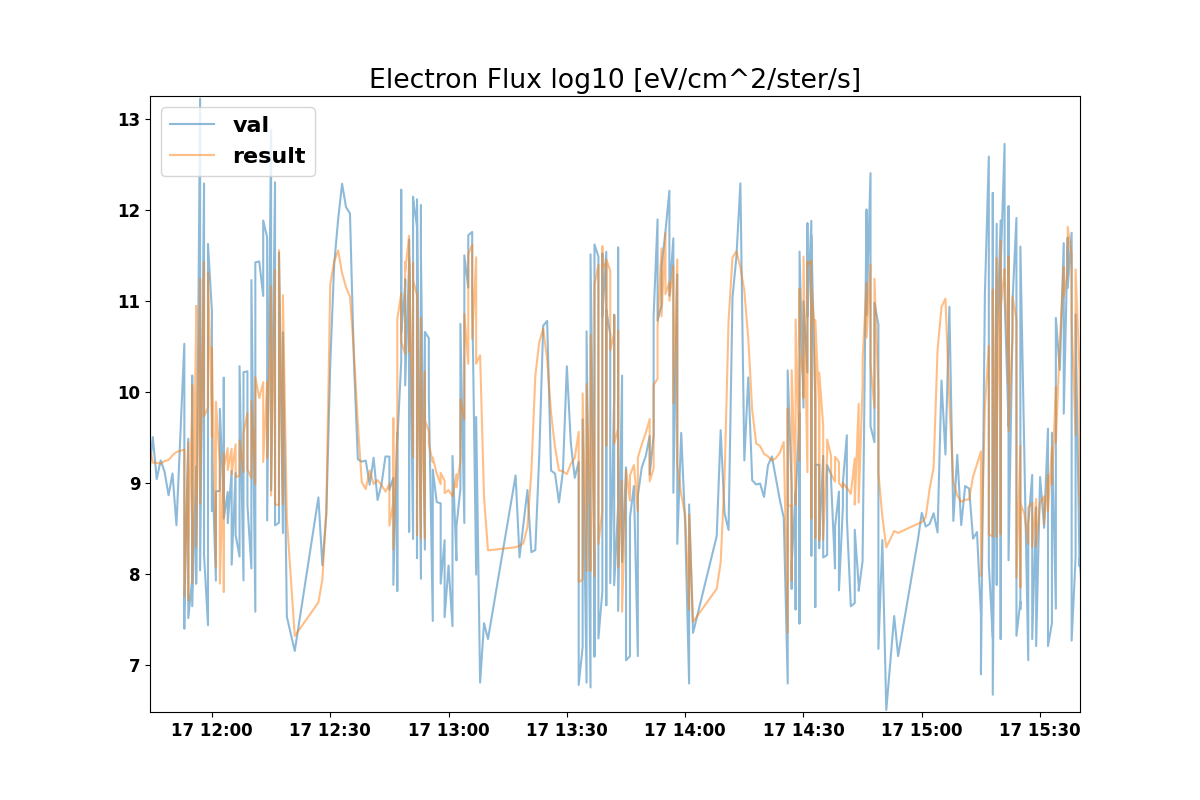

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<IPython.core.display.Javascript object>


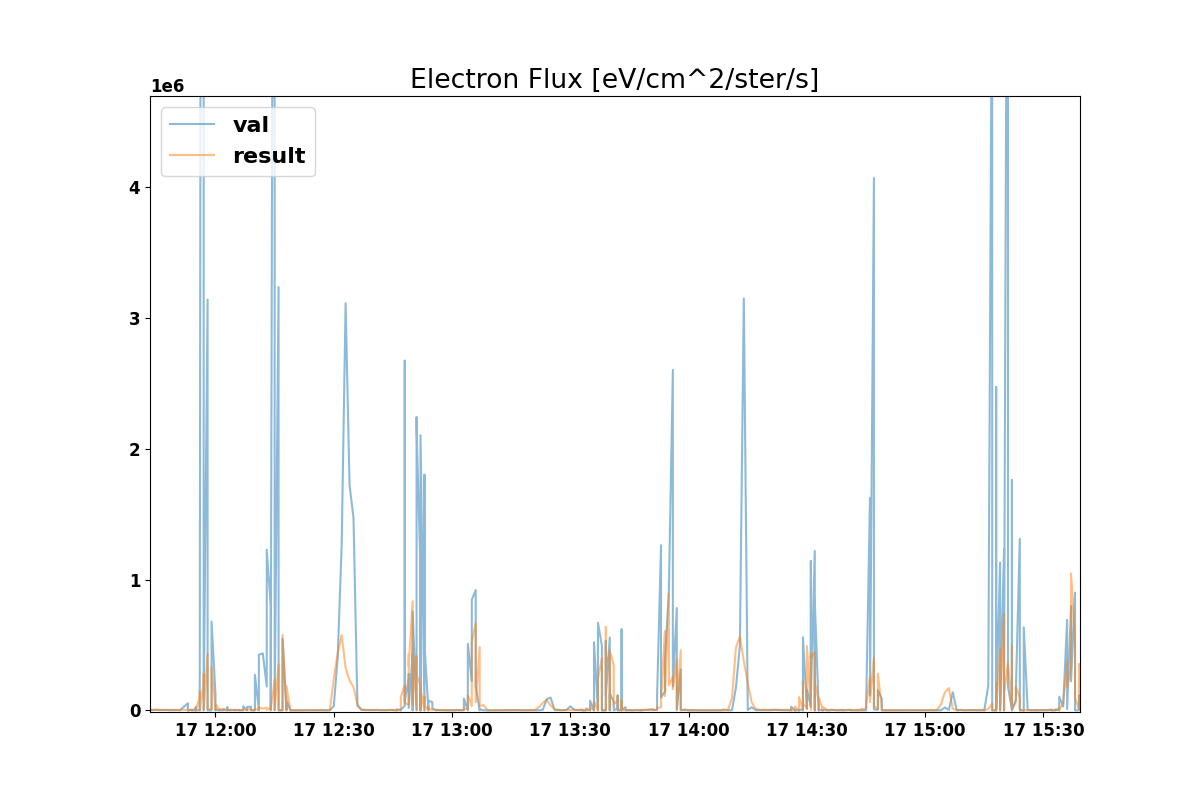

<IPython.core.display.Javascript object>


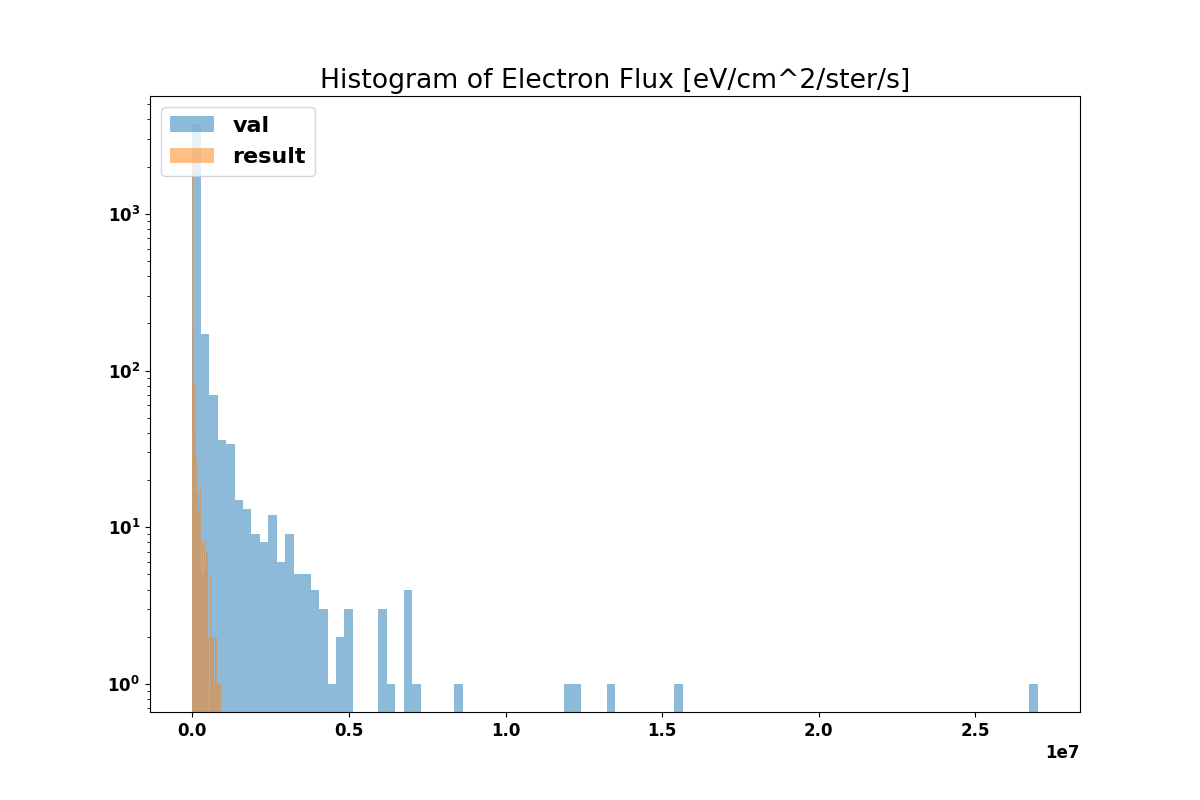

<IPython.core.display.Javascript object>


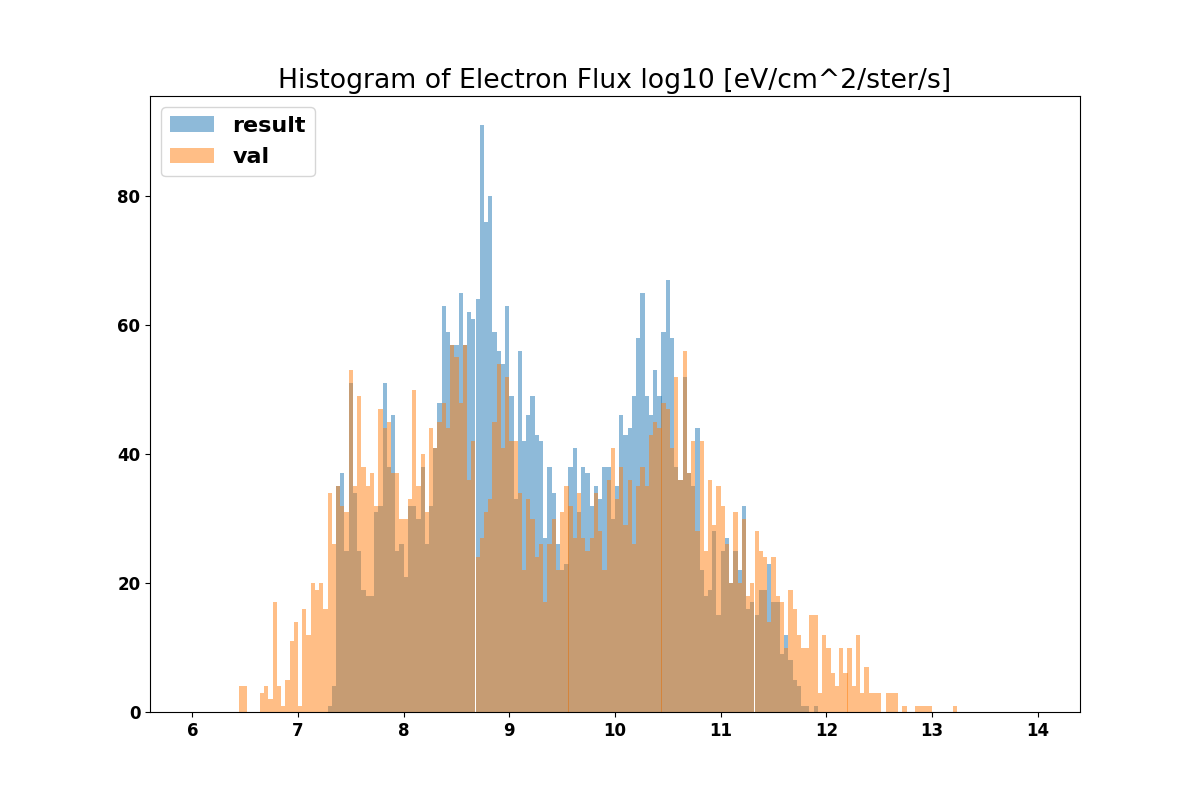

<IPython.core.display.Javascript object>


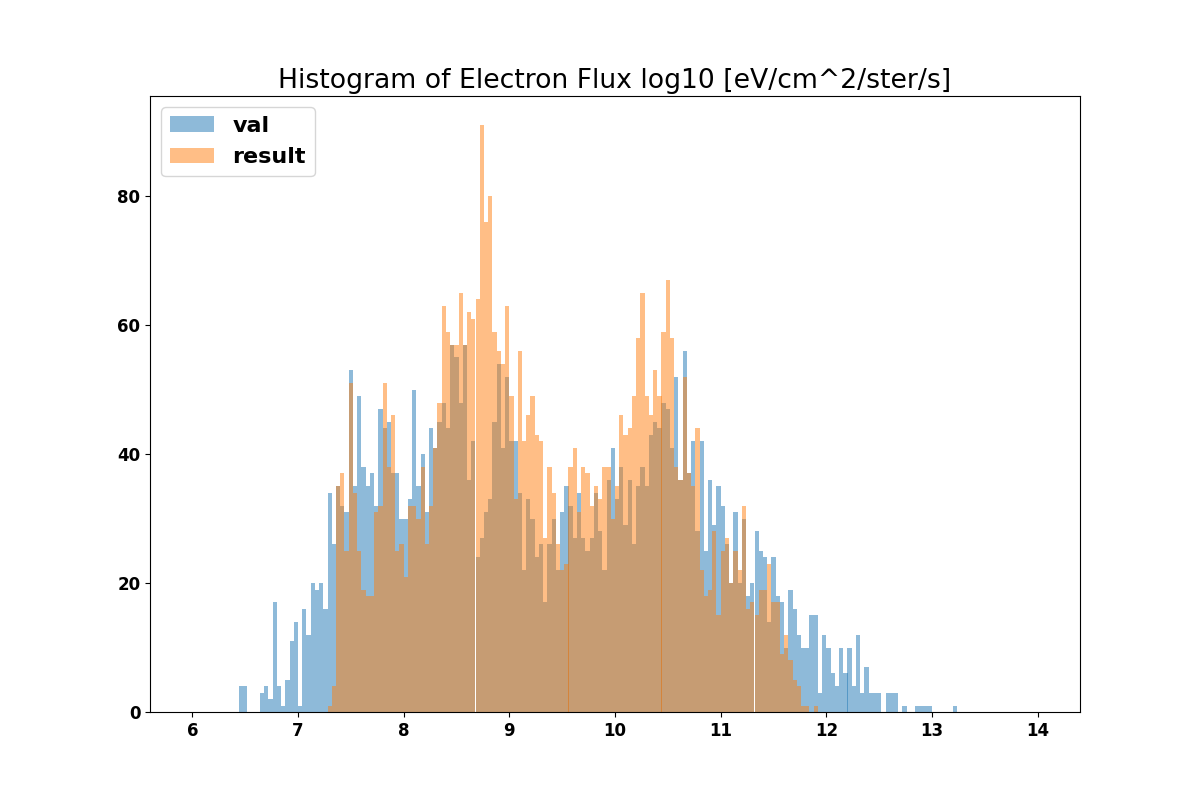

<IPython.core.display.Javascript object>


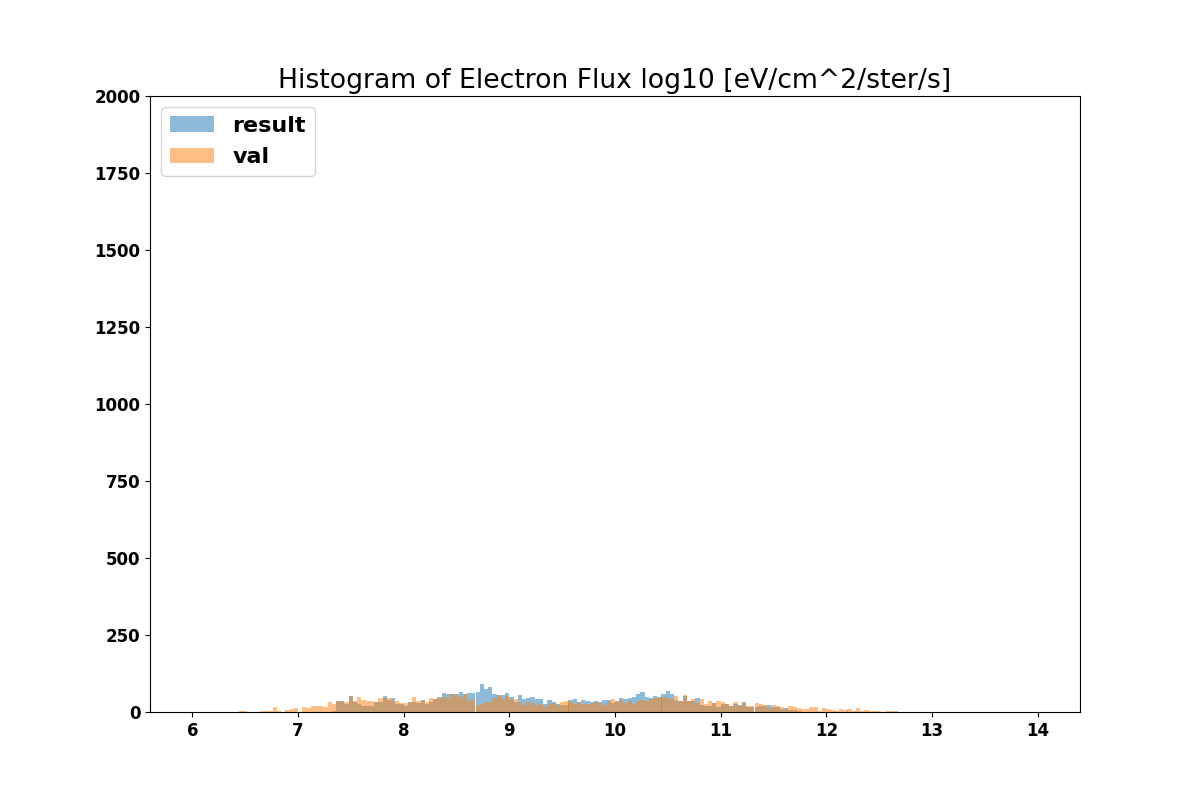

<IPython.core.display.Javascript object>


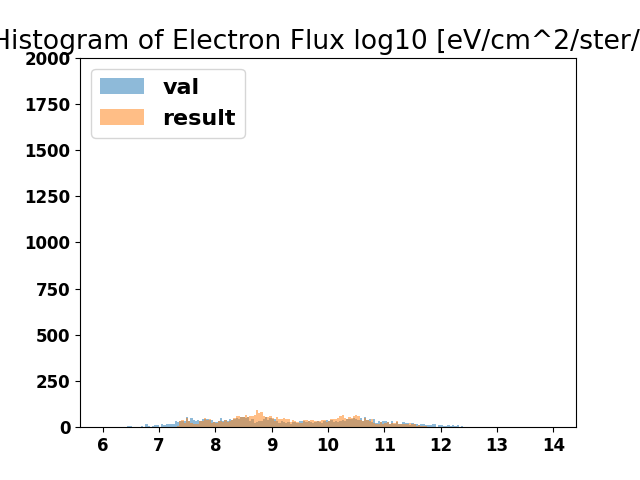

<IPython.core.display.Javascript object>


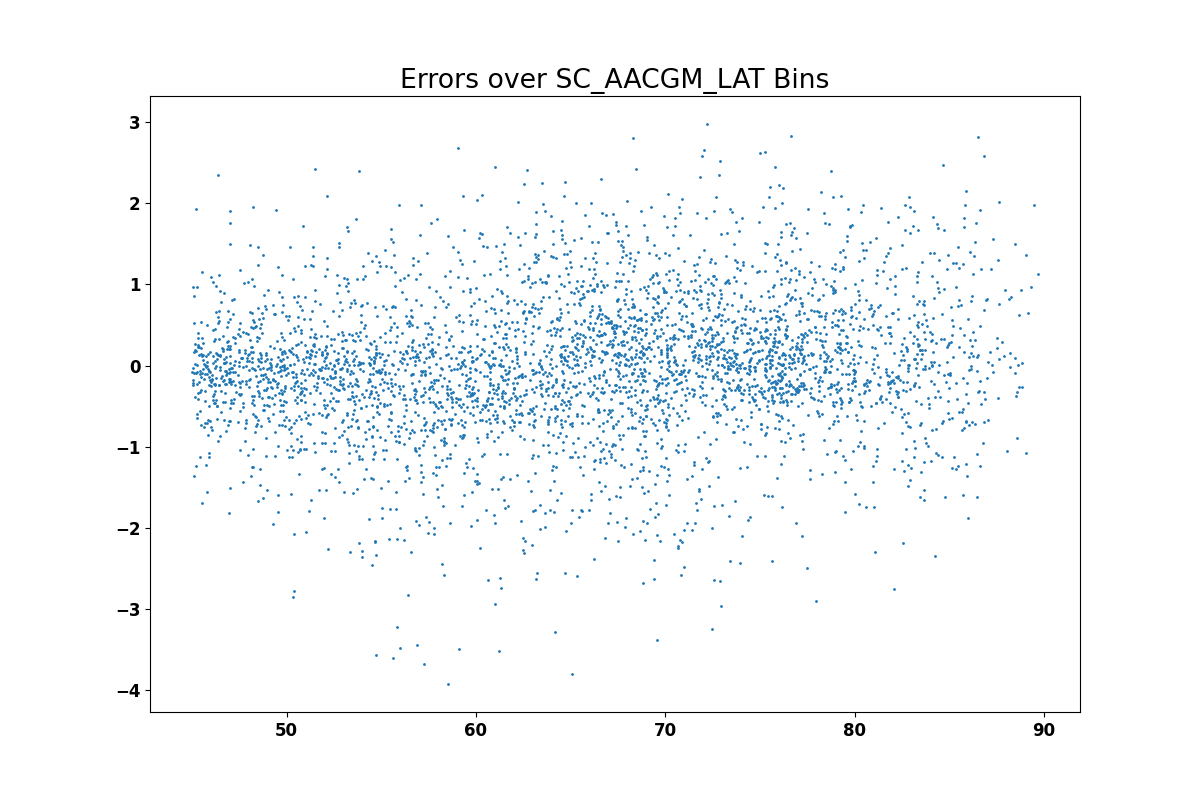

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


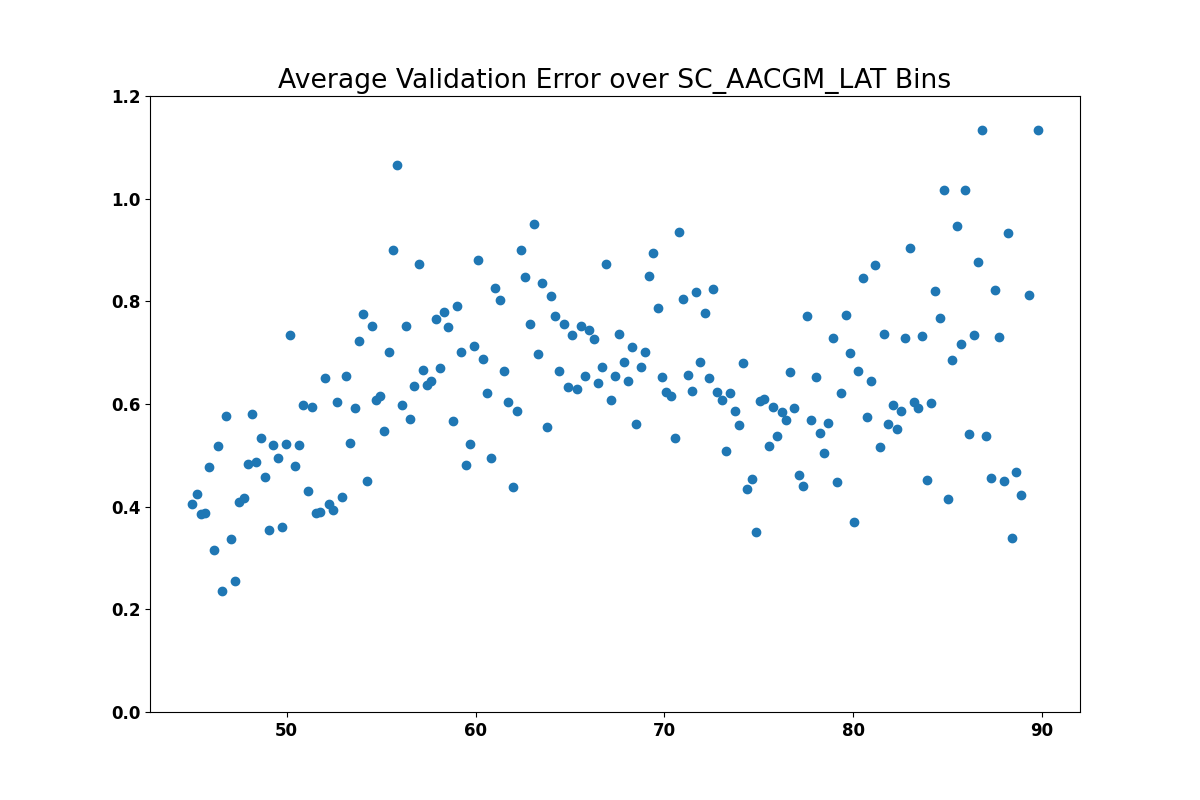

<IPython.core.display.Javascript object>


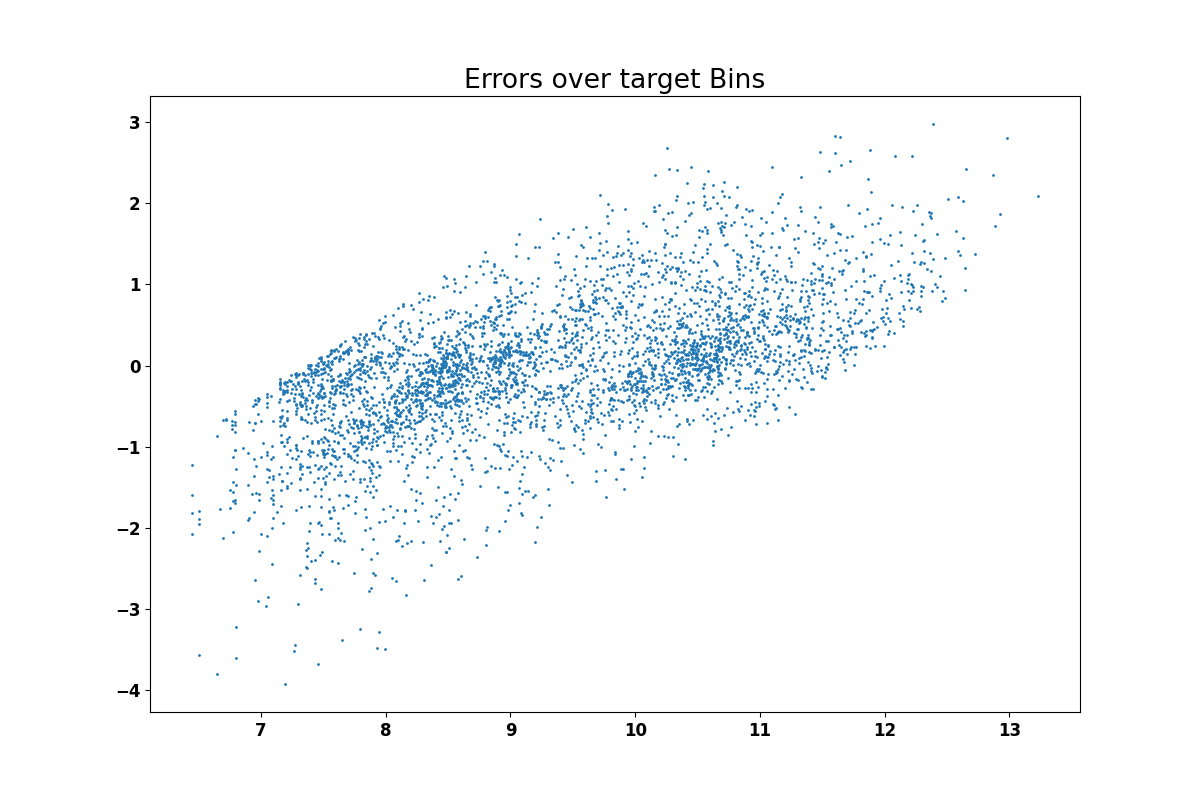

<IPython.core.display.Javascript object>


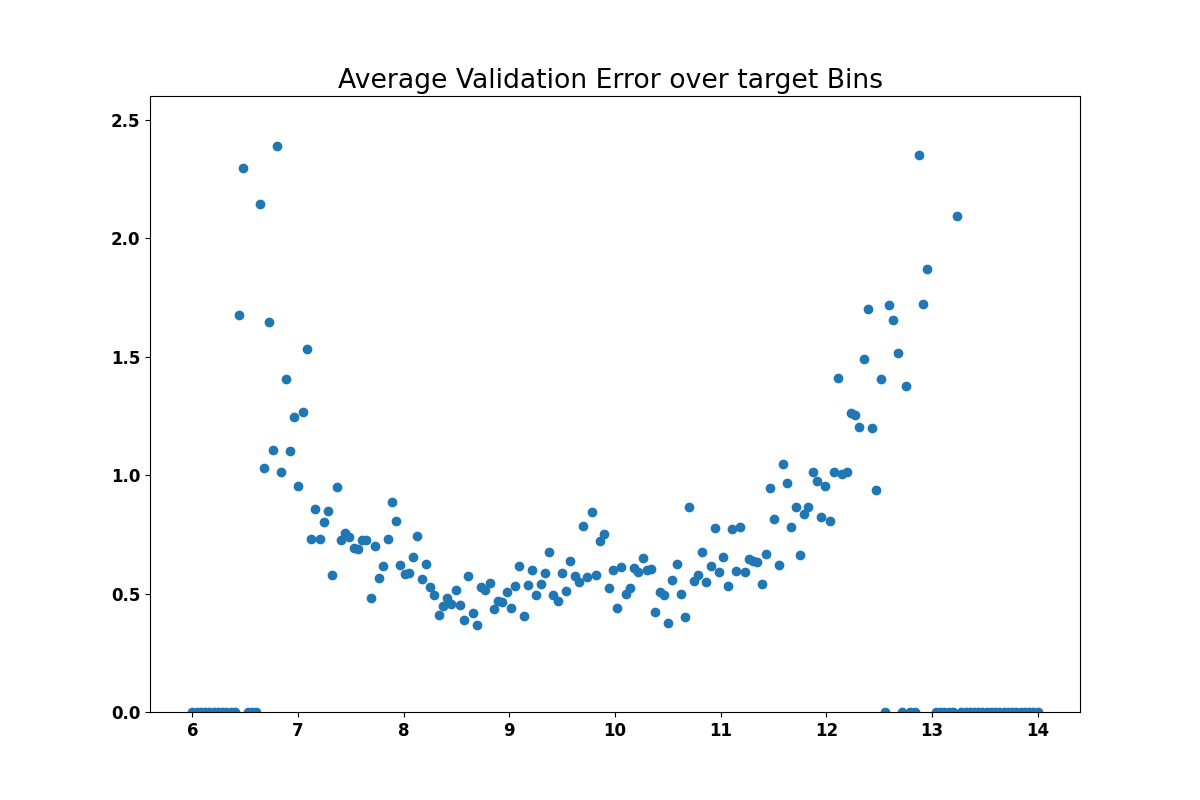

In [22]:
test_sec_val = (test.loc['2013-3-17':'2013-3-18'])['ELE_TOTAL_ENERGY_FLUX']
X_sec_test = scaler_X.transform(((test.loc['2013-3-17':'2013-3-18'])[['SC_AACGM_LAT', 'SC_ID', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME', 'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'Vsw', 'Vx', 'Psw', 'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr', 'Vsw_6hr', 'Vx_6hr', 'Psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr', 'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'Vsw_5hr', 'Vx_5hr', 'Psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'Vsw_3hr', 'Vx_3hr', 'Psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'Vsw_1hr', 'Vx_1hr', 'Psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'AE_45min', 'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'Vsw_45min', 'Vx_45min', 'Psw_45min', 'borovsky_45min', 'newell_45min', 'F107_30min', 'Bz_30min', 'By_30min', 'Bx_30min', 'AE_30min', 'AL_30min', 'AU_30min', 'SymH_30min', 'PC_30min', 'Vsw_30min', 'Vx_30min', 'Psw_30min', 'borovsky_30min', 'newell_30min', 'F107_15min', 'Bz_15min', 'By_15min', 'Bx_15min', 'AE_15min', 'AL_15min', 'AU_15min', 'SymH_15min', 'PC_15min', 'Vsw_15min', 'Vx_15min', 'Psw_15min', 'borovsky_15min', 'newell_15min', 'F107_10min', 'Bz_10min', 'By_10min', 'Bx_10min', 'AE_10min', 'AL_10min', 'AU_10min', 'SymH_10min', 'PC_10min', 'Vsw_10min', 'Vx_10min', 'Psw_10min', 'borovsky_10min', 'newell_10min', 'F107_5min', 'Bz_5min', 'By_5min', 'Bx_5min', 'AE_5min', 'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'Vsw_5min', 'Vx_5min', 'Psw_5min', 'borovsky_5min', 'newell_5min']]).values)

filename='../AuroralBoundaries/model_3'
model = tensorflow.keras.models.load_model(filename)
results = model.predict(X_sec_test)

df_results = pd.DataFrame(data=results, index = test_sec_val.index).dropna()+.00000001

y_val_log=np.log10(test_sec_val)
df_val = test.loc['2013-3-17':'2013-3-18']
plot_model(df_results)


In [ ]:
import pickle
test = pd.DataFrame()

for ii in [17,18,6,7,8,9,12,13,14,15,16,]:

    filescname = "../Downloads/all_sc_df_" + str(ii) + ".pkl"
    pickle_file = open(filescname, "rb") 

    test =pd.concat([test,pickle.load(pickle_file)] )
    

# pickling_on = open("./all_sc_df2.pkl","wb")
# pickle.dump(test, pickling_on,protocol=4)

test['datetime']=test.index
test=test.sort_values(by=['datetime'])
test = test.set_index('datetime')
test=test.dropna()


# get rid of ones near equatoer
test=test[np.abs(test['SC_AACGM_LAT'])>45]
# swap by for southern hemisphere
(test[ test['SC_AACGM_LAT']<0 ])['By']=-(test[ test['SC_AACGM_LAT']<0 ])['By']
#combine southern with northern hemisphere data
test['SC_AACGM_LAT']=np.abs(test['SC_AACGM_LAT'])

test['cos_SC_AACGM_LTIME']=np.cos(test['SC_AACGM_LTIME']*2*3.14159/24)
test['sin_SC_AACGM_LTIME']=np.sin(test['SC_AACGM_LTIME']*2*3.14159/24)

doy_loop = test.index.day
ut_loop = test.index.hour*3600 + test.index.minute*60 + test.index.second
test['sin_doy']= np.sin(2*np.pi*doy_loop/365.)
test['cos_doy'] = np.cos(2*np.pi*doy_loop/365.)
test['sin_ut'] = np.sin(2*np.pi*ut_loop/86400.)
test['cos_ut'] = np.cos(2*np.pi*ut_loop/86400.)
                     
del doy_loop,ut_loop

test_sec_val = (test.loc['2015-3-10':'2015-3-18'])['ELE_TOTAL_ENERGY_FLUX']
X_sec_test = scaler_X.transform(((test.loc['2015-3-10':'2015-3-18'])[['SC_AACGM_LAT', 'SC_ID', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME', 'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'Vsw', 'Vx', 'Psw', 'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr', 'Vsw_6hr', 'Vx_6hr', 'Psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr', 'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'Vsw_5hr', 'Vx_5hr', 'Psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'Vsw_3hr', 'Vx_3hr', 'Psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'Vsw_1hr', 'Vx_1hr', 'Psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'AE_45min', 'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'Vsw_45min', 'Vx_45min', 'Psw_45min', 'borovsky_45min', 'newell_45min', 'F107_30min', 'Bz_30min', 'By_30min', 'Bx_30min', 'AE_30min', 'AL_30min', 'AU_30min', 'SymH_30min', 'PC_30min', 'Vsw_30min', 'Vx_30min', 'Psw_30min', 'borovsky_30min', 'newell_30min', 'F107_15min', 'Bz_15min', 'By_15min', 'Bx_15min', 'AE_15min', 'AL_15min', 'AU_15min', 'SymH_15min', 'PC_15min', 'Vsw_15min', 'Vx_15min', 'Psw_15min', 'borovsky_15min', 'newell_15min', 'F107_10min', 'Bz_10min', 'By_10min', 'Bx_10min', 'AE_10min', 'AL_10min', 'AU_10min', 'SymH_10min', 'PC_10min', 'Vsw_10min', 'Vx_10min', 'Psw_10min', 'borovsky_10min', 'newell_10min', 'F107_5min', 'Bz_5min', 'By_5min', 'Bx_5min', 'AE_5min', 'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'Vsw_5min', 'Vx_5min', 'Psw_5min', 'borovsky_5min', 'newell_5min']]).values)

results = model.predict(X_sec_test)

df_results = pd.DataFrame(data=results, index = test_sec_val.index).dropna()+.00000001

y_val_log=np.log10(test_sec_val)
df_val = test.loc['2015-3-10':'2015-3-18']
plot_model(df_results)

In [30]:
test.loc['2015-1-1':'2015-12-31']


Empty DataFrame
Columns: [ELE_AVG_ENERGY, ELE_AVG_ENERGY_STD, ELE_TOTAL_ENERGY_FLUX, ELE_TOTAL_ENERGY_FLUX_STD, SC_AACGM_LAT, SC_AACGM_LON, SC_AACGM_LTIME, ELE_TOTAL_COUNTS, ELE_COUNT_2, ELE_COUNT_3, ELE_COUNT_4, ELE_COUNT_5, ELE_COUNT_6, ELE_COUNT_7, ELE_COUNT_8, ELE_COUNT_9, ELE_COUNT_10, ELE_COUNT_11, ELE_COUNT_12, ELE_COUNT_13, ELE_COUNT_14, ELE_COUNT_15, ELE_COUNT_16, ELE_COUNT_17, ELE_COUNT_18, ELE_COUNT_19, ELE_diff_2, ELE_diff_3, ELE_diff_4, ELE_diff_5, ELE_diff_6, ELE_diff_7, ELE_diff_8, ELE_diff_9, ELE_diff_10, ELE_diff_11, ELE_diff_12, ELE_diff_13, ELE_diff_14, ELE_diff_15, ELE_diff_16, ELE_diff_17, ELE_diff_18, ELE_diff_19, Bz, By, Vsw, Vx, Psw, AE, AL, AU, SymH, Clock Angle, newell, borovsky, Kp, F107, PC, Bx, Bz_6hr, By_6hr, Vsw_6hr, Vx_6hr, Psw_6hr, AE_6hr, AL_6hr, AU_6hr, SymH_6hr, Clock Angle_6hr, newell_6hr, borovsky_6hr, Kp_6hr, F107_6hr, PC_6hr, Bx_6hr, Bz_5hr, By_5hr, Vsw_5hr, Vx_5hr, Psw_5hr, AE_5hr, AL_5hr, AU_5hr, SymH_5hr, Clock Angle_5hr, newell_5hr, borovsky_5hr, Kp_5hr, F107_5hr, PC_5hr, Bx_5hr, Bz_3hr, By_3hr, Vsw_3hr, Vx_3hr, Psw_3hr, AE_3hr, AL_3hr, AU_3hr, ...]
Index: []

[0 rows x 211 columns]

In [29]:
test

ELE_AVG_ENERGY  ELE_AVG_ENERGY_STD  \
datetime                                                  
1987-01-12 07:01:00    20399.998047            2.244994   
1987-01-12 07:02:00    20399.998047            2.244994   
1987-01-12 07:08:00     2912.163330            0.115864   
1987-01-12 07:09:00     1123.520386            0.096386   
1987-01-12 07:10:00      379.707458            0.166377   
...                             ...                 ...   
2014-12-31 23:54:00       69.372345            0.790066   
2014-12-31 23:55:00       42.500351            1.006582   
2014-12-31 23:56:00       75.227745            1.306080   
2014-12-31 23:58:00       81.934441            1.094407   
2014-12-31 23:59:00       95.666199            1.496098   

                     ELE_TOTAL_ENERGY_FLUX  ELE_TOTAL_ENERGY_FLUX_STD  \
datetime                                                                
1987-01-12 07:01:00           2.427129e+09                   2.244994   
1987-01-12 07:02:00           2.427129e+09                   2.244994   
1987-01-12 07:08:00           8.946210e+10                   0.115852   
1987-01-12 07:09:00           6.515899e+10                   0.096361   
1987-01-12 07:10:00           1.202650e+11                   0.166377   
...                                    ...                        ...   
2014-12-31 23:54:00           3.115258e+07                   0.571060   
2014-12-31 23:55:00           2.362392e+07                   0.690311   
2014-12-31 23:56:00           1.674934e+07                   0.949079   
2014-12-31 23:58:00           3.038168e+07                   0.815338   
2014-12-31 23:59:00           3.898254e+07                   1.188126   

                     SC_AACGM_LAT  SC_AACGM_LON  SC_AACGM_LTIME  \
datetime                                                          
1987-01-12 07:01:00     45.910203    243.527201       18.606159   
1987-01-12 07:02:00     49.378429    243.548974       18.624796   
1987-01-12 07:08:00     70.720594    245.369385       18.849272   
1987-01-12 07:09:00     74.232891    246.331856       18.930622   
1987-01-12 07:10:00     77.746594    247.884899       19.051344   
...                           ...           ...             ...   
2014-12-31 23:54:00     48.162764    346.516437       17.755348   
2014-12-31 23:55:00     45.492218    344.056848       17.608358   
2014-12-31 23:56:00     48.281053    153.262406        4.905712   
2014-12-31 23:58:00     54.512408    147.808182        4.576062   
2014-12-31 23:59:00     57.550473    144.480103        4.371173   

                     ELE_TOTAL_COUNTS  ELE_COUNT_2  ELE_COUNT_3  ...  \
datetime                                                         ...   
1987-01-12 07:01:00              17.5          1.0          0.0  ...   
1987-01-12 07:02:00              17.5          1.0          0.0  ...   
1987-01-12 07:08:00          116080.5          3.0          2.0  ...   
1987-01-12 07:09:00          463071.5          0.0          0.0  ...   
1987-01-12 07:10:00         2286438.0          0.0          0.0  ...   
...                               ...          ...          ...  ...   
2014-12-31 23:54:00           31095.0          0.0          0.0  ...   
2014-12-31 23:55:00           29625.0          0.0          0.0  ...   
2014-12-31 23:56:00           14670.0          0.0          0.0  ...   
2014-12-31 23:58:00           25245.0          0.0          0.0  ...   
2014-12-31 23:59:00            7975.0          0.0          0.0  ...   

                     F107_5min  PC_5min  Bx_5min  SC_ID  cos_SC_AACGM_LTIME  \
datetime                                                                      
1987-01-12 07:01:00       68.9     1.05    -3.73      6            0.158023   
1987-01-12 07:02:00       68.9     1.05    -3.73      6            0.162839   
1987-01-12 07:08:00       68.9     1.11    -2.50      6            0.220507   
1987-01-12 07:09:00       68.9     1.11    -2.50      6            0.241229   
1987-01-12 07:10:00 